# Technical Report

# Table of Contents <a id='table_of_contents'></a>

<a href='#problem_statement'>I. Problem Statement</a>

<a href='#data_description'>II. Data Description</a>

<a href='#data_cleaning'>III. Data Cleaning</a>

<a href='#eda'>IV. EDA</a>

<a href='#model_selection'>V. Model Selection</a>

<a href='#model_code'>VI. Model Code</a>

<a href='#results'>VII. Results</a>

<a href='#conclusion'>VIII. Conclusion</a>

<a href='#appendix'>IX. Appendix and Reference Code</a>

# I. Problem statement <a id=problem_statement></a>

Yahoo, ESPN and other fantasy basketball websites are fairly inaccurate on their pre-ranking system. It is quite well known that many advanced/knowledgeable/experienced players know to never follow any of the ranking system provided by Yahoo, ESPN, etc... because they are terribly inaccurate. From research, Yahoo, ESPN and many other sites use AccuScore.com or Rotowire.com as their base ranking system. Afterwards, each website has their own fantasy "guru" that will re-arrange and edit the ranking system based on injury or potential. Third party fantasy "guru" websites also seem to work similarly, except they seem to have their own base ranking system and then edited on biased opinion (individually or a group of people). Regardless, all these websites do not have a non-biased, non-opinionated ranking system, which is understandable because ranking players correctly is extremely difficult and everyone has their own opinion on who has more potential. Currently, this seems like the best way to create a better ranking system.

My goal is to beat all their ranking systems by creating a new way to look at how people should refer to drafting. Based on the last 20 seasons, I want to create a customizable grouping system, rather than labeling players on ranks. For example, in standard leagues there are 12 managers drafting 13 players each, which means that there are 13 rounds of drafting. I want to put the 12 best players in the current pool into each round bracket, provide their mean fantasy value per season, their standard deviation and variance in all their seasons. Also, create a 14th bucket for all the other players. Based on these aspects, managers, especially new players, are able to understand what kind of player they are drafting and what kind of risks they will encounter. This, to me, is a much more accurate and effective way of drafting.

<a href=#table_of_contents>Back to top</a>

# II. Description of data <a id=data_description></a>

All data was scraped from stats.nba.com, which is hosted by SAP HANA relational database. NBA has been keeping very advanced statistics of all players, such as, the distance on where they shot, how their opponent's average, percentage of assisted and unassisted shots, and many more. Below are the datasets and the columns I used for this report.

<a href=#table_of_contents>Back to top</a>

### Sample Scraping Code for all Traditional Stats

In [ ]:
import pandas as pd
import numpy as np
import requests
import time
from scrapy.selector import Selector
from scrapy.http import HtmlResponse
from selenium import webdriver
from bs4 import BeautifulSoup
import json

browser.get('http://stats.nba.com/league/player/')
HTML = browser.page_source
year_data = Selector(text=HTML).xpath("//select[@name='Season']/option/text()").extract()
time.sleep(5)

general_para  = ['Base', 'Advanced', 'Misc', 'Scoring', 'Usage', 'Opponent', 'Defense']
# Base
trad_base = 'http://stats.nba.com/stats/leaguedashplayerstats?College=&Conference=&Country=&DateFrom=&DateTo=&Division=&DraftPick=&DraftYear=&GameScope=&GameSegment=&Height=&LastNGames=0&LeagueID=00&Location=&MeasureType=%s&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PaceAdjust=N&PerMode=Totals&Period=0&PlayerExperience=&PlayerPosition=&PlusMinus=N&Rank=N&Season=%s&SeasonSegment=&SeasonType=Regular+Season&ShotClockRange=&StarterBench=&TeamID=0&VsConference=&VsDivision=&Weight='

# Advanced
trad_adv = 'http://stats.nba.com/stats/leaguedashplayerstats?College=&Conference=&Country=&DateFrom=&DateTo=&Division=&DraftPick=&DraftYear=&GameScope=&GameSegment=&Height=&LastNGames=0&LeagueID=00&Location=&MeasureType=%s&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PaceAdjust=N&PerMode=Totals&Period=0&PlayerExperience=&PlayerPosition=&PlusMinus=N&Rank=N&Season=%s&SeasonSegment=&SeasonType=Regular+Season&ShotClockRange=&StarterBench=&TeamID=0&VsConference=&VsDivision=&Weight='

# Misc
trad_misc = 'http://stats.nba.com/stats/leaguedashplayerstats?College=&Conference=&Country=&DateFrom=&DateTo=&Division=&DraftPick=&DraftYear=&GameScope=&GameSegment=&Height=&LastNGames=0&LeagueID=00&Location=&MeasureType=%s&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PaceAdjust=N&PerMode=Totals&Period=0&PlayerExperience=&PlayerPosition=&PlusMinus=N&Rank=N&Season=%s&SeasonSegment=&SeasonType=Regular+Season&ShotClockRange=&StarterBench=&TeamID=0&VsConference=&VsDivision=&Weight='

# Scoring
trad_score = 'http://stats.nba.com/stats/leaguedashplayerstats?College=&Conference=&Country=&DateFrom=&DateTo=&Division=&DraftPick=&DraftYear=&GameScope=&GameSegment=&Height=&LastNGames=0&LeagueID=00&Location=&MeasureType=%s&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PaceAdjust=N&PerMode=Totals&Period=0&PlayerExperience=&PlayerPosition=&PlusMinus=N&Rank=N&Season=%s&SeasonSegment=&SeasonType=Regular+Season&ShotClockRange=&StarterBench=&TeamID=0&VsConference=&VsDivision=&Weight='

# Usage
trad_usage = 'http://stats.nba.com/stats/leaguedashplayerstats?College=&Conference=&Country=&DateFrom=&DateTo=&Division=&DraftPick=&DraftYear=&GameScope=&GameSegment=&Height=&LastNGames=0&LeagueID=00&Location=&MeasureType=%s&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PaceAdjust=N&PerMode=Totals&Period=0&PlayerExperience=&PlayerPosition=&PlusMinus=N&Rank=N&Season=%s&SeasonSegment=&SeasonType=Regular+Season&ShotClockRange=&StarterBench=&TeamID=0&VsConference=&VsDivision=&Weight='

# Opponent
trad_opp = 'http://stats.nba.com/stats/leagueplayerondetails?College=&Conference=&Country=&DateFrom=&DateTo=&Division=&DraftPick=&DraftYear=&GameScope=&GameSegment=&Height=&LastNGames=0&LeagueID=00&Location=&MeasureType=%s&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PaceAdjust=N&PerMode=Totals&Period=0&PlayerExperience=&PlayerPosition=&PlusMinus=N&Rank=N&Season=%s&SeasonSegment=&SeasonType=Regular+Season&ShotClockRange=&StarterBench=&TeamID=0&VsConference=&VsDivision=&Weight='

# Defense
trad_def = 'http://stats.nba.com/stats/leaguedashplayerstats?College=&Conference=&Country=&DateFrom=&DateTo=&Division=&DraftPick=&DraftYear=&GameScope=&GameSegment=&Height=&LastNGames=0&LeagueID=00&Location=&MeasureType=%s&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PaceAdjust=N&PerMode=Totals&Period=0&PlayerExperience=&PlayerPosition=&PlusMinus=N&Rank=N&Season=%s&SeasonSegment=&SeasonType=Regular+Season&ShotClockRange=&StarterBench=&TeamID=0&VsConference=&VsDivision=&Weight='

traditional_stats = [trad_base, trad_adv, trad_misc, trad_score, trad_usage, trad_opp, trad_def]

chromedriver = "~/Desktop/chromedriver"

browser = webdriver.Chrome(executable_path = chromedriver)
for year in logs_year:
    print year
    link = game_log % year
    browser.get(link)
    HTML = browser.page_source
    soup = BeautifulSoup(HTML)
    
    try:
        get_text = soup.findAll('pre')[0].getText().encode('utf-8')
        json_text = json.loads(get_text)
        data = pd.DataFrame(json_text['resultSets'][0]['rowSet'], columns=json_text['resultSets'][0]['headers'])
        save_csv = '~/Desktop/PROJECTS/NBA Fantasy Project/datasets/gamelogs/%s_%s.csv' % ('gamelogs',year)
        data.to_csv(save_csv)
    except:
        print 'Failed', link
    time.sleep(5*np.random.rand())

## Traditional Stats Totals (1996-97 to 2015-16)
# =====================================================
### Base Dataset
    - PLAYER_ID: Unique ID for each Player
    - PLAYER_NAME: Players Name
    - AGE: Players Age per Season
    - GP: Games played during that Season
    - W: Wins
    - L: Losses
    - MIN: Total Minutes played
    - FGM: Total Field Goals Made
    - FGA: Total Field Goal Attempts
    - FG_PCT: Field Goal Percentage
    - FG3M: 3Pts Made
    - FG3A: 3Pt Attempts
    - FG3_PCT: 3Pt Percentage
    - FTM: Free Throws Made
    - FTA: Free Throw Attempts
    - FT_PCT: Free Throw Percentage
    - OREB: Total Offensive Rebounds
    - DREB: Total Defensive Rebounds
    - REB: Total Combined Rebounds
    - AST: Total Assists
    - TOV: Total Turnovers
    - STL: Total Steals
    - BLK: Total Blocks
    - BLKA: Total Block Attempts
    - PF: Total Personal Fouls
    - PFD: Total Fouls Drawn against Opponents
    - PTS: Total Points
    - PLUS_MINUS: Difference between how much the team scores and opponent scores while player is on court
    - DD2: Double digit in 2 categories (Double Doubles)
    - TD3: Triple Doubles in 3 categories (Triple Doubles)
# =====================================================
### Advanced Dataset
    - PLAYER_ID: Unique ID for each Player
    - OFF_RATING: Per 100 possessions, number of points the team scores while player is on the court
    - DEF_RATING: Per 100 possessions, number of points the team allows while player is on the court
    - NET_RATING: Difference between the Offense and Defensive Rating
    - AST_PCT: The percentage of teammate's field goals that the player assisted
    - AST_TO: Assist Turnover Ratio is the number of assists for every turnover the player makes
    - AST_RATIO: Per 100 possessions, number of assists a player averages
    - OREB_PCT: Percentage of Offensive Rebounds a player obtains while on the court
    - DREB_PCT: Percentage of Defensive Rebounds a player obtains while on the court
    - REB_PCT: Percentage of Rebounds a player obtains while on the court
    - TM_TOV_PCT: Per 100 possessions, the average number of turnover the player commits
    - EFG_PCT: Effective Field Goal percentage is an adjusted version of Field Goals Made by making 3pt shots 1.5 more valuable than 2pters
    - TS_PCT: True Shooting Percentage adjusts 3pt and FT as part of percentage, formula: Points/[(2)(Field Goal Attempts) + (0.44)(Free Throw Attempts)]
    - USG_PCT: Percentage of the team's offensive possessions a player uses while on the court
    - PACE: Number of possessions per 48 minutes
    - PIE: An estimate of the player's contributions and impact
    - FGM_PG: Field Goals Made per Game
# =====================================================
### Misc Dataset
    - PLAYER_ID: Unique ID for each Player
    - PTS_OFF_TOV: Points off Turnovers
    - PTS_2ND_CHANCE: Points off second chances
    - PTS_FB: Points off fast breaks
    - PTS_PAINT: Points scored in the paint
    - OPP_PTS_OFF_TOV: Opponent's points off turnovers
    - OPP_PTS_2ND_CHANCE: Opponent's off second chances
    - OPP_PTS_FB: Opponent's points off fast breaks
    - OPP_PTS_PAINT: Opponent's points in the paint
# =====================================================
### Usage Dataset
    - PLAYER_ID: Unique ID for each Player
    - PCT_FGM: Percentage of the team's field goals made while player is on the court
    - PCT_FGA: Percentage of the team's field goal attempts while player is on the court
    - PCT_FG3M: Percentage of the team's 3Pts made while player is on the court
    - PCT_FG3A: Percentage of the team's 3Pt attempts while player is on the court
    - PCT_FTM: Percentage of the team's free throws made while player is on the court
    - PCT_FTA: Percentage of the team's free throw attempts while player is on the court
    - PCT_OREB: Percentage of the team's offensive rebounds obtained while player is on the court
    - PCT_DREB: Percentage of the team's defensive rebounds obtained while player is on the court
    - PCT_REB: Percentage of the team's rebounds obtained while player is on the court
    - PCT_AST: Percentage of the team's assists made while player is on the court
    - PCT_TOV: Percentage of the team's turnovers commited while player is on the court
    - PCT_STL: Percentage of the team's steals made while player is on the court
    - PCT_BLK: Percentage of the team's blocks made while player is on the court
    - PCT_BLKA: Percentage of the team's blocks attempted while player is on the court
    - PCT_PF: Percentage of the team's personal fouls that player has while on the court
    - PCT_PFD: Percentage of the team's personal fouls drawn while player is on the court
    - PCT_PTS: Percentage of the team's points scored while player is on the court
# =====================================================
### Scoring Dataset
    - PLAYER_ID: Unique ID for each Player
    - PCT_FGA_2PT: Percentage of field goal attempts that are 2 pointers
    - PCT_FGA_3PT: Percentage of field goal attempts that are 3 pointers
    - PCT_PTS_2PT: Percentage of points scored that are 2 pointers
    - PCT_PTS_2PT_MR: Percentage of points scored that are 2 point midrange jumpshots
    - PCT_PTS_3PT: Percentage of points scored that are 3 pointers
    - PCT_PTS_FB: Percentage of points scored that are fast breaks
    - PCT_PTS_FT: Percentage of points scored that are free throws
    - PCT_PTS_OFF_TOV: Percentage of points scored that are off turnovers
    - PCT_PTS_PAINT: Percentage of points scored that are in the paint
    - PCT_AST_2PM: Percentage of 2 points made that are assisted by teammates
    - PCT_UAST_2PM: Percentage of 2 points made that are not assisted by teammates
    - PCT_AST_3PM: Percentage of 3 points made that are assisted by teammates
    - PCT_UAST_3PM: Percentage of 3 points made that are not assisted by teammates
    - PCT_AST_FGM: Percentage of field goals made that are assisted by teammates
    - PCT_UAST_FGM: Percentage of field goals made that are not assisted by teammates

## Clutch Stats per48 min (1996-97 to 2015-16)

*** Same Columns as Traditional Stats ***

## Shooting Stats (1996-97 to 2015-16)
# =====================================================
### Player
    - Less than 5ft
        - Field Goals Made
        - Field Goal Attempts
        - Field Goal Percentage
    - 5-9 ft
        - Field Goals Made
        - Field Goal Attempts
        - Field Goal Percentage
    - 10-14 ft
        - Field Goals Made
        - Field Goal Attempts
        - Field Goal Percentage
    - 15-19 ft
        - Field Goals Made
        - Field Goal Attempts
        - Field Goal Percentage
    - 20-24 ft
        - Field Goals Made
        - Field Goal Attempts
        - Field Goal Percentage
    - 25-29 ft
        - Field Goals Made
        - Field Goal Attempts
        - Field Goal Percentage
# =====================================================
### Player's Opponent
    - Less than 5ft
        - Field Goals Made
        - Field Goal Attempts
        - Field Goal Percentage
    - 5-9 ft
        - Field Goals Made
        - Field Goal Attempts
        - Field Goal Percentage
    - 10-14 ft
        - Field Goals Made
        - Field Goal Attempts
        - Field Goal Percentage
    - 15-19 ft
        - Field Goals Made
        - Field Goal Attempts
        - Field Goal Percentage
    - 20-24 ft
        - Field Goals Made
        - Field Goal Attempts
        - Field Goal Percentage
    - 25-29 ft
        - Field Goals Made
        - Field Goal Attempts
        - Field Goal Percentage

## Gamelogs (1947-48 to 2015-16)
# =====================================================
```
- PLAYER_ID: Unique ID for each Player
- Player: Player Name
- Team: Team Name
- Match Up: Match up
- Game Date: Date of the game
- W/L: Win or Lose
- MIN: Minutes played
- PTS: Points Scored
- FGM: Field Goals Made
- FGA: Field Goal Attempts
- FG%: Field Goal Percentage
- 3PM: 3Pts Made
- 3PA: 3Pt Attempts
- 3P%: 3Pt Percentage
- FTM: Free Throws Made
- FTA: Free Throw Attempts
- FT%: Free Throw Percentage
- OREB: Offensive Rebounds Obtained
- DREB: Defensive Rebounds Obtained
- REB: Total Rebounds Obtained
- AST: Assists Made
- STL: Steals Made
- BLK: Blocks Made
- TOV: Number of Turnovers Committed
- PF: Personal Fouls Committed
- +/-: Plus Minus Rating
```

## Player Bios (1996-97 to 2015-16)
# =====================================================
```
- PLAYER_ID: Unique ID for each Player
- Player: Player Name
- Team: Current Team
- Age: Current Age
- Height: Current Height
- Weight: Current Weight
- College: College Attended, if applicable
- Country: Country of origin
- Draft Year: Year of when the player was drafted into the NBA
- Draft Round: Which round the player was drafted
- Draft Number: The draft number the player was drafted
- GP: Games Played
- PTS: Total Points in that Season
- REB: Total Rebounds in that Season
- AST: Total Assists in that Season
- NetRtg: Net Rating during that Season
- OREB%: Percentage of Offensive Rebounds a player obtains while on the court
- DREB%: Percentage of Defensive Rebounds a player obtains while on the court
- USG%: Percentage of the team's offensive possessions a player uses while on the court
- TS%: True Shooting Percentage adjusts 3pt and FT as part of percentage, formula: Points/[(2)(Field Goal Attempts) + (0.44)(Free Throw Attempts)]
- AST%: The percentage of teammate's field goals that the player assisted
```

#### Removed Rows, Columns and Datasets
1. Removed Datasets
    - Traditional Defense
        - **Reasoning**: All the columns were duplicates taken from other advanced statistics, except for defensive win shares. Win shares was originally a probable target dummy variable, but was removed, which will be explained later.
    - Traditional Opponent
        - **Reasoning**: Around 50% of the columns were duplicates with other advanced statistics. The dataset itself was rather confusing to work with and took a long time just to understand how it was working. Currently as of 10/11/2016, I did not use this dataset, but in the future with more time, I will definitely explore this dataset a bit more to see how to incorporate it into my analysis.
    - Play Type
        - **Reasoning**: There was only 1 season (2015-16) and fairly new. Good for per season analysis between players, but not a good predictor for fantasy value. Maybe in the future with more data, it may be a better predictor, but as of now, I want to keep data to at least 20 season to keep the information consistent per player.
2. Removed Columns
    - Player 30-34, 35-39, 40+ ft shooting data
        - **Reasoning**: Corner 3s are 22ft and NBA 3pt line is 23.75ft. There are less than a handful of players that can shoot beyond 30ft, and even then, they can be considered heaves or a "Prayer" shot. Since this is not caused by opponent's individual defense and usually caused by the opponent's team defense, they are not a good indicator to how well a player can contribute to their fantasy value, they are removed. Also, if a player makes 1 heave, he would be ranked much higher than any other player. Same if that player had to shoot a "Prayer" shot because the ball was in his hand the last 1 second of the shot clock, it would skew his shooting rank lower, even though he's a good shooter from 3.
    - Player's Opponent 30-34, 35-39, 40+ ft shooting data
        - **Reasoning**: Like the Player's shooting data, they are almost never caused by individual defense, rather caused by team defense. They also might cause skews in the ranking system because if 1 player defended 1 shot that missed, that player would immediately be ranked higher than a ton of players. The same goes to someone like J.R. Smith heaving a shot and making it would cause a good defender to have a terrible ranking.
    - Seasons 1946-47 to 1995-96
        - **Reasoning**: There are 2 reasons why these seasons were removed. The first reason was not all the statistics were recorded back then. Turnovers was not recorded until the 1977-78 season. Another example would be in the 1950s, only points, field goal made (not attempts), free throw mades, attempts and percentage were recorded. The data isn't useful for analysis. The second reason was advanced statistics were not recorded until 1996-97 season. Thus, I decided to match 20 season of gamelogs with the 20 seasons of advanced statistics.
        
<a href=#table_of_contents>Back to top</a>

# III. Data Cleaning, Data Munging and Dummy Targets. <a id=data_cleaning></a>
The amazing part of the data I scraped is that it is all in JSON format and relatively clean. By using BeautifulSoup, I was able to pull out the specific tag that had the header (column names) and the entire dataset into a dictionary.

The more difficult aspect was data munging. Although the data was fairly clean and all the data I used was in the correct format, I had 20 seasons of data for traditional (base, advanced, shooting, usage, misc), clutch (base, advanced, shooting, usage, misc), shooting (player and their opponent) and player bios and 70 seasons of gamelogs, which is a huge quantity. However, the quantity of data was not an issue. The problem was that there were tons of duplicate columns in multiple datasets where I had to hand pick which columns to keep and which to remove. I also had to create a new "SEASONS" column because when I merged on just PLAYER_ID, pandas would merge each player multiple times. Creating a seasons column would solve the merge issue.

After deciding which columns to keep and merging columns from subset of datasets (i.e. Traditional base, advanced, shooting, usage, misc, player shooting and opponent shooting), I decided on creating dummy target variables instead of clustering. I chose this path because I had a clear idea on what types of dummy variables would be correlated with fantasy value. Also, I was afraid I would be wasting too much time on figure out whether the clusters are targeted toward fantasy value versus real life value. There are only so many groupings that can be made in basketball where I didn't feel like clustering would be an advantage.

After researching ideas through fantasy baseball and football, I had a couple of ideas on what dummy variables to create that may be able to predict better players for fantasy.
    1. Aggregate Traditional Total Ranks per Player per Season
    2. Aggregate Clutch per48 minute Ranks per Player per Season
    3. Games Missed Risk
    4. Fantasy Points Mean, Standard Deviation and Variance
    5. **REMOVED** Win Shares
I decided on these target variables for these reasons:
1. I used total values instead of per game, per36, per40 or per48 because I didn't want the players who played fewer games, but had good averages within a span of 10-20 games to skew their value in the wrong direction.
2. I used clutch per48 minute instead of totals, per game, per30 or per36 because I wanted to see the huge disparity and variance between players. I also changed the query to 4th quarter with 5 minutes left with the point differentiation no greater than 5. The theory here is that if players perform well under these circumstances, they can equally perform well in any other quarter. Therefore, outputing a more consistent fantasy value.
3. I created my own Games Missed Rank based on prior experience and knowledge, although the values could be tweaked a bit more. The values are the following:
        - Player misses less than 10% of the games in the season - **LOW RISK**
        - Player misses between 10% and 25% of the games in the season - **BE CAUTIOUS**
        - Player misses between 25% and 50% of the games in the season - **HIGH RISK**
        - Player misses more than 50% - **DANGER ZONE**
4. Fantasy Points, Mean and Standard Deviation were also created based on my prior experience and knowledge. I referred to Yahoo's weight system for each category that affected fantasy points. These values could be tweaked a bit more, but I don't think the outputs would vary too much, especially for the top players. Below are the adjusted values:
        - FGMade  = 1 fp
        - FGMiss  = -9./11. fp
        - FTMade  = 1 fp
        - FTMiss  = -3./1. fp
        - 3Made   = 0.5 fp
        - pts     = 1.0 fp
        - rebs    = 1.2 fp
        - asts    = 1.5 fp
        - stls    = 2.0 fp
        - blks    = 2.0 fp
        - tos     = -1.0 fp
5. Win shares was originally a variable I was really interested in because it calculated how many wins a player contributed to a team. However after hours of research, I decided to remove it because it did not affect a player's fantasy value. The calculation is really complex and would take an atrocious amount of time to calculate. The basic gist of the calculation is Offensive Win Shares + Defensive Win Shares = Total Win Shares. The problem is, defensive win shares tend to favor the team's defensive strength and then projected onto each player. A player may be the worst defender in the league, but have a very high defensive win share because the team was very good defensively. Because of that, defensive win shares must be taken with a huge grain of salt. Now we only have offensive win share to work with. Offensive win shares does a decent job. Offensive win shares calculates the players value and production, which means that players who are underrated or overlooked are accuractly scored. The problem is, offensive win shares cannot predict fantasy value and talent. Chauncey Billups has a career offensive win share of 92.4, where as Larry Bird has a career offensive win share of 86.8, despite Billups playing 1000 less career minutes. Would anyone pick Billups over Bird for their fantasy team even though Bird has better stats across the board in pretty much every category, and, Bird can arguably be one of the best fantasy players ever? No. Offensive win shares contribute towards the team and not the player, therefore, I removing this dummy variable makes sense.


<a href=#table_of_contents>Back to top</a>

### Code for calculating dummy variable Traditional Aggregate Rank and Games Missed Risk

In [ ]:
### Sort values by columns and then rank each column, then agg the ranked for each player per season
### to get an average rank.

for year in year_data:
    csv = '~/Desktop/PROJECTS/NBA Fantasy Project/rank_project/merged/trad_shooting_merged_%s.csv' % year
    df = pd.read_csv(csv)
    
    # Through the added columns, sort each column then rank each player from 1 to length of dataset
    for col in ranked_cols:
        if 'OPP' in col:
            if ('PF' in col) or ('TOV' in col):
                df.sort_values(col, ascending=False, na_position='last', inplace=True)
                new_col_name = 'rank_%s' % col
                df[new_col_name] = [i+1 for i in range(df.shape[0])]
            else:
                df.sort_values(col, ascending=True, na_position='last', inplace=True)
                new_col_name = 'rank_%s' % col
                df[new_col_name] = [i+1 for i in range(df.shape[0])]
        elif ('L' in col) or ('PF' in col) or ('TOV' in col) or ('Miss' in col):
            df.sort_values(col, ascending=True, na_position='last', inplace=True)
            new_col_name = 'rank_%s' % col
            df[new_col_name] = [i+1 for i in range(df.shape[0])]
        else:
            df.sort_values(col, ascending=False, na_position='last', inplace=True)
            new_col_name = 'rank_%s' % col
            df[new_col_name] = [i+1 for i in range(df.shape[0])]
    
    df['agg_rank'] = df.ix[:,'rank_GP':].mean(axis=1)
    
    link = '~/Desktop/PROJECTS/NBA Fantasy Project/rank_project/clutch_stats/tradshoot_merged_%s_withRANK.csv' % year
    df.to_csv(link)

In [ ]:
### MERGE TRAD AND SHOOTING STATS BY CATEGORIES FROM 1996-97 to 2015-16

trad_rank = []

for year in year_data:
    csv_file = '~/Desktop/PROJECTS/NBA Fantasy Project/rank_project/clutch_stats/tradshoot_merged_%s_withRANK.csv' % year
    df_tmp = pd.read_csv(csv_file)
    df_tmp.drop('Unnamed: 0', axis=1, inplace=True)
    
    game_risk = []
    # Add new column game_risk and lock out periods included
    for games in df_tmp['GP']:
        if year == '1998-99':
            if games >= 45:
                game_risk.append(0)
            elif games < 45 and games >= 38:
                game_risk.append(1)
            elif games < 38 and games >= 25:
                game_risk.append(2)
            elif games < 25:
                game_risk.append(3)
        elif year == '2011-12':
            if games >= 60:
                game_risk.append(0)
            elif games < 60 and games >= 50:
                game_risk.append(1)
            elif games < 50 and games >= 33:
                game_risk.append(2)
            elif games < 33:
                game_risk.append(3)
        else:
            if games >= 74:
                game_risk.append(0)
            elif games < 74 and games >= 62:
                game_risk.append(1)
            elif games < 62 and games >= 41:
                game_risk.append(2)
            elif games < 41:
                game_risk.append(3)
    
    df_tmp['game_risk'] = game_risk
    trad_rank.append(df_tmp)

trad_rank_df = pd.concat(trad_rank)
trad_rank_df.to_csv('~/Desktop/PROJECTS/NBA Fantasy Project/rank_project/completed/trad_rank_target.csv')

In [31]:
trad_rank_df = pd.read_csv('~/Desktop/PROJECTS/NBA Fantasy Project/rank_project/completed/trad_rank_target.csv')
trad_rank_df[['PLAYER_NAME', 'agg_rank', 'game_risk']].sort_values('agg_rank', ascending=True).reset_index(drop=True).head(10)

,PLAYER_NAME,agg_rank,game_risk
0,Kevin Garnett,153.833333,0
1,Kevin Garnett,155.647059,0
2,Dirk Nowitzki,157.598039,0
3,Dirk Nowitzki,160.578431,0
4,Tim Duncan,162.774510,0
5,Peja Stojakovic,163.166667,1
6,Dirk Nowitzki,163.392157,0
7,Tracy McGrady,163.558824,0
8,LeBron James,164.372549,0
9,Kevin Garnett,164.980392,0


### Code for calculating dummy variable Clutch Aggregate Rank

In [ ]:
### Sort values by every column and give a rank and aggregate rank per player per season
for year in year_data:
    csv = '~/Desktop/PROJECTS/NBA Fantasy Project/rank_project/clutch_stats/clutch_merged_%s.csv' % year
    df_tmp = pd.read_csv(csv)
    
    # Added Columns Misses and use Misses instead of Attempts
    df_tmp['FGMiss'] = df_tmp['FGA'] - df_tmp['FGM']
    df_tmp['FTMiss'] = df_tmp['FTA'] - df_tmp['FTM']
    df_tmp['FG3Miss'] = df_tmp['FG3A'] - df_tmp['FG3M']
    
    # Limit only to players with more than 10 games played and more than 20 total minutes
    df_tmp = df_tmp[(df_tmp['GP'] > 10) & (df_tmp['MIN'] > 20.)]
    
    # Rank by sort values of every column and creating a new column
    for col in clutch_all_cols:
        if (col == 'L') or (col == 'TOV') or (col == 'PF') or (col == 'PCT_TOV') or (col == 'PCT_PF'):
            df_tmp.sort_values(col, ascending=True, inplace=True)
            new_col_name = 'rank_%s' % col
            df_tmp[new_col_name] = [i+1 for i in range(df_tmp.shape[0])]
        elif (col == 'OPP_PTS_OFF_TOV') or (col == 'OPP_PTS_2ND_CHANCE') or (col == 'OPP_PTS_FB') or (col == 'OPP_PTS_PAINT'):
            df_tmp.sort_values(col, ascending=True, inplace=True)
            new_col_name = 'rank_%s' % col
            df_tmp[new_col_name] = [i+1 for i in range(df_tmp.shape[0])]
        else:
            df_tmp.sort_values(col, ascending=False, inplace=True)
            new_col_name = 'rank_%s' % col
            df_tmp[new_col_name] = [i+1 for i in range(df_tmp.shape[0])]
    
    # Save all rank columns into a list
    ranked_cols = ['PLAYER_ID', 'PLAYER_NAME', 'SEASON']
    for col in df_tmp.columns:
        if 'rank' in col:
            ranked_cols.append(col)
    
    # Aggregate every players rank
    df_tmp = df_tmp[ranked_cols]
    df_tmp['agg_rank'] = df_tmp.ix[:,2:].mean(axis=1)
    
    link = '~/Desktop/PROJECTS/NBA Fantasy Project/rank_project/clutch_stats/clutch_merged_%s_withRANK.csv' % year
    df_tmp.to_csv(link)

clutch_rank = []

for year in year_data:
    csv_file = '~/Desktop/PROJECTS/NBA Fantasy Project/rank_project/clutch_stats/clutch_merged_%s_withRANK.csv' % year
    df = pd.read_csv(csv_file)
    df.drop('Unnamed: 0', axis=1, inplace=True)

    clutch_rank.append(df)

clutch_rank_df = pd.concat(clutch_rank)
clutch_rank_df.to_csv('~/Desktop/PROJECTS/NBA Fantasy Project/rank_project/completed/clutch_rank_target.csv')

In [28]:
clutch_rank_df = pd.read_csv('~/Desktop/PROJECTS/NBA Fantasy Project/rank_project/completed/clutch_rank_target.csv')
clutch_rank_df[['PLAYER_NAME', 'SEASON', 'agg_rank']].head(10)

,PLAYER_NAME,SEASON,agg_rank
0,Reggie Jackson,2015-16,89.469880
1,Kobe Bryant,2015-16,119.493976
2,Kevin Durant,2015-16,95.240964
3,LeBron James,2015-16,79.807229
4,Dwyane Wade,2015-16,85.289157
5,Stephen Curry,2015-16,70.759036
6,James Harden,2015-16,87.602410
7,Isaiah Thomas,2015-16,88.349398
8,John Wall,2015-16,85.951807
9,Kemba Walker,2015-16,97.674699


### Code for calculating dummy variables Fantasy Points Mean, Standard Deviation and Variance

In [25]:
import pandas as pd
import numpy as np
gamelogs_df = pd.read_csv('~/Desktop/PROJECTS/NBA Fantasy Project/rank_project/merged/all_gamelogs.csv')

# Removed unwanted columns and percentages unneeded for analysis
gamelogs_df.drop(['Unnamed: 0', 'SEASON_ID', 'TEAM_ABBREVIATION', 'FG_PCT', 'FG3_PCT', 'FT_PCT', 'VIDEO_AVAILABLE'], axis=1, inplace=True)

# Add in new column with FP calculation
gamelogs_df['FP'] = (gamelogs_df['FGM'] * 1.0) - ((gamelogs_df['FGA']-gamelogs_df['FGM']) * (9./11.)) + (gamelogs_df['FTM'] * 1.0) - \
((gamelogs_df['FTA']-gamelogs_df['FTM']) * (3./1.)) + (gamelogs_df['FG3M'] * 0.5) + (gamelogs_df['PTS'] * 1.0) + (gamelogs_df['REB'] * 1.2) + \
(gamelogs_df['AST'] * 1.5) + (gamelogs_df['STL'] * 2.0) + (gamelogs_df['BLK'] * 2.0) - (gamelogs_df['TOV'] * 1.0)

gamelogs_df[['PLAYER_NAME', 'TEAM_NAME', 'GAME_DATE', 'MATCHUP', 'FP']].sort_values(['FP'], ascending=False).head(10)

,PLAYER_NAME,TEAM_NAME,GAME_DATE,MATCHUP,FP
261603,Kobe Bryant,Los Angeles Lakers,2006-01-22,LAL vs. TOR,124.972727
8366,Anthony Davis,New Orleans Pelicans,2016-02-21,NOP @ DET,111.818182
197747,Amar'e Stoudemire,Phoenix Suns,2008-11-05,PHX @ IND,109.927273
294032,Dirk Nowitzki,Dallas Mavericks,2004-12-02,DAL vs. HOU,108.290909
228812,Kobe Bryant,Los Angeles Lakers,2007-03-16,LAL vs. POR,103.809091
64258,Carmelo Anthony,New York Knicks,2014-01-24,NYK vs. CHA,103.781818
181193,Dwyane Wade,Miami Heat,2009-02-28,MIA vs. NYK,102.963636
112621,Deron Williams,New Jersey Nets,2012-03-04,NJN @ CHA,102.063636
36117,Russell Westbrook,Oklahoma City Thunder,2015-02-06,OKC vs. NOP,101.163636
25348,Stephen Curry,Golden State Warriors,2015-10-31,GSW @ NOP,101.118182


In [21]:
gamelogs_mean_fp = gamelogs_df.groupby(['SEASON','PLAYER_ID','PLAYER_NAME'])[['FP']].mean().reset_index().rename(columns={'FP':'fp_mean'})
gamelogs_std_fp = gamelogs_df.groupby(['SEASON','PLAYER_ID','PLAYER_NAME'])[['FP']].std().reset_index().rename(columns={'FP':'fp_std'})
gamelogs_var_fp = gamelogs_df.groupby(['SEASON','PLAYER_ID','PLAYER_NAME'])[['FP']].var().reset_index().rename(columns={'FP':'fp_var'})

gamelogs_std_fp = gamelogs_std_fp[['PLAYER_ID','SEASON','fp_std']]
gamelogs_var_fp = gamelogs_var_fp[['PLAYER_ID','SEASON','fp_var']]

gamelogs_target_final = gamelogs_mean_fp.merge(gamelogs_std_fp, how='outer', on=['PLAYER_ID', 'SEASON']).merge(gamelogs_var_fp, how='outer', on=['PLAYER_ID', 'SEASON'])

In [24]:
gamelogs_target_final.sort_values('fp_mean', ascending=False).head(10)

,SEASON,PLAYER_ID,PLAYER_NAME,fp_mean,fp_std,fp_var
7784,2013-14,201142,Kevin Durant,57.686981,13.362933,178.567983
5934,2009-10,2544,LeBron James,56.657656,14.149642,200.212380
3149,2003-04,708,Kevin Garnett,55.823503,11.762827,138.364104
8766,2015-16,201939,Stephen Curry,55.654200,15.887089,252.399603
7350,2012-13,201142,Kevin Durant,55.100449,10.625831,112.908289
4045,2005-06,977,Kobe Bryant,55.040909,16.626194,276.430334
5515,2008-09,2544,LeBron James,54.443434,14.795481,218.906260
5585,2008-09,101108,Chris Paul,54.004545,15.110036,228.313184
7235,2012-13,2544,LeBron James,53.974880,12.371188,153.046285
5519,2008-09,2548,Dwyane Wade,53.848216,16.884235,285.077396


### Final Merge of all Target Variables and Keeping a Full Dataset with Target Variables

In [63]:
df_clutch_target = pd.read_csv('~/Desktop/PROJECTS/NBA Fantasy Project/rank_project/completed/clutch_rank_target.csv')
df_trad_all = pd.read_csv('~/Desktop/PROJECTS/NBA Fantasy Project/rank_project/completed/trad_rank_target.csv')
df_gamelogs_target = pd.read_csv('~/Desktop/PROJECTS/NBA Fantasy Project/rank_project/completed/gamelogs_fp_targets.csv')

df_clutch_target.rename(columns={'agg_rank':'clutch_agg_rank'}, inplace=True)
df_clutch_target_merge = df_clutch_target[['PLAYER_ID', 'SEASON', 'clutch_agg_rank']]
df_gamelogs_target_merge = df_gamelogs_target[['PLAYER_ID', 'SEASON', 'fp_mean', 'fp_std', 'fp_var']]
df_complete = df_trad_all.merge(df_clutch_target_merge, on=['PLAYER_ID', 'SEASON'], how='outer').merge(df_gamelogs_target_merge, on=['PLAYER_ID', 'SEASON'], how='outer')
df_complete = df_complete.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1).sort_values('agg_rank', ascending=True)
df_complete_target = df_complete[['PLAYER_NAME', 'TEAM_ABBREVIATION', 'SEASON', 'AGE', 'agg_rank', 'clutch_agg_rank', 'fp_mean', 'fp_std', 'fp_var','game_risk']].sort_values('fp_mean', ascending=False)

In [36]:
df_complete.head(10)

,PLAYER_ID,PLAYER_NAME,TEAM_ABBREVIATION,AGE,GP,W,L,MIN,FGM,FGA,...,rank_OPP_FGM_20-24_ft,rank_OPP_FG_PCT_20-24_ft,rank_OPP_FGM_25-29_ft,rank_OPP_FG_PCT_25-29_ft,agg_rank,game_risk,clutch_agg_rank,fp_mean,fp_std,fp_var
6099,708.0,Kevin Garnett,MIN,27.0,82.0,51.0,31.0,3321.788333,743.0,1481.0,...,423.0,165.0,399.0,91.0,153.833333,0.0,82.120482,53.098559,13.098014,171.557962
5640,708.0,Kevin Garnett,MIN,28.0,82.0,58.0,24.0,3235.055000,804.0,1611.0,...,426.0,208.0,365.0,74.0,155.647059,0.0,85.421687,55.823503,11.762827,138.364104
6107,1717.0,Dirk Nowitzki,DAL,25.0,80.0,59.0,21.0,3121.160000,690.0,1489.0,...,425.0,179.0,333.0,99.0,157.598039,0.0,75.650602,49.387159,14.489232,209.937842
6922,1717.0,Dirk Nowitzki,DAL,23.0,82.0,53.0,29.0,3122.753333,591.0,1247.0,...,432.0,136.0,301.0,46.0,160.578431,0.0,88.674699,42.342350,13.446198,180.800241
6121,1495.0,Tim Duncan,SAS,27.0,81.0,60.0,21.0,3182.445000,714.0,1392.0,...,386.0,178.0,324.0,113.0,162.774510,0.0,85.012048,49.455219,16.344381,267.138789
6126,978.0,Peja Stojakovic,SAC,26.0,72.0,51.0,21.0,2451.356667,497.0,1034.0,...,392.0,115.0,321.0,118.0,163.166667,1.0,119.554217,33.167172,13.427890,180.308235
6545,1717.0,Dirk Nowitzki,DAL,24.0,76.0,53.0,23.0,2891.015000,600.0,1258.0,...,433.0,203.0,298.0,109.0,163.392157,0.0,80.204819,45.817584,17.473699,305.330158
6125,1503.0,Tracy McGrady,ORL,24.0,75.0,39.0,36.0,2949.775000,829.0,1813.0,...,384.0,259.0,368.0,117.0,163.558824,0.0,86.313253,53.553455,15.773214,248.794293
3337,2544.0,LeBron James,CLE,24.0,81.0,66.0,15.0,3053.826667,789.0,1613.0,...,400.0,96.0,359.0,47.0,164.372549,0.0,56.072289,54.443434,14.795481,218.906260
7513,708.0,Kevin Garnett,MIN,24.0,81.0,50.0,31.0,3243.250000,759.0,1526.0,...,411.0,236.0,412.0,196.0,164.980392,0.0,83.277108,49.384624,12.658230,160.230797


In [35]:
df_complete_target.head(10)

,PLAYER_NAME,TEAM_ABBREVIATION,SEASON,AGE,agg_rank,clutch_agg_rank,fp_mean,fp_std,fp_var,game_risk
1174,Kevin Durant,OKC,2013-14,25.0,179.127451,84.132530,57.686981,13.362933,178.567983,0.0
3057,LeBron James,CLE,2009-10,25.0,165.401961,50.301205,56.657656,14.149642,200.212380,0.0
5640,Kevin Garnett,MIN,2003-04,28.0,155.647059,85.421687,55.823503,11.762827,138.364104,0.0
165,Stephen Curry,GSW,2015-16,28.0,176.950980,70.759036,55.654200,15.887089,252.399603,0.0
1506,Kevin Durant,OKC,2012-13,24.0,173.088235,88.156627,55.100449,10.625831,112.908289,0.0
4955,Kobe Bryant,LAL,2005-06,27.0,188.529412,97.301205,55.040909,16.626194,276.430334,0.0
3337,LeBron James,CLE,2008-09,24.0,164.372549,56.072289,54.443434,14.795481,218.906260,0.0
3485,Chris Paul,NOH,2008-09,24.0,175.676471,87.060241,54.004545,15.110036,228.313184,0.0
1804,LeBron James,MIA,2012-13,28.0,171.303922,71.650602,53.974880,12.371188,153.046285,0.0
3504,Dwyane Wade,MIA,2008-09,27.0,181.931373,84.734940,53.848216,16.884235,285.077396,0.0


<a href=#table_of_contents>Back to top</a>

# IV. EDA <a id=eda></a>
Exploratory Data Analysis was very difficult because there is so much you can do with basketball data that you may lose direction and focus really easily. Before charging head first into EDA without any direction, I compiled a generic list of information that I was curious about related to fantasy. If my idea was not related to fantasy at all, I would dismiss it because not every information or idea that happens in real life on the court is translatable to getting more stats and winning your fantasy league. Below are the generic ideas I came up.

    1. Time series comparison between players
    2. Distribution of Fantasy Points
    3. Correlation Matrix between Targets
    4. Games Missed Risk Comparison

With these 4 points in mind, whenever I feel like I am getting lost or start thinking "what am I doing right now," I can refer back and get back on track.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [39]:
df_gamelogs = pd.read_csv('/Users/edwardlee/Desktop/PROJECTS/NBA Fantasy Project/rank_project/completed/gamelogs_clean_withFP.csv')
df_gamelogs.GAME_DATE = pd.to_datetime(df_gamelogs.GAME_DATE)
df_gamelogs.set_index('GAME_DATE', inplace=True)

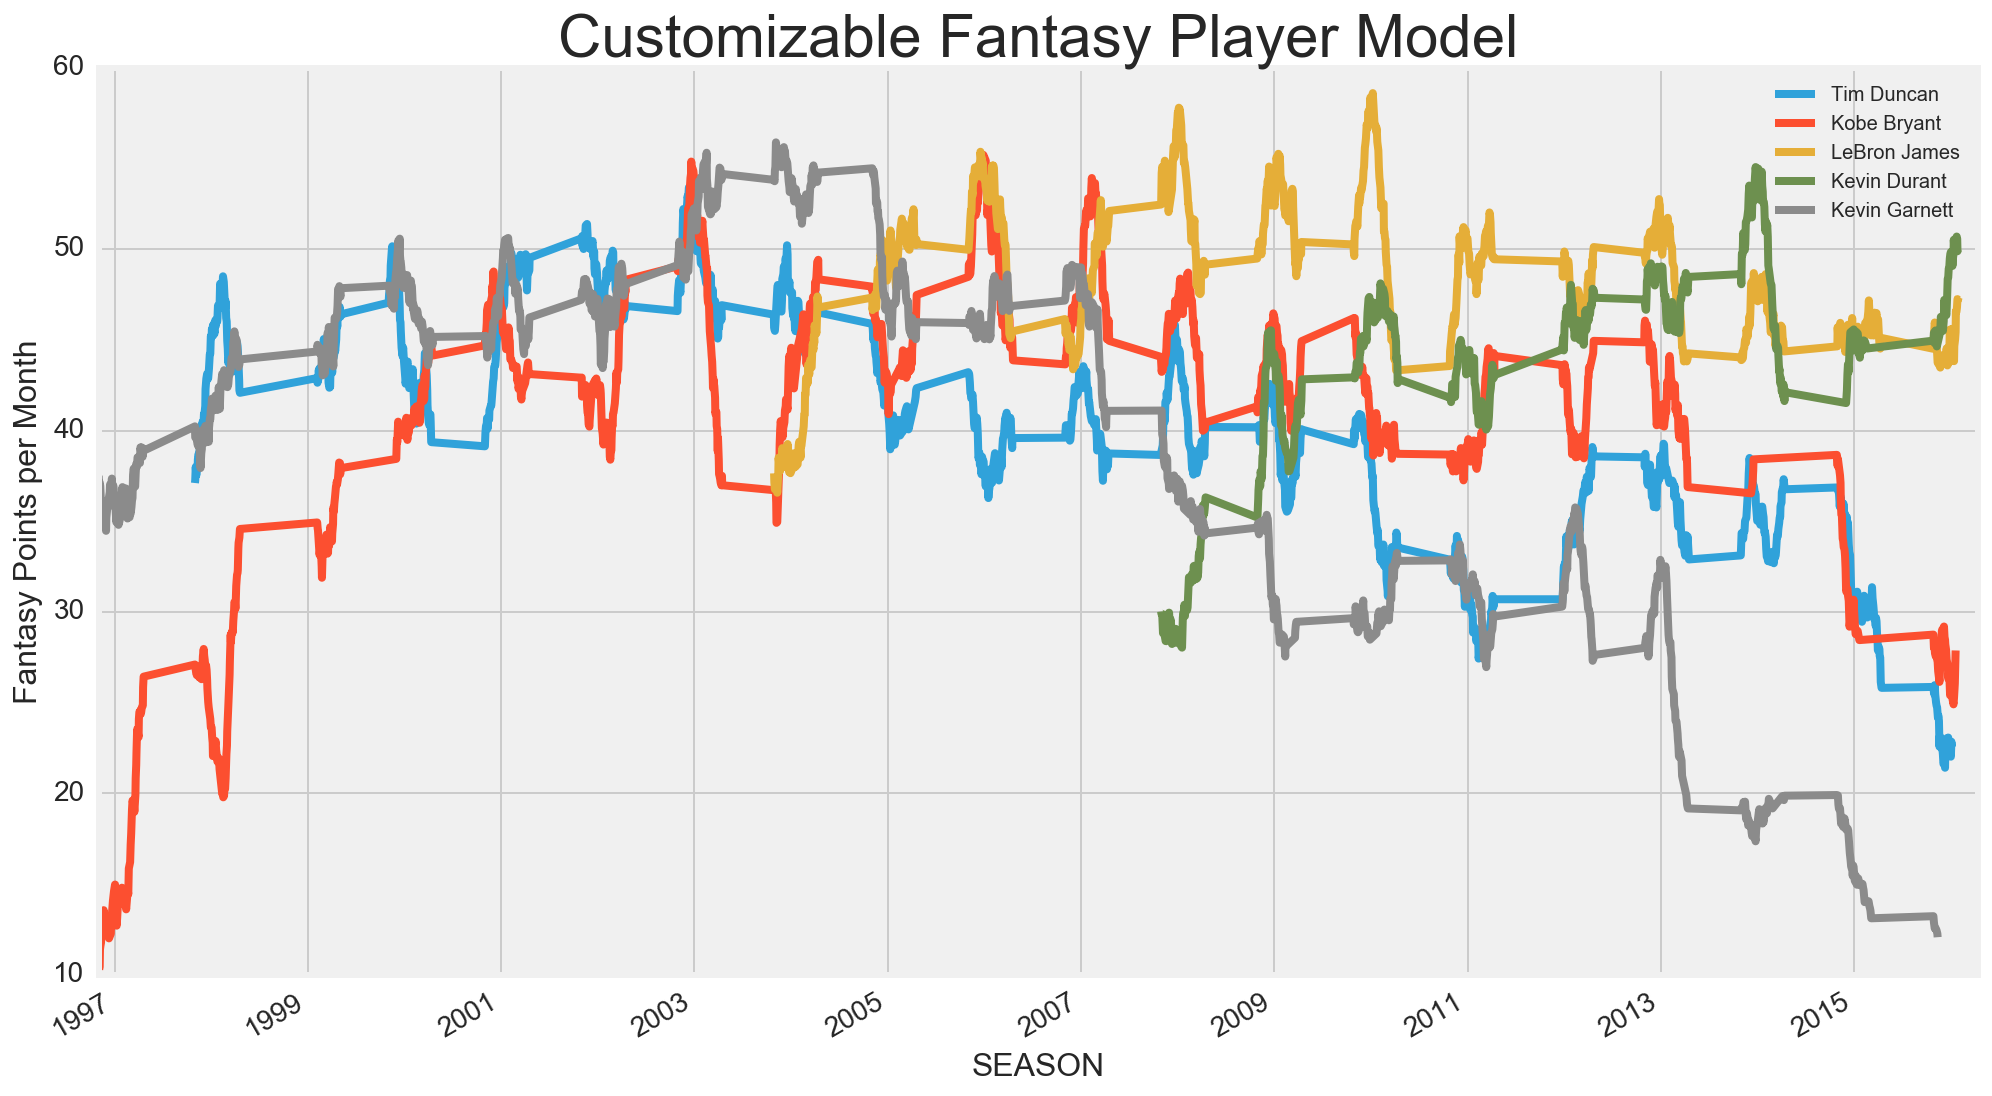

In [41]:
fig = plt.figure(figsize=(15,9))
ax = fig.gca()
Player1 = "Tim Duncan"
Player2 = 'Kobe Bryant'
Player3 = 'LeBron James'
Player4 = 'Kevin Durant'
Player5 = 'Kevin Garnett'
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player1)]['FP'].rolling(window=31).mean().plot(figsize=(15,9), fontsize=14, ax=ax, label=Player1)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player2)]['FP'].rolling(window=31).mean().plot(figsize=(15,9), fontsize=14, ax=ax, label=Player2)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player3)]['FP'].rolling(window=31).mean().plot(figsize=(15,9), fontsize=14, ax=ax, label=Player3)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player4)]['FP'].rolling(window=31).mean().plot(figsize=(15,9), fontsize=14, ax=ax, label=Player4)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player5)]['FP'].rolling(window=31).mean().plot(figsize=(15,9), fontsize=14, ax=ax, label=Player5)

ax.set_xlabel('SEASON', size=16)
ax.set_ylabel('Fantasy Points per Month', size=16)
ax.set_title('Customizable Fantasy Player Model', size=30)
plt.legend(loc='upper right')
plt.show()

The above time series graph is one of the first graphs I made for fun, but sparked a bunch of ideas on how to use it. Initially, I just wanted to see the series on how the top tier players achieved through the whole career. Later I figured, I can compared players between different tiers, countries and draft rounds, which is what I did below.

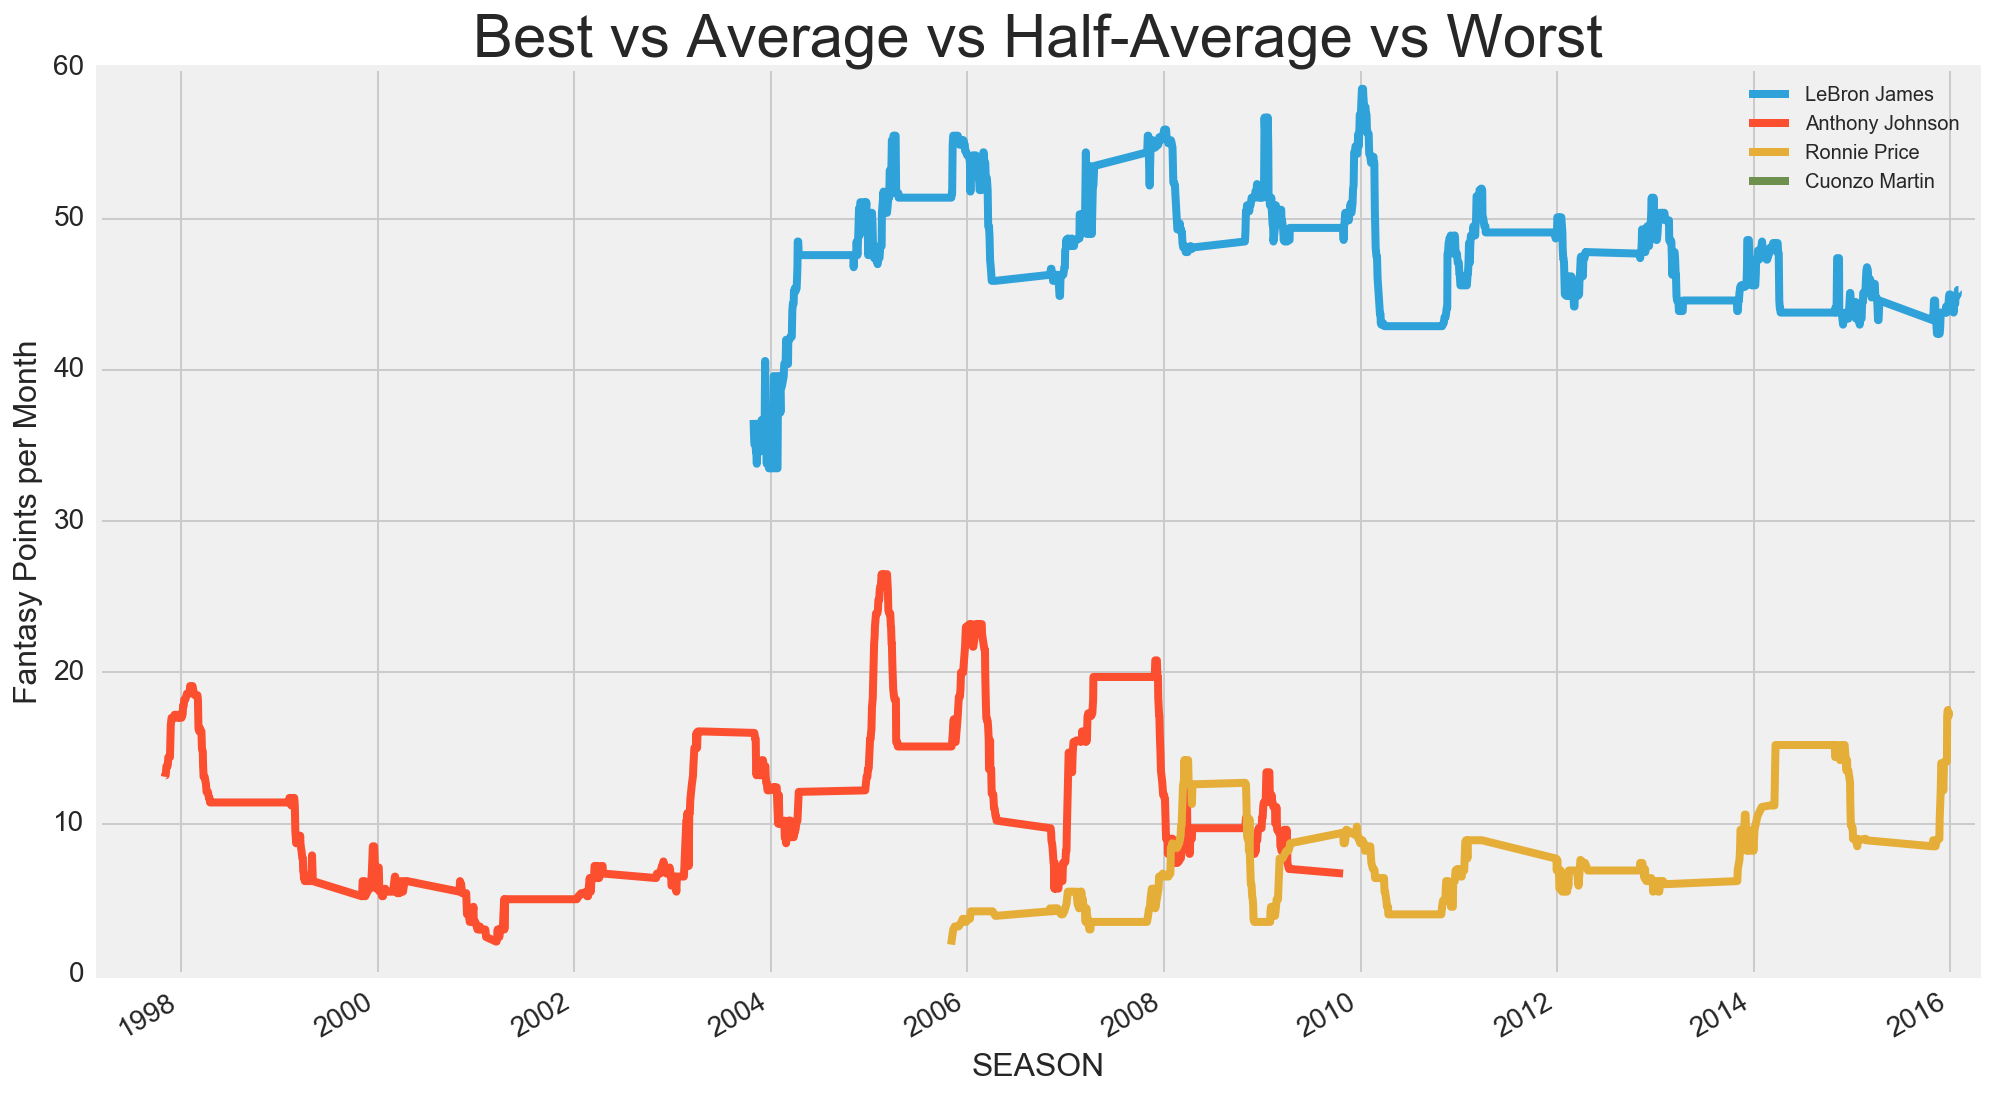

In [42]:
fig = plt.figure(figsize=(15,9))
ax = fig.gca()
Player1 = "LeBron James"
Player2 = 'Anthony Johnson'
Player3 = 'Ronnie Price'
Player4 = 'Cuonzo Martin'
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player1)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, ax=ax, label=Player1)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player2)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, ax=ax, label=Player2)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player3)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, ax=ax, label=Player3)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player4)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, ax=ax, label=Player4)

ax.set_xlabel('SEASON', size=16)
ax.set_ylabel('Fantasy Points per Month', size=16)
ax.set_title('Best vs Average vs Half-Average vs Worst', size=30)
plt.legend(loc='upper right')
plt.show()

It is clear that LeBron James, being a top tier fantasy pick, was miles ahead of an average player. What was interesting was an average player like Anthony Johnson was not as good as I thought. Although he may have been one of the players at the median, Ronnie Price, who was half of the median (hence, half-average), was more consistent. I also did one for one of the players at the bottom 1st percentile and Cuonzo Martin did not show up on the graph at all. I wonder why until I plotted all the 1st percentile players below.

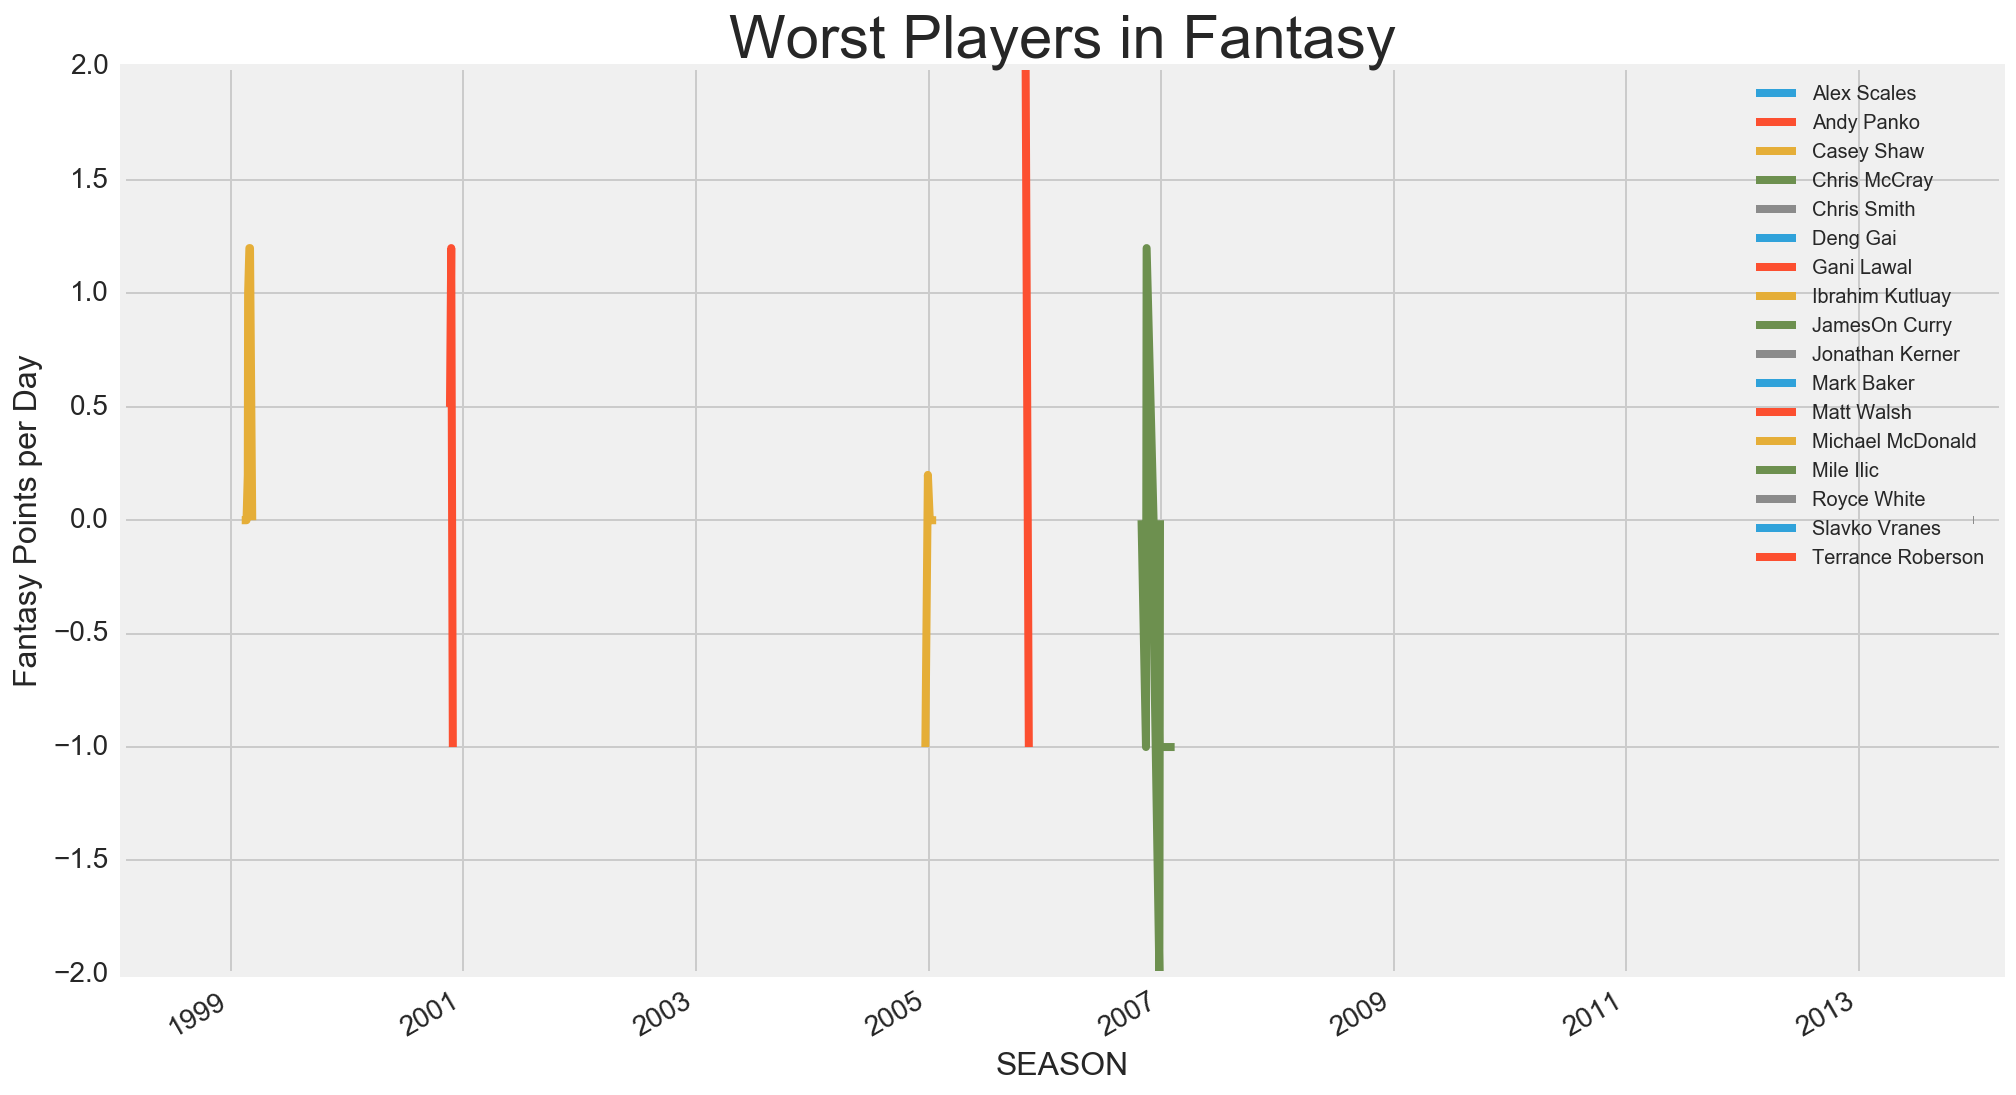

In [46]:
df_player_compare = pd.DataFrame(df_gamelogs.groupby(['PLAYER_NAME'])['FP'].mean().reset_index())

# Drop the 1 NaN value
df_complete.fp_mean.dropna(inplace=True)

first_percentile_players = []
for name in df_player_compare[(df_player_compare.FP >= -1) & (df_player_compare.FP <= np.percentile(df_complete['fp_mean'], 1))].PLAYER_NAME:
    first_percentile_players.append(name)
    
fig = plt.figure(figsize=(15,9))
ax = fig.gca()
for player in first_percentile_players:
    df_gamelogs[(df_gamelogs.PLAYER_NAME == player)]['FP'].rolling(window=1).median().plot(figsize=(15,9), fontsize=14, ax=ax, label=player)

ax.set_xlabel('SEASON', size=16)
ax.set_ylabel('Fantasy Points per Day', size=16)
ax.set_title('Worst Players in Fantasy', size=30)
plt.legend(loc='upper right')
plt.show()

Most players who were at the bottom percentile were players that only played limited amount of games per season and were either cut or benched the rest of the season. I thought about subsetting them out, but even after subsetting, they did not affect my model much, so I just left them out when I was predicting for the upcoming season instead. However, I was interested to see how large many of these types of players were labelled in my "Danger" category.

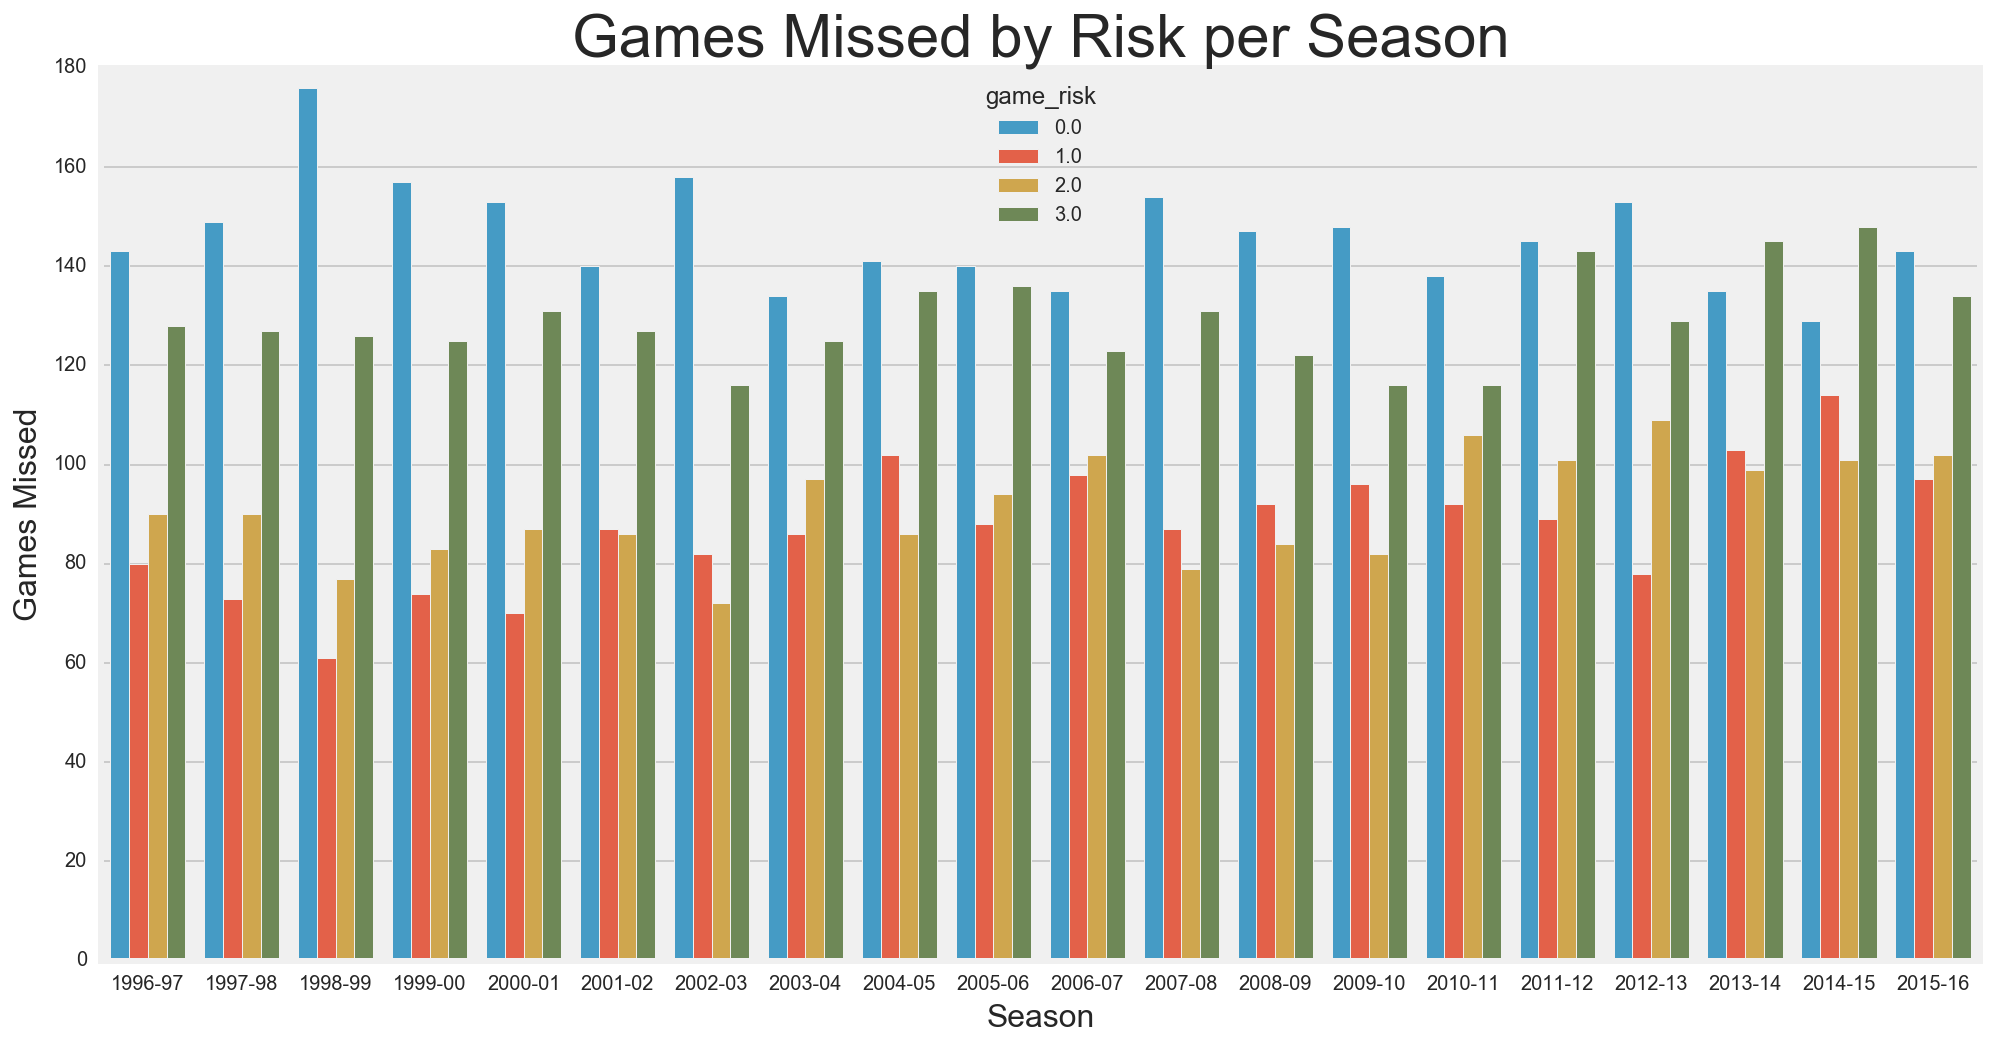

In [47]:
df_season_game_risk = pd.DataFrame(df_complete_target.groupby(['SEASON', 'game_risk'])['game_risk'].count())

tmp2 = df_season_game_risk.rename(columns={'game_risk':'counts'}).reset_index()

fig = plt.figure(figsize=(15,8))
ax = fig.gca()

sns.barplot('SEASON', 'counts', data=tmp2, hue='game_risk', ax=ax)
ax.set_xlabel('Season', size=16)
ax.set_ylabel('Games Missed', size=16)
ax.set_title('Games Missed by Risk per Season', size=30)
plt.show()

Although kind of cluttered, it was clear that low risk and danger players are the higher of the 4. This helped me confirmed that when I'm doing my final predictions later on that I subset the data with players who have played more than a certain threshold of games or limit the amount of players I want to predict.

I was always curious on how USA players' fantasy value differed from international players. Although international players are up and coming, I don't recall any strong candidate that was every picked early. I decided to compare USA and international players based on where they were drafted in the NBA draft and compare their fantasy values.

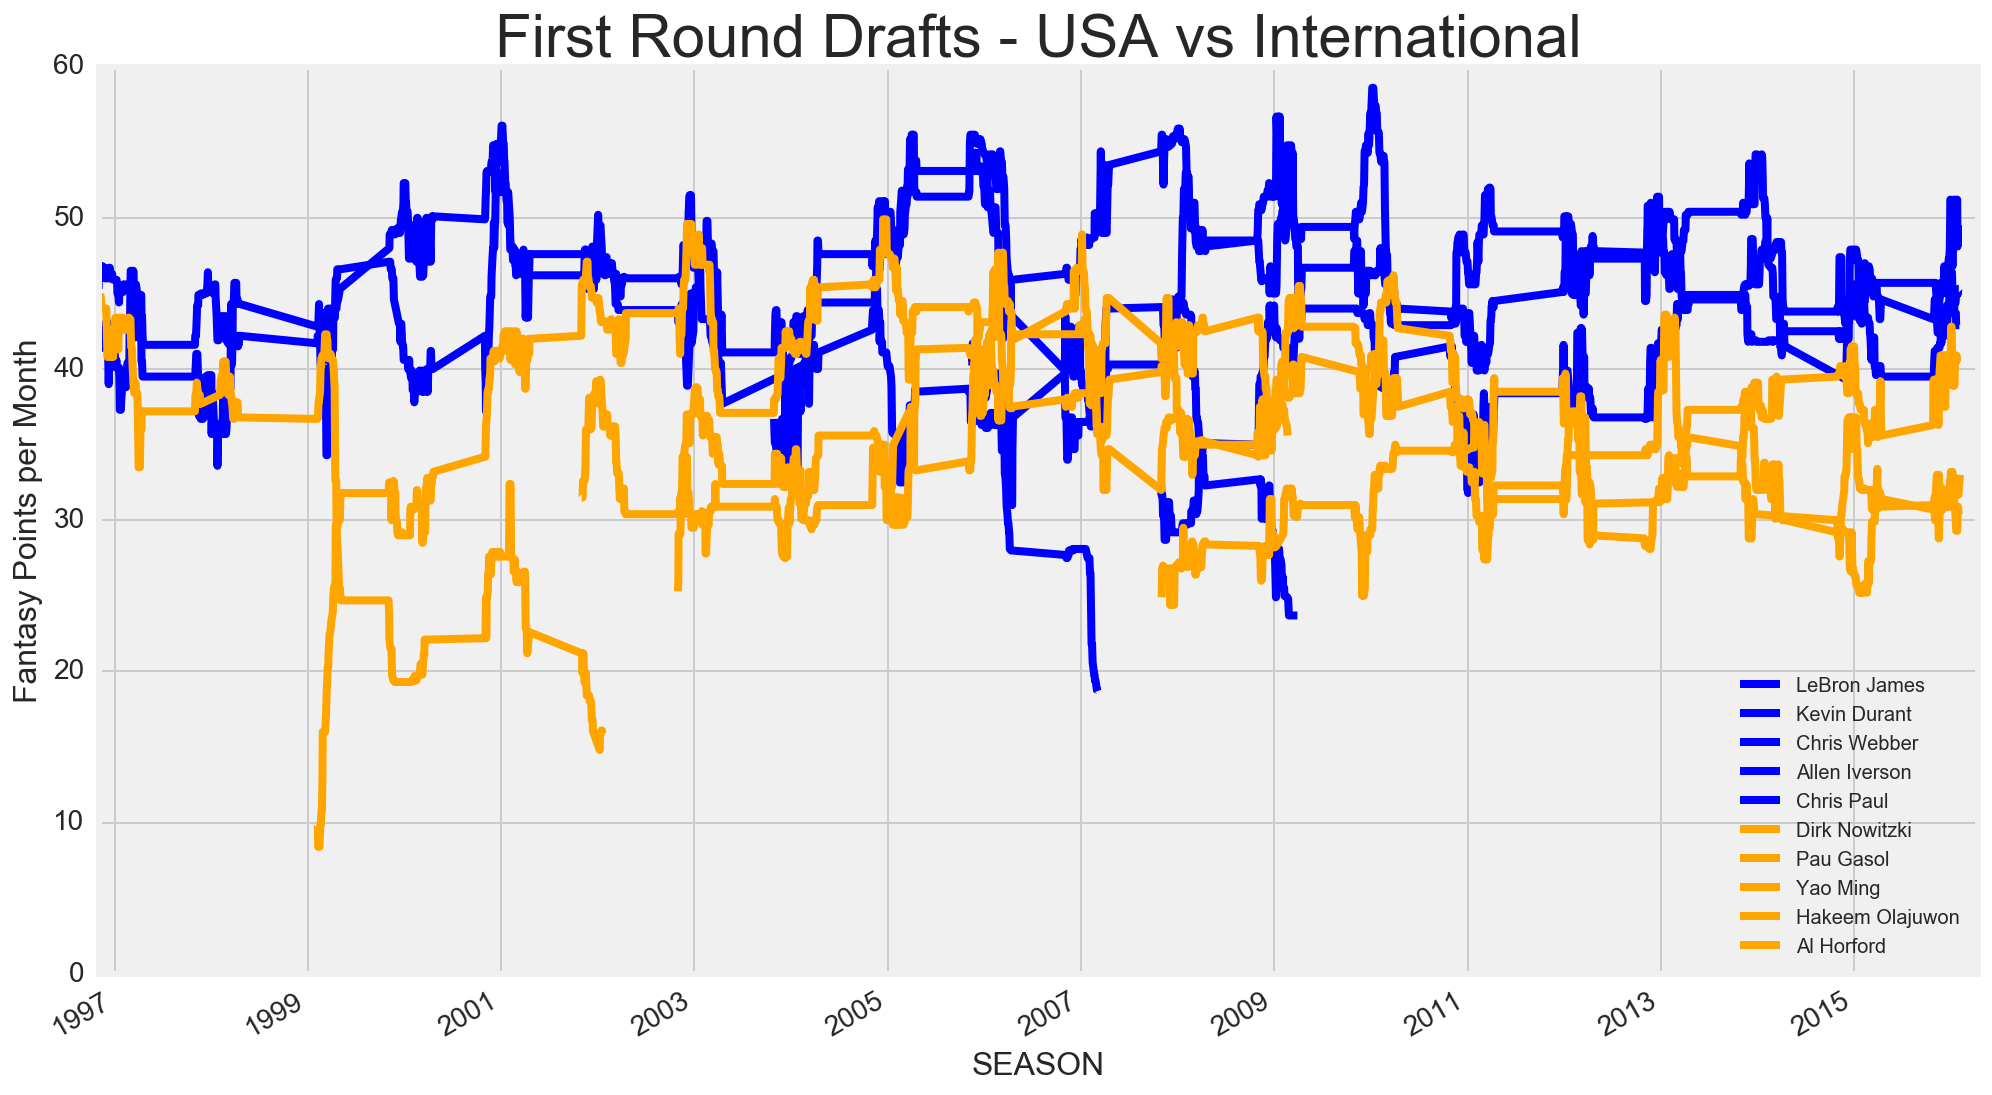

In [48]:
# USA vs International - 1st Round Draftee
fig = plt.figure(figsize=(15,9))
ax = fig.gca()
Player1 = "LeBron James"
Player2 = 'Kevin Durant'
Player3 = 'Chris Webber'
Player4 = 'Allen Iverson'
Player5 = 'Chris Paul'
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player1)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, color='blue', ax=ax, label=Player1)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player2)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, color='blue', ax=ax, label=Player2)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player3)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, color='blue', ax=ax, label=Player3)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player4)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, color='blue', ax=ax, label=Player4)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player5)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, color='blue', ax=ax, label=Player5)

Player6 = "Dirk Nowitzki"
Player7 = 'Pau Gasol'
Player8 = 'Yao Ming'
Player9 = 'Hakeem Olajuwon'
Player10 = 'Al Horford'
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player6)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, color='orange', ax=ax, label=Player6)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player7)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, color='orange', ax=ax, label=Player7)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player8)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, color='orange', ax=ax, label=Player8)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player9)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, color='orange', ax=ax, label=Player9)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player10)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, color='orange', ax=ax, label=Player10)


ax.set_xlabel('SEASON', size=16)
ax.set_ylabel('Fantasy Points per Month', size=16)
ax.set_title('First Round Drafts - USA vs International', size=30)
plt.legend(loc='lower right')
plt.show()

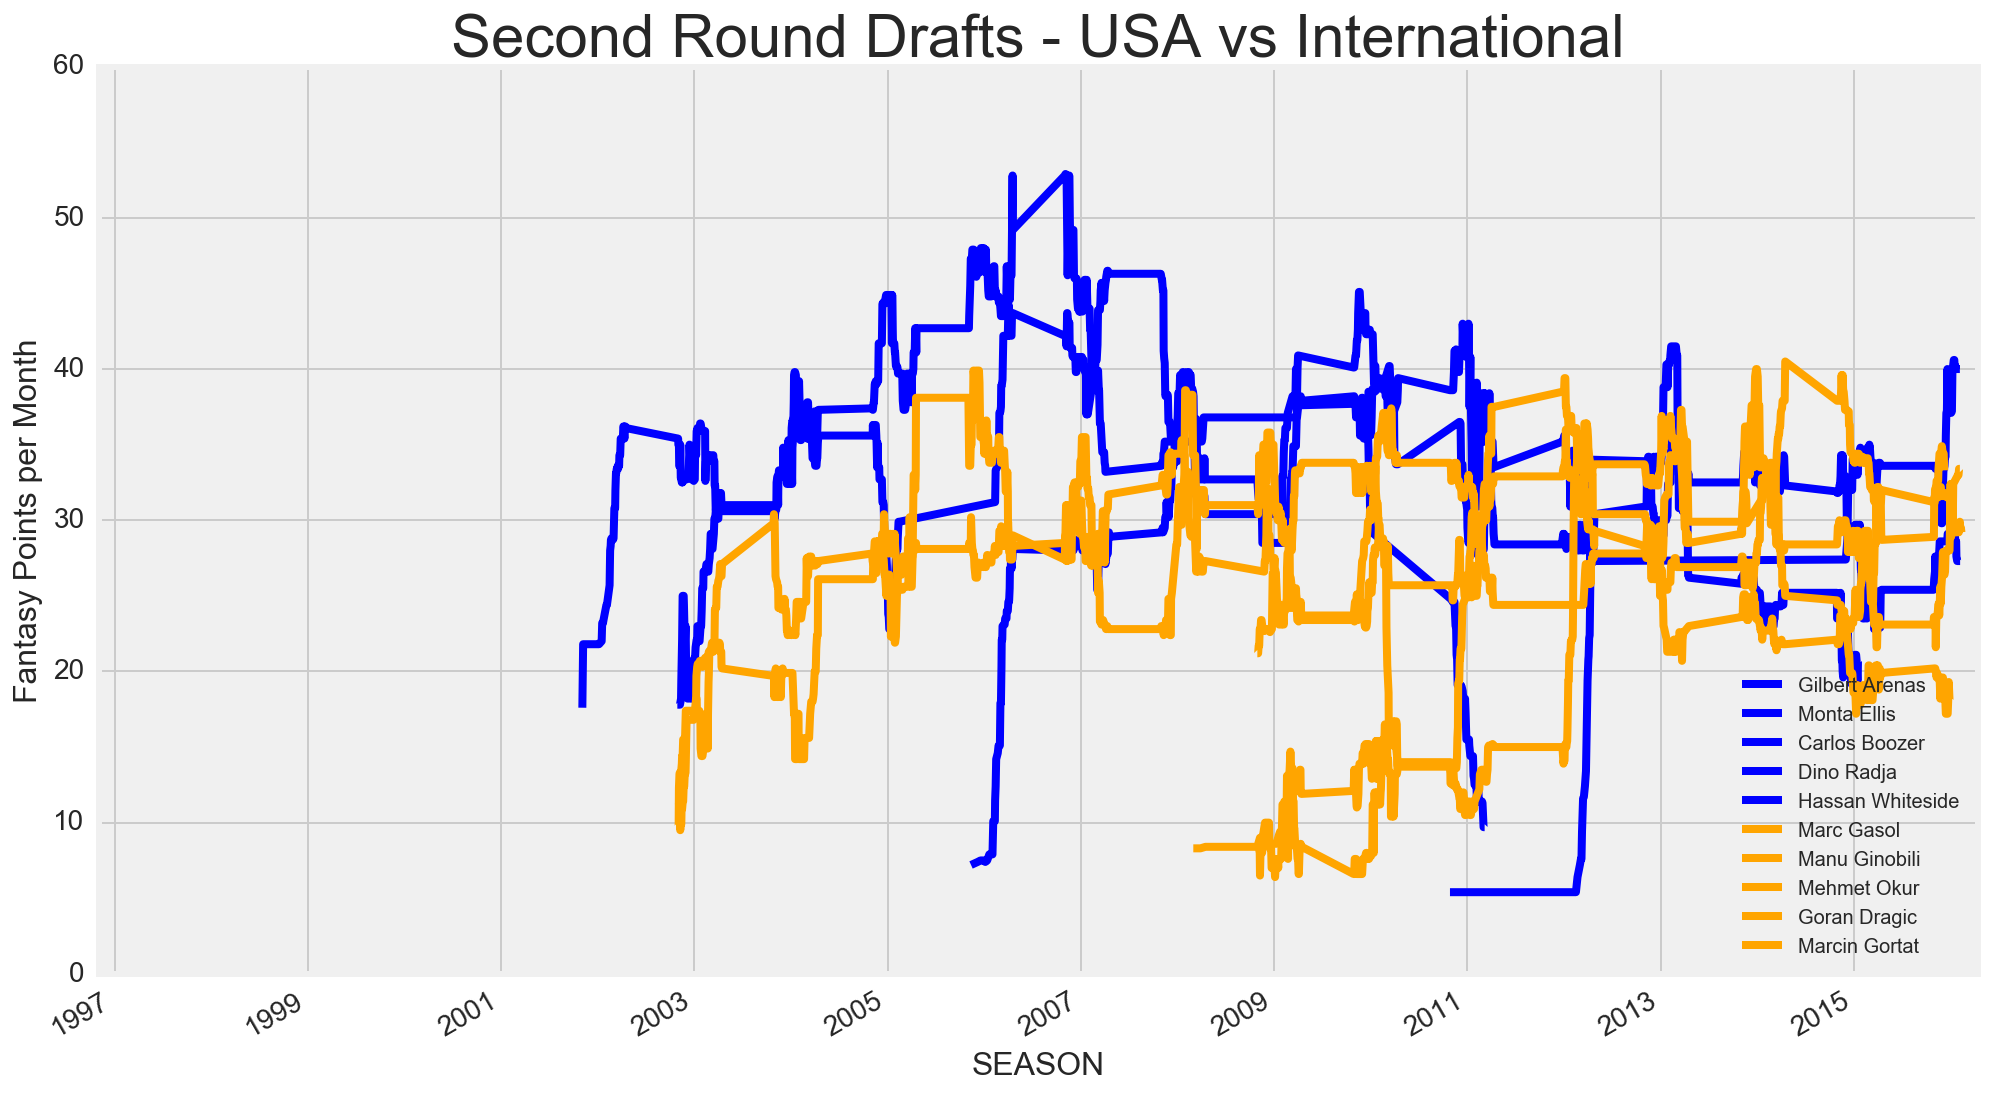

In [49]:
# USA vs International - 2nd Round Draftee
fig = plt.figure(figsize=(15,9))
ax = fig.gca()
Player1 = "Gilbert Arenas"
Player2 = 'Monta Ellis'
Player3 = 'Carlos Boozer'
Player4 = 'Dino Radja'
Player5 = 'Hassan Whiteside'
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player1)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, color='blue', ax=ax, label=Player1)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player2)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, color='blue', ax=ax, label=Player2)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player3)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, color='blue', ax=ax, label=Player3)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player4)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, color='blue', ax=ax, label=Player4)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player5)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, color='blue', ax=ax, label=Player5)

Player6 = "Marc Gasol"
Player7 = 'Manu Ginobili'
Player8 = 'Mehmet Okur'
Player9 = 'Goran Dragic'
Player10 = 'Marcin Gortat'
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player6)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, color='orange', ax=ax, label=Player6)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player7)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, color='orange', ax=ax, label=Player7)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player8)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, color='orange', ax=ax, label=Player8)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player9)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, color='orange', ax=ax, label=Player9)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player10)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, color='orange', ax=ax, label=Player10)


ax.set_xlabel('SEASON', size=16)
ax.set_ylabel('Fantasy Points per Month', size=16)
ax.set_title('Second Round Drafts - USA vs International', size=30)
plt.legend(loc='lower right')
plt.show()

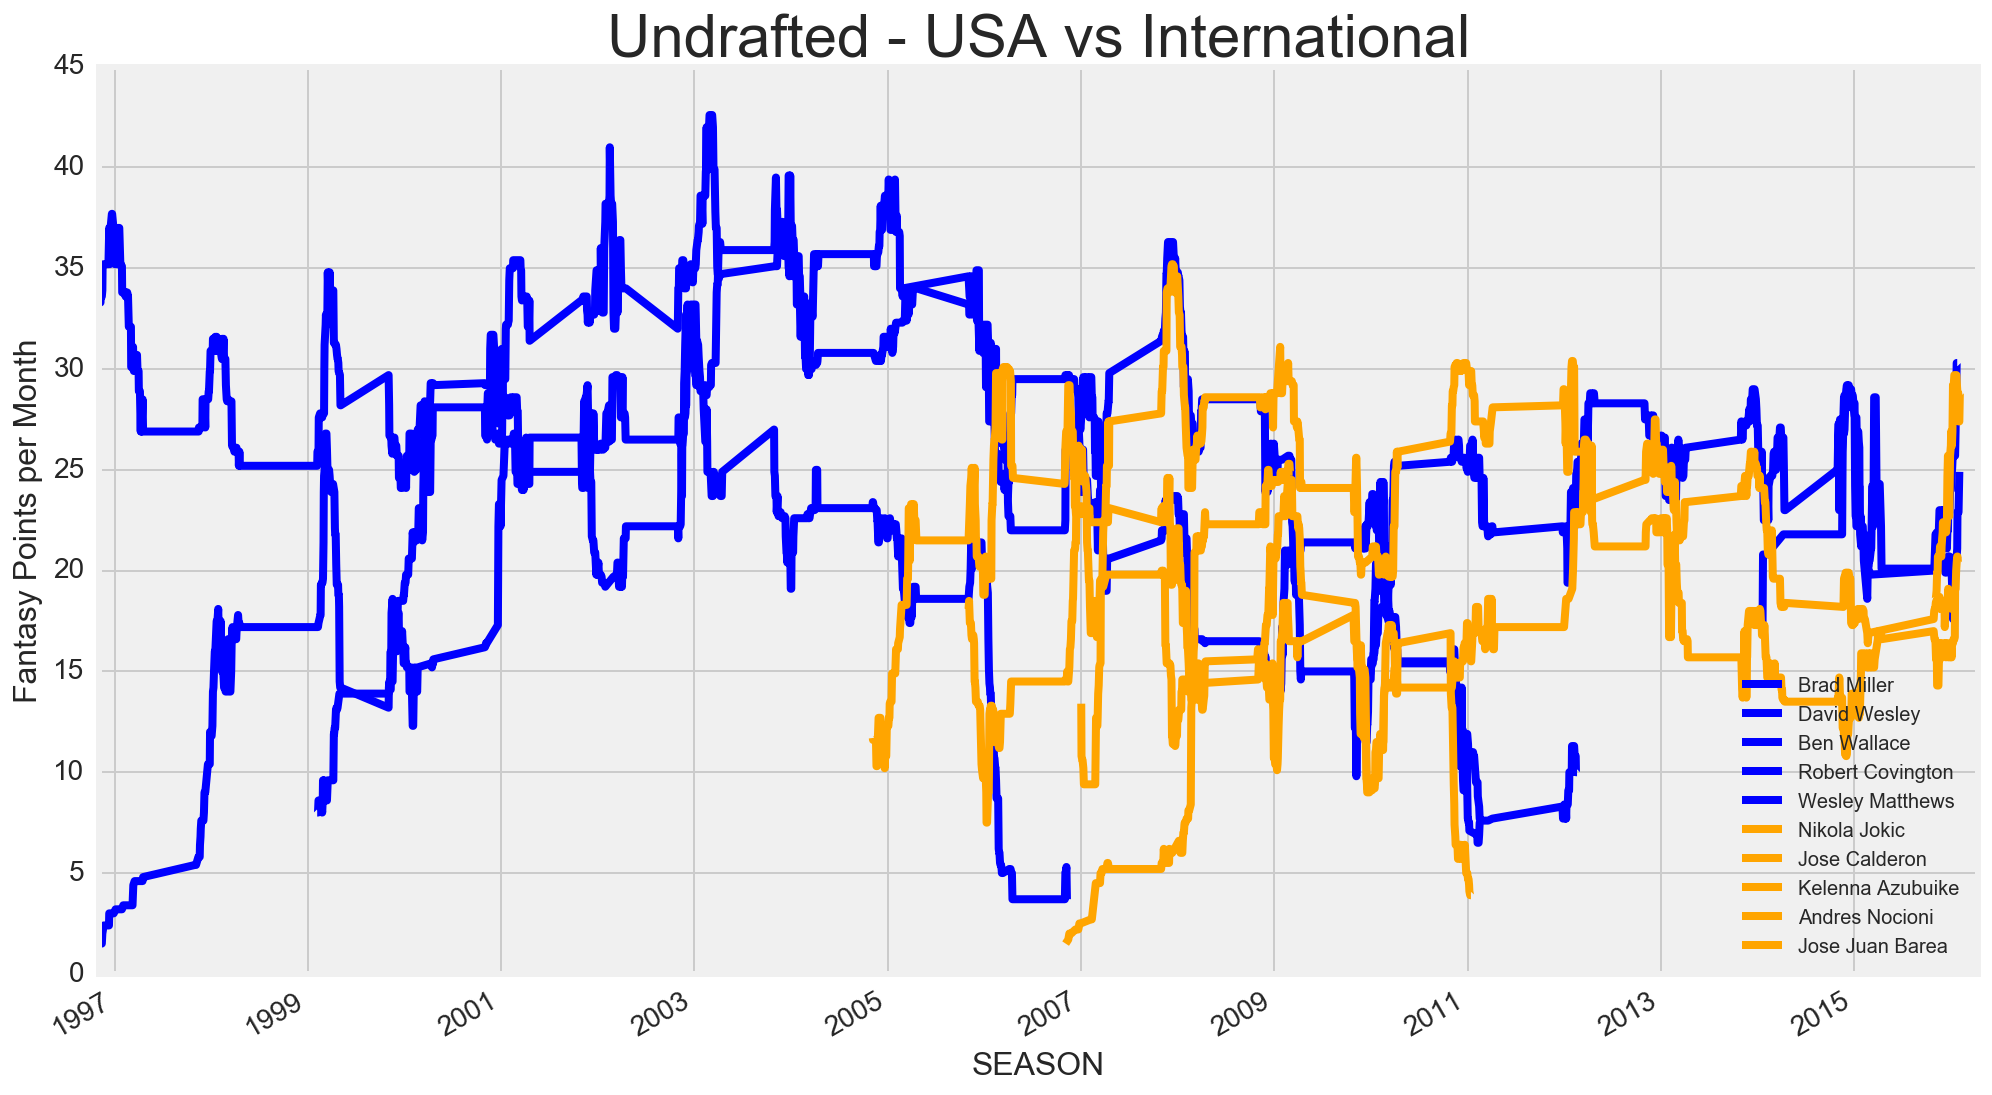

In [50]:
# USA vs International - Undrafted
fig = plt.figure(figsize=(15,9))
ax = fig.gca()
Player1 = "Brad Miller"
Player2 = 'David Wesley'
Player3 = 'Ben Wallace'
Player4 = 'Robert Covington'
Player5 = 'Wesley Matthews'
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player1)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, color='blue', ax=ax, label=Player1)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player2)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, color='blue', ax=ax, label=Player2)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player3)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, color='blue', ax=ax, label=Player3)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player4)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, color='blue', ax=ax, label=Player4)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player5)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, color='blue', ax=ax, label=Player5)

Player6 = "Nikola Jokic"
Player7 = 'Jose Calderon'
Player8 = 'Kelenna Azubuike'
Player9 = 'Andres Nocioni'
Player10 = 'Jose Juan Barea'
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player6)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, color='orange', ax=ax, label=Player6)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player7)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, color='orange', ax=ax, label=Player7)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player8)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, color='orange', ax=ax, label=Player8)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player9)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, color='orange', ax=ax, label=Player9)
df_gamelogs[(df_gamelogs.PLAYER_NAME == Player10)]['FP'].rolling(window=31).median().plot(figsize=(15,9), fontsize=14, color='orange', ax=ax, label=Player10)


ax.set_xlabel('SEASON', size=16)
ax.set_ylabel('Fantasy Points per Month', size=16)
ax.set_title('Undrafted - USA vs International', size=30)
plt.legend(loc='lower right')
plt.show()

It looks pretty clearcut that in the past 20 seasons, the top 5 USA players drafted in the first round compared to the top 5 international players drafted in the first round were better fantasy players. However, starting from the 2005 season, international players in the 2nd round or undrafted, who were most likely being underrated, started to turn up to be on par with their USA counter parts. Currently, there are tons of NBA teams drafting more international players, so I wouldn't be surprised if international players in the future will be on par, fantasy wise, with USA players. Some international players not on the list, who were drafted in the first round and may become a fantasy studs include Kristaps Porzingis, Dario Saric, Mario Hezonja, Emmanuel Mudiay, Andrew Wiggins and Jusuf Nurkic.

Next, I wanted to see the density spread for fantasy points mean, standard deviation and variance. I expected that the 1st percentile to be closer to 0 based on what I found out earlier, but I also wanted to see how the rest of the distribution shaped out.

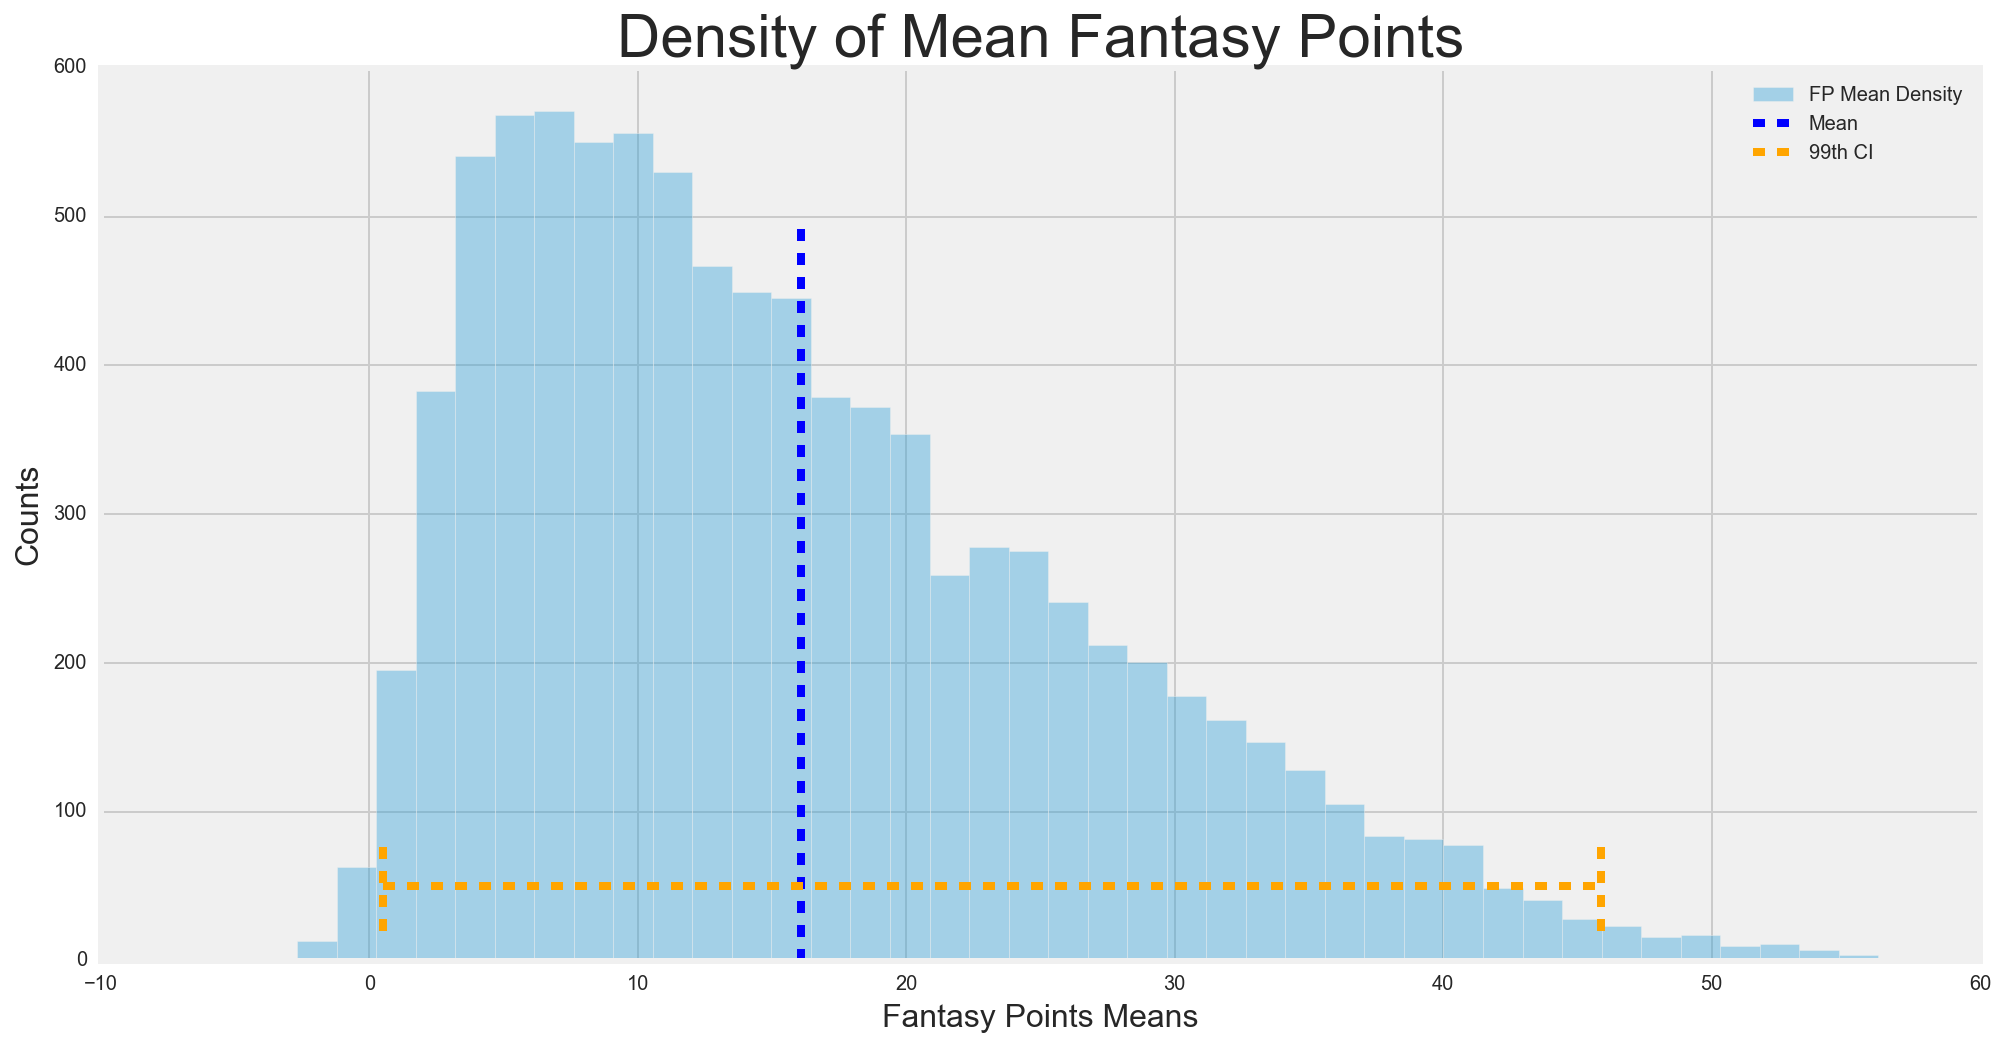

Mean 16.0659217095
1st Percentile 0.517636363637
99th Percentile 45.8859076949
Min -5.63636363636
Max 57.6869809203


In [54]:
# Dropped the 1 NaN value
df_complete_target.fp_mean.dropna(inplace=True)

fig = plt.figure(figsize=(15,8))
ax = fig.gca()

sns.distplot(df_complete_target['fp_mean'], kde=False, ax=ax, label='FP Mean Density')
ax.vlines(df_complete_target['fp_mean'].mean(), 0, 500, linestyles='dashed', color='blue', label='Mean')
ax.vlines(np.percentile(df_complete_target['fp_mean'], 99), 20, 80, linestyles='dashed', color='orange')
ax.vlines(np.percentile(df_complete_target['fp_mean'], 1), 20, 80, linestyles='dashed', color='orange')
ax.hlines(50, np.percentile(df_complete_target['fp_mean'], 1), np.percentile(df_complete_target['fp_mean'], 99), linestyles='dashed', color='orange', label='99th CI')
ax.set_xlabel('Fantasy Points Means', size=16)
ax.set_ylabel('Counts', size=16)
ax.set_title('Density of Mean Fantasy Points', size=30)
plt.legend(loc='upper right')
plt.show()

print 'Mean', df_complete_target['fp_mean'].mean()
print '1st Percentile', np.percentile(df_complete_target['fp_mean'], 1)
print '99th Percentile', np.percentile(df_complete_target['fp_mean'], 99)
print 'Min', df_complete_target['fp_mean'].min()
print 'Max', df_complete_target['fp_mean'].max()

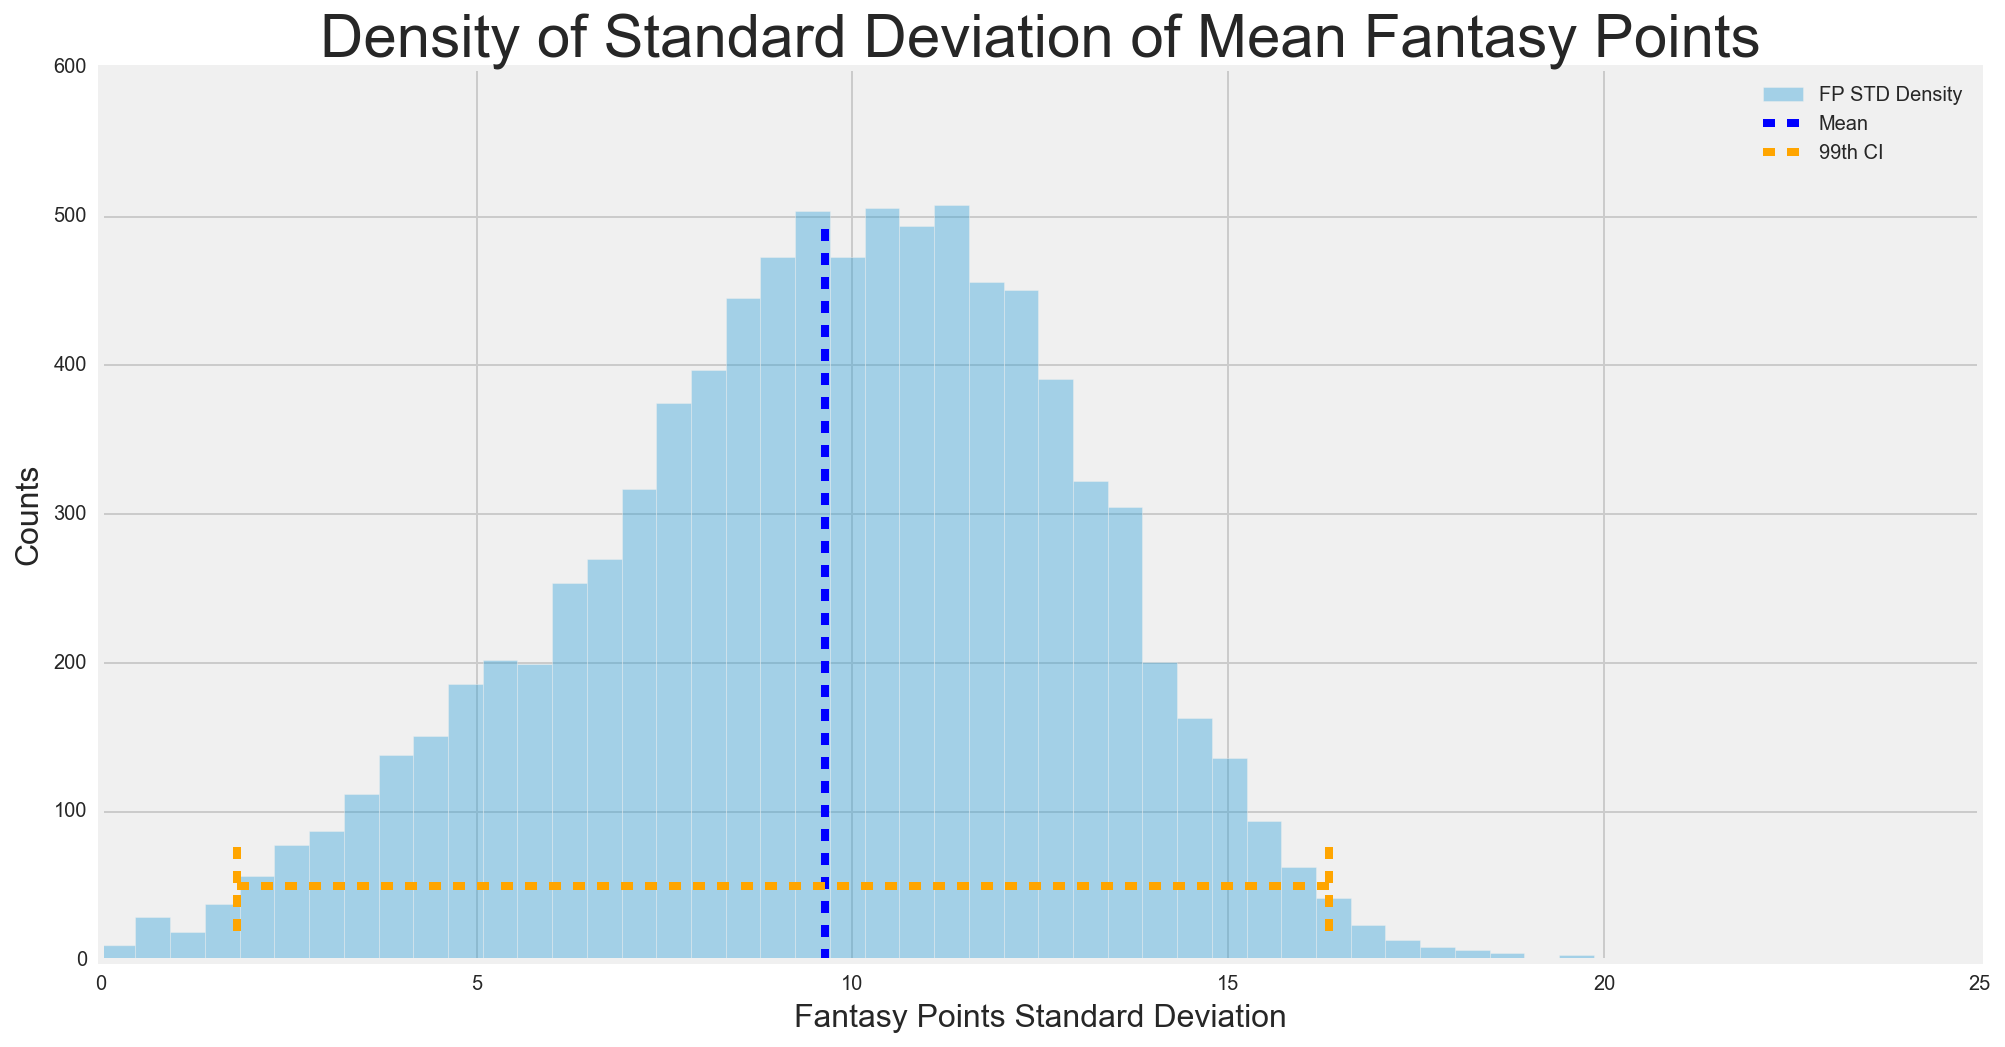

Mean 9.63690657787
1st Percentile 1.8142085666
99th Percentile 16.3432179233
Min 0.0
Max 23.0956646857


In [56]:
# Dropped the 1 NaN value
df_complete_target.fp_std.dropna(inplace=True)

fig = plt.figure(figsize=(15,8))
ax = fig.gca()

sns.distplot(df_complete_target['fp_std'], kde=False, ax=ax, label='FP STD Density')
ax.vlines(df_complete_target['fp_std'].mean(), 0, 500, linestyles='dashed', color='blue', label='Mean')
ax.vlines(np.percentile(df_complete_target['fp_std'], 99), 20, 80, linestyles='dashed', color='orange')
ax.vlines(np.percentile(df_complete_target['fp_std'], 1), 20, 80, linestyles='dashed', color='orange')
ax.hlines(50, np.percentile(df_complete_target['fp_std'], 1), np.percentile(df_complete_target['fp_std'], 99), linestyles='dashed', color='orange', label='99th CI')
ax.set_xlabel('Fantasy Points Standard Deviation', size=16)
ax.set_ylabel('Counts', size=16)
ax.set_title('Density of Standard Deviation of Mean Fantasy Points', size=30)
plt.legend(loc='upper right')
plt.show()

print 'Mean', df_complete_target['fp_std'].mean()
print '1st Percentile', np.percentile(df_complete_target['fp_std'], 1)
print '99th Percentile', np.percentile(df_complete_target['fp_std'], 99)
print 'Min', df_complete_target['fp_std'].min()
print 'Max', df_complete_target['fp_std'].max()

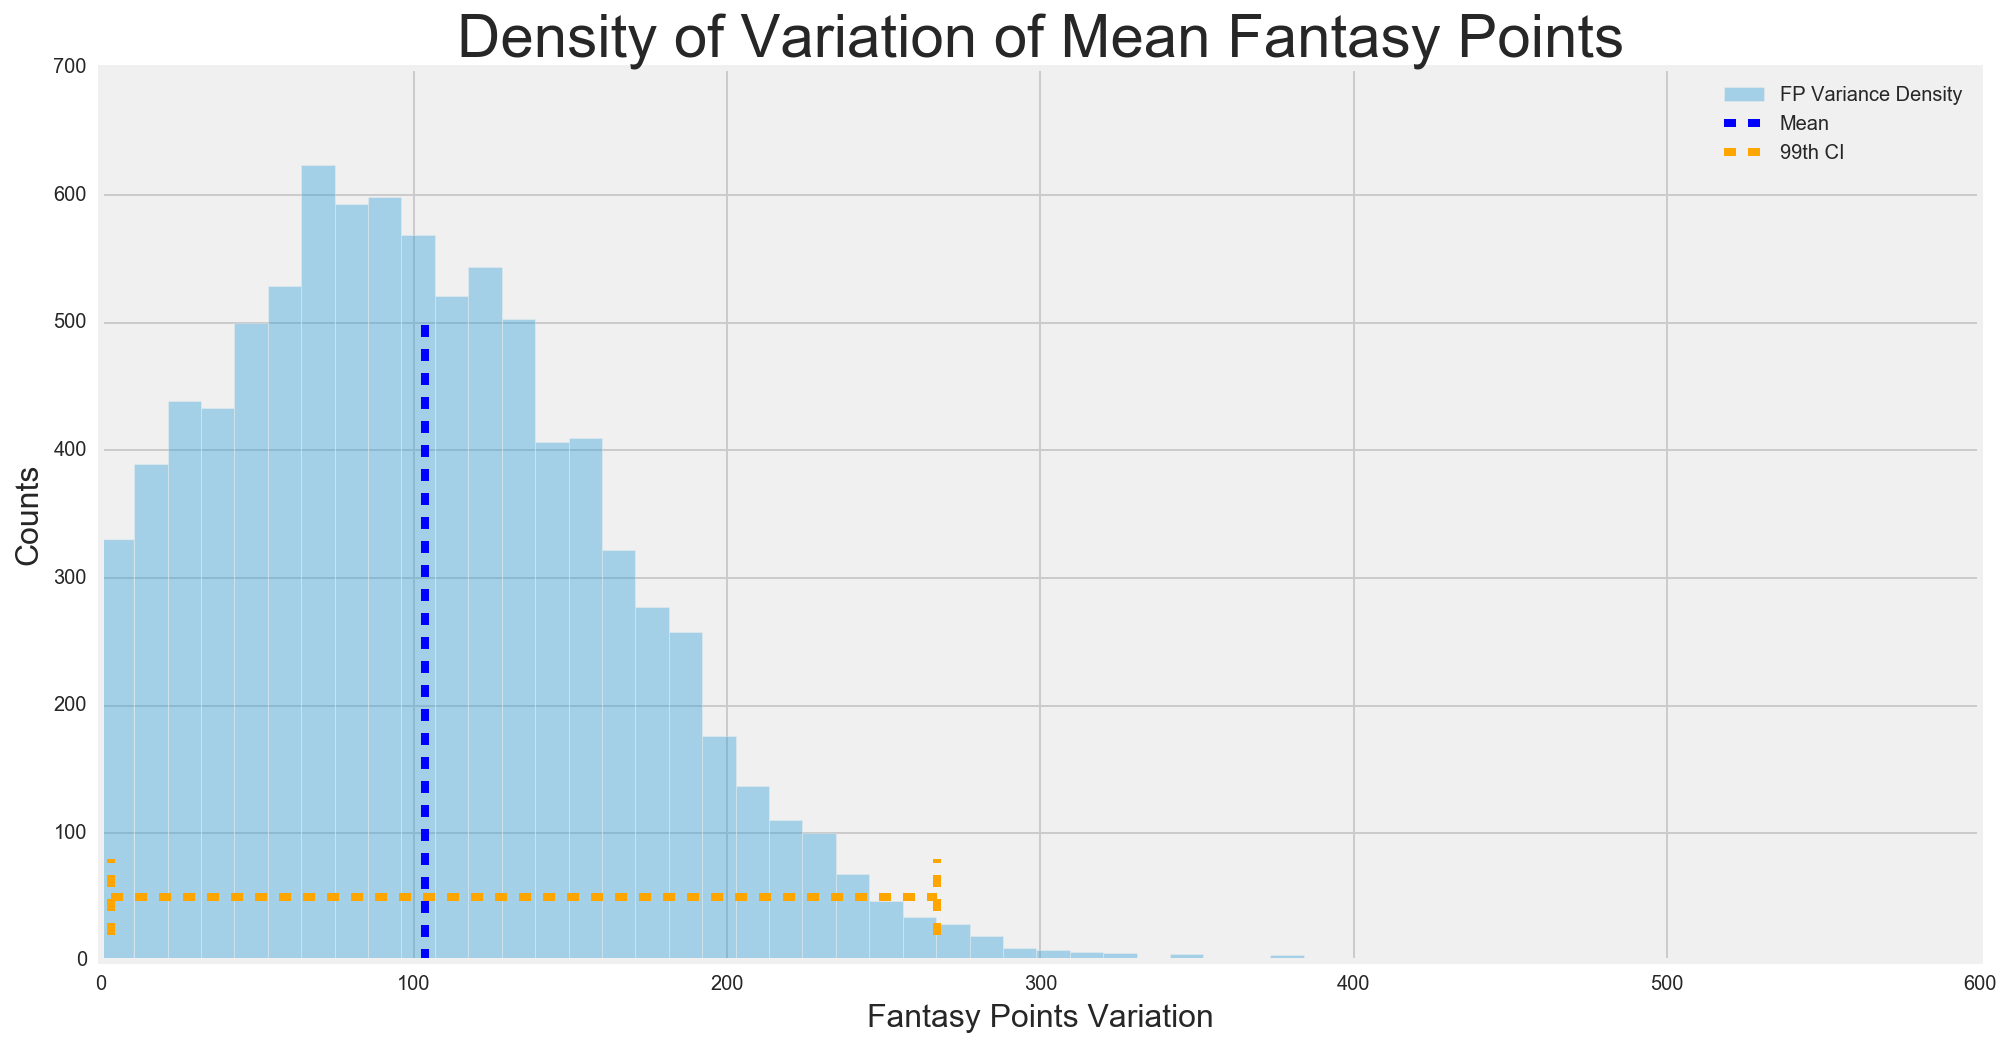

Mean 103.560587035
1st Percentile 3.29137048407
99th Percentile 267.100782009
Min 0.0
Max 533.409727273


In [57]:
# Dropped the 1 NaN value
df_complete_target.fp_var.dropna(inplace=True)

fig = plt.figure(figsize=(15,8))
ax = fig.gca()

sns.distplot(df_complete_target['fp_var'], kde=False, ax=ax, label='FP Variance Density')
ax.vlines(df_complete_target['fp_var'].mean(), 0, 500, linestyles='dashed', color='blue', label='Mean')
ax.vlines(np.percentile(df_complete_target['fp_var'], 99), 20, 80, linestyles='dashed', color='orange')
ax.vlines(np.percentile(df_complete_target['fp_var'], 1), 20, 80, linestyles='dashed', color='orange')
ax.hlines(50, np.percentile(df_complete_target['fp_var'], 1), np.percentile(df_complete_target['fp_var'], 99), linestyles='dashed', color='orange', label='99th CI')
ax.set_xlabel('Fantasy Points Variation', size=16)
ax.set_ylabel('Counts', size=16)
ax.set_title('Density of Variation of Mean Fantasy Points', size=30)
plt.legend(loc='upper right')
plt.show()

print 'Mean', df_complete_target['fp_var'].mean()
print '1st Percentile', np.percentile(df_complete_target['fp_var'], 1)
print '99th Percentile', np.percentile(df_complete_target['fp_var'], 99)
print 'Min', df_complete_target['fp_var'].min()
print 'Max', df_complete_target['fp_var'].max()

I must say, I was quite surprised at the results. I expected there to be a lot of values below the mean, but I did not expect so many players playing below the average. This just shows that in standard league, where you are only drafting 156 players, you are mostly drafting players way above the mean. It also shows how much of a fantasy monster the top 1st percentile are and how much they can affect a team. This also solidified my reasoning that less injury prone and consistent players should be emphasized on because you can't stand losing a fantasy monster to injury. The standard deviation and variance were normally distributed. I'd assume the ridicuously high variance players, which is creating a skewed right distribution, are players who played 2 games, one with a negative fantasy score and then another game with a high fantasy score.

Lastly, I wanted to make sure that my aggregate ranks were somewhat normally distributed and also that all my target variables were linearly correlated with each other.

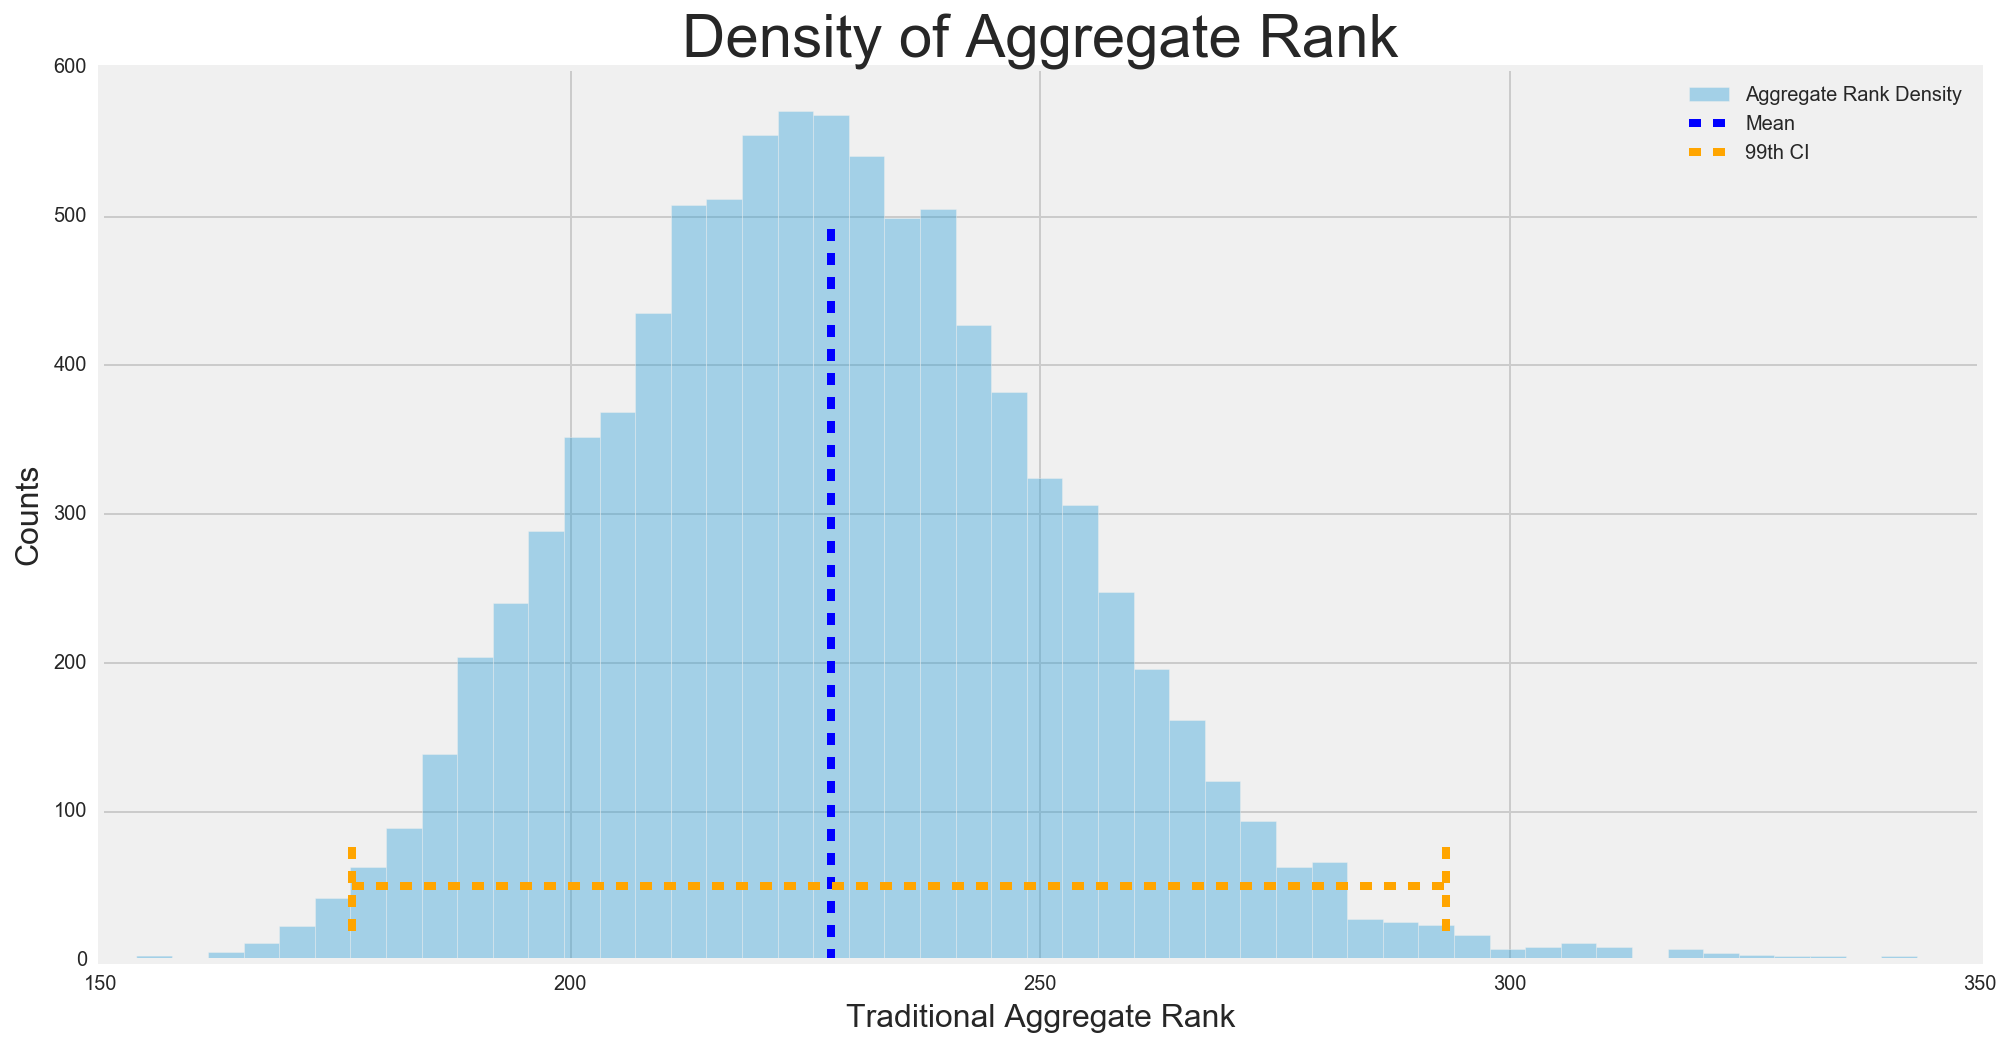

Mean 227.749036025
1st Percentile 176.720784314
99th Percentile 293.200784314
Min 153.833333333
Max 343.274509804


In [64]:
df_complete_target.agg_rank.dropna(inplace=True)

fig = plt.figure(figsize=(15,8))
ax = fig.gca()

sns.distplot(df_complete_target['agg_rank'], kde=False, ax=ax, label='Aggregate Rank Density')
ax.vlines(df_complete_target['agg_rank'].mean(), 0, 500, linestyles='dashed', color='blue', label='Mean')
ax.vlines(np.percentile(df_complete_target['agg_rank'], 99), 20, 80, linestyles='dashed', color='orange')
ax.vlines(np.percentile(df_complete_target['agg_rank'], 1), 20, 80, linestyles='dashed', color='orange')
ax.hlines(50, np.percentile(df_complete_target['agg_rank'], 1), np.percentile(df_complete_target['agg_rank'], 99), linestyles='dashed', color='orange', label='99th CI')
ax.set_xlabel('Traditional Aggregate Rank', size=16)
ax.set_ylabel('Counts', size=16)
ax.set_title('Density of Aggregate Rank', size=30)
plt.legend(loc='upper right')
plt.show()

print 'Mean', df_complete_target['agg_rank'].mean()
print '1st Percentile', np.percentile(df_complete_target['agg_rank'], 1)
print '99th Percentile', np.percentile(df_complete_target['agg_rank'], 99)
print 'Min', df_complete_target['agg_rank'].min()
print 'Max', df_complete_target['agg_rank'].max()

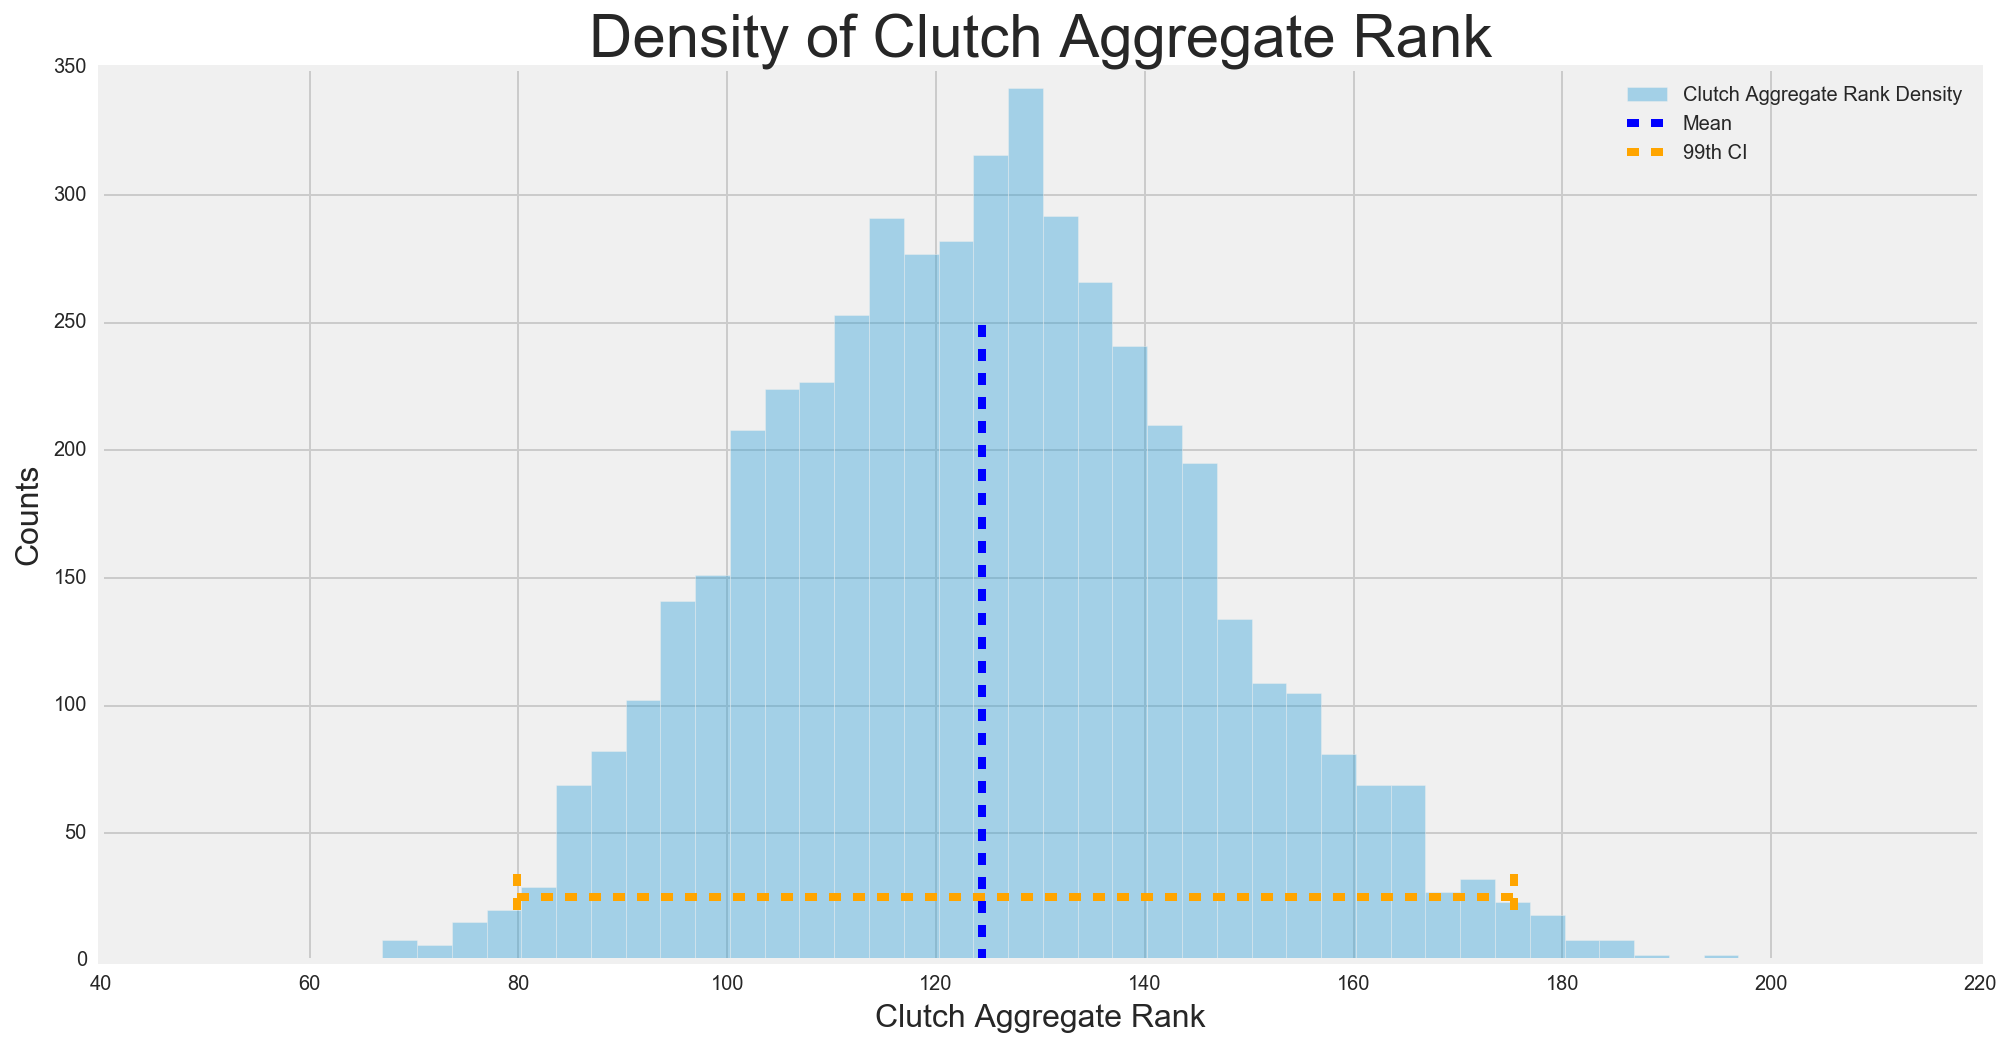

Mean 124.45051609
1st Percentile 79.9156626506
99th Percentile 175.390361446
Min 50.3012048193
Max 206.855421687


In [60]:
df_complete_target.clutch_agg_rank.dropna(inplace=True)

fig = plt.figure(figsize=(15,8))
ax = fig.gca()

sns.distplot(df_complete_target['clutch_agg_rank'], kde=False, ax=ax, label='Clutch Aggregate Rank Density')
ax.vlines(df_complete_target['clutch_agg_rank'].mean(), 0, 250, linestyles='dashed', color='blue', label='Mean')
ax.vlines(np.percentile(df_complete_target['clutch_agg_rank'], 99), 20, 35, linestyles='dashed', color='orange')
ax.vlines(np.percentile(df_complete_target['clutch_agg_rank'], 1), 20, 35, linestyles='dashed', color='orange')
ax.hlines(25, np.percentile(df_complete_target['clutch_agg_rank'], 1), np.percentile(df_complete_target['clutch_agg_rank'], 99), linestyles='dashed', color='orange', label='99th CI')
ax.set_xlabel('Clutch Aggregate Rank', size=16)
ax.set_ylabel('Counts', size=16)
ax.set_title('Density of Clutch Aggregate Rank', size=30)
plt.legend(loc='upper right')
plt.show()

print 'Mean', df_complete_target['clutch_agg_rank'].mean()
print '1st Percentile', np.percentile(df_complete_target['clutch_agg_rank'], 1)
print '99th Percentile', np.percentile(df_complete_target['clutch_agg_rank'], 99)
print 'Min', df_complete_target['clutch_agg_rank'].min()
print 'Max', df_complete_target['clutch_agg_rank'].max()

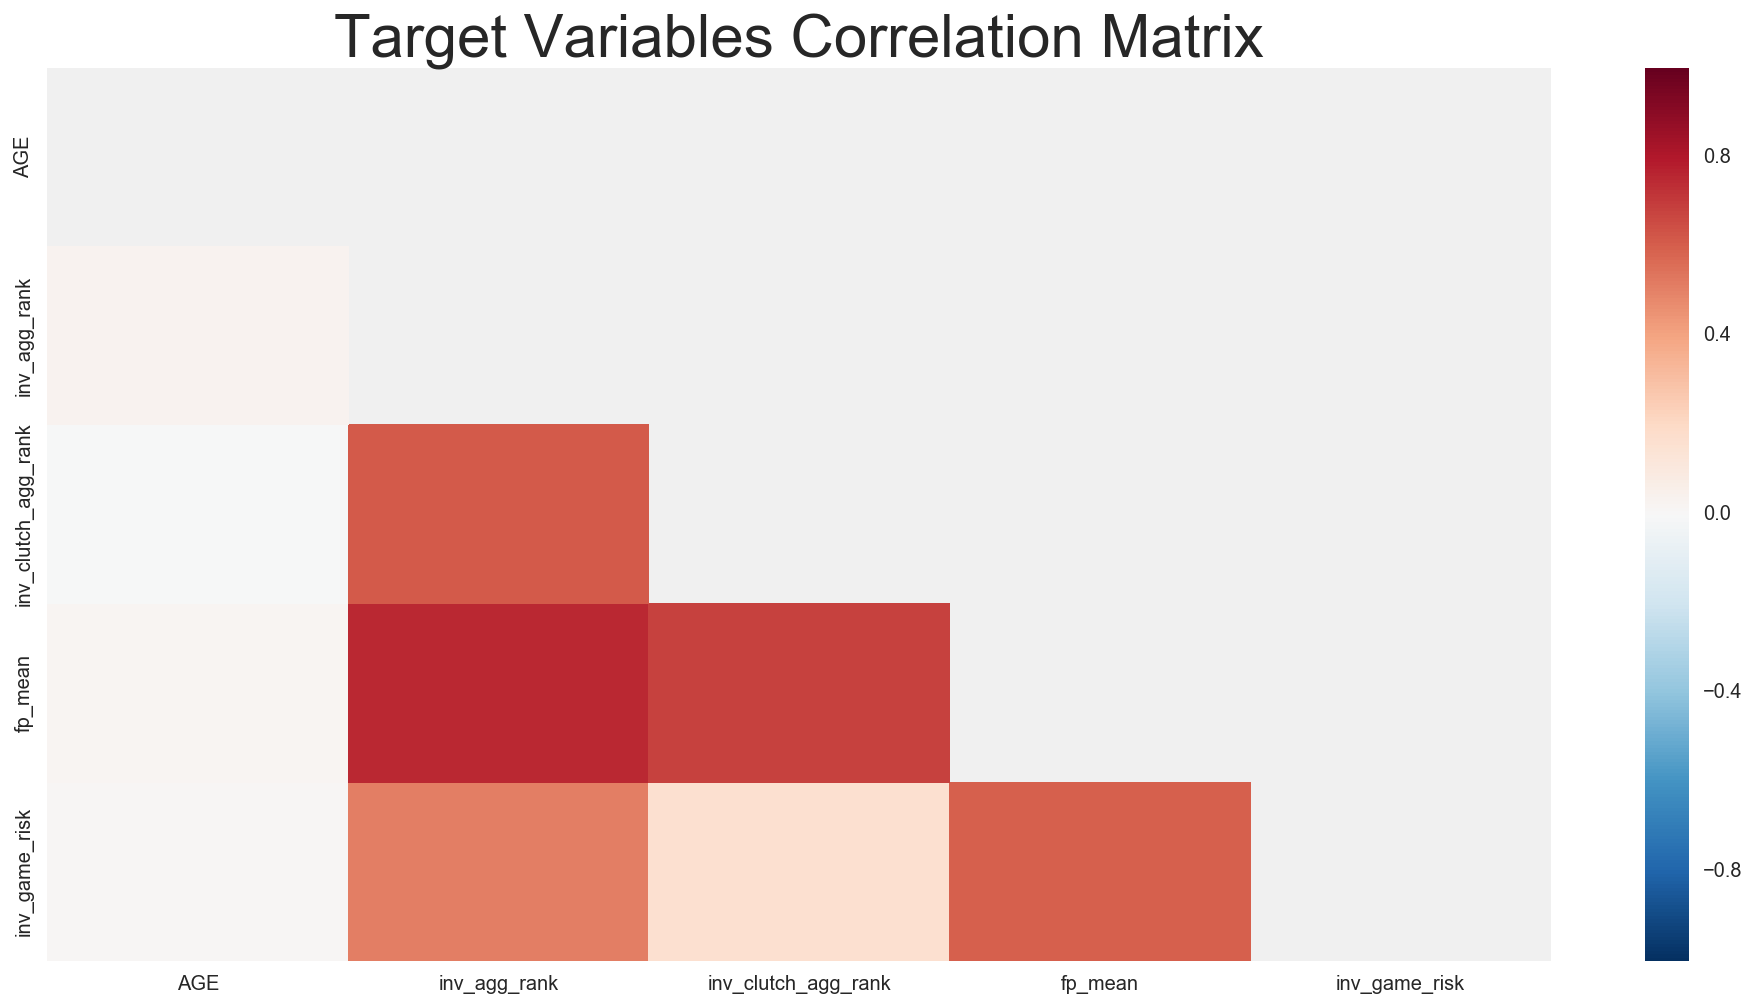

In [67]:
df_complete_target = pd.read_csv('/Users/edwardlee/Desktop/PROJECTS/NBA Fantasy Project/rank_project/completed/complete_all_target.csv')

# Drop all NaN values from player name, team abbreviation and age
df_complete_target.dropna(subset=['PLAYER_NAME', 'TEAM_ABBREVIATION', 'AGE'], how='all', inplace=True)

df_complete_target.sort_values('agg_rank', ascending=True, inplace=True)
df_complete_target.sort_values('clutch_agg_rank', ascending=True, inplace=True)
df_complete_target['inv_agg_rank'] = 1 / df_complete_target['agg_rank']
df_complete_target['inv_clutch_agg_rank'] = 1 / df_complete_target['clutch_agg_rank']

inv_game = []
for game in df_complete_target['game_risk']:
    if game == 0:
        inv_game.append(3)
    elif game == 1:
        inv_game.append(2)
    elif game == 2:
        inv_game.append(1)
    elif game == 3:
        inv_game.append(0)

df_complete_target['inv_game_risk'] = inv_game

target_corr = df_complete_target[['AGE', 'inv_agg_rank', 'inv_clutch_agg_rank', 'fp_mean', 'inv_game_risk']].corr()

mask = np.zeros_like(target_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig = plt.figure(figsize=(15,8))
ax = fig.gca()

ax = sns.heatmap(target_corr, mask=mask)

ax.set_title('Target Variables Correlation Matrix', size=30)
plt.show()

I added age into the formula to also see if there were any correlation. I was actually quite surprised that age had no correlation with any of my dummy target variables. My guess is because as a player gets older, their fantasy value moves positively correlated down, meaning that age and lower output are correlated. Same with their normal and clutch performance. The low correlation between game risk and clutch agg rank makes sense also because only the players who are actually good will play in the final minutes of 4th quarter of a close game.

<a href=#table_of_contents>Back to top</a>

# V. Models <a id=model_selection></a>

## Linear/Logistic Regression vs Lasso vs Ridge vs Elastic Net

I used a Linear Regression for Aggregate Rank, Clutch Aggregate Rank, Fantasy Points Mean, Standard Deviation and Variance and a Logistic Regression for Games Missed Risk to look for any redundancy and correlation issues. In order to compare the results, I also ran a Lasso, Ridge and Elastic Net to see if there were any changes. Also, features such as 3Pt Made, 3Pt Attempted, Percentage of 3Pt Made, 20-24ft made from basket, etc... may all be redundant. It would be a good idea to figure out how the features interacted with each other and understanding why before doing my Random Forest modeling.

## Random Forests

Random Forest Regressor and Classifier was my main modeling tool to predict my 2016-17 fantasy ranks. I chose Random Forest over Decision Trees because it was an ensemble method, which helped me test the strength of my dataset through bagging techniques. But the biggest reason I chose Random Forests was because it will help me categorize continuous variables into groups and split them, based on all my features, to determine a good player versus a bad player. I also figured, Random Forests will be able to help categorize the players in the 14 rounds I wanted to. I can create a new product, or ranking system, which I believe can beat Yahoo, ESPN, CBS and other ranking algorithms. If I wanted to improve my score, I would probably try and use Gradiant Boosted Trees.

<a href=#table_of_contents>Back to top</a>

# VI. Modeling Code <a id=model_code></a>

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, LogisticRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split

from sklearn.cross_validation import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from scipy import interp
from itertools import cycle

import cPickle as pickle

plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

pd.options.display.max_rows = 200
pd.options.display.max_columns = 100

In [79]:
pos_corr_agg = ['inv_agg_rank',
                u'PCT_FGM', u'PCT_FGA', u'PCT_FG3M', u'PCT_FG3A',
       u'PCT_FTM', u'PCT_FTA', u'PCT_DREB', u'PCT_REB',
       u'PCT_AST', u'PCT_TOV', u'PCT_STL', u'PCT_BLKA', 
       u'PCT_PFD', u'PCT_PTS', u'PCT_FGA_2PT', u'PCT_FGA_3PT', u'PCT_PTS_2PT', u'PCT_PTS_2PT_MR',
       u'PCT_PTS_3PT', u'PCT_PTS_FB', u'PCT_PTS_FT', u'PCT_PTS_OFF_TOV',
       u'PCT_UAST_2PM', u'PCT_AST_3PM', u'PCT_UAST_3PM', u'PCT_UAST_FGM',
       u'OFF_RATING', u'NET_RATING', u'AST_PCT', u'AST_TO',
       u'AST_RATIO', u'DREB_PCT', u'REB_PCT', u'TM_TOV_PCT',
       u'EFG_PCT', u'TS_PCT', u'USG_PCT', u'PIE', u'FGM_PG',
       u'GP', u'W', u'L', u'MIN', u'FTM', u'FTA',
       u'OREB', u'DREB', u'REB', u'AST', u'TOV', u'STL', u'BLK',
       u'BLKA', u'PF', u'PFD', u'PTS', u'PLUS_MINUS', u'DD2', u'TD3',
       u'PTS_OFF_TOV', u'PTS_2ND_CHANCE', u'PTS_FB', u'PTS_PAINT',
       u'OPP_PTS_OFF_TOV', u'OPP_PTS_2ND_CHANCE', u'OPP_PTS_FB',
       u'OPP_PTS_PAINT', u'FGM_less_than_5_ft',
       u'FGA_less_than_5_ft', u'FGM_5-9_ft', u'FGA_5-9_ft', u'FGM_10-14_ft', u'FGA_10-14_ft', u'FGM_15-19_ft', 
       u'FGA_15-19_ft', u'FGM_20-24_ft', u'FGA_20-24_ft', u'FGM_25-29_ft', u'FGA_25-29_ft', 
       u'OPP_FGM_less_than_5_ft', u'OPP_FGA_less_than_5_ft', u'OPP_FGM_5-9_ft', u'OPP_FGA_5-9_ft', 
       u'OPP_FGM_10-14_ft', u'OPP_FGA_10-14_ft', u'OPP_FGM_15-19_ft', u'OPP_FGA_15-19_ft', u'OPP_FGM_20-24_ft', 
       u'OPP_FGA_20-24_ft', u'OPP_FGM_25-29_ft', u'OPP_FGA_25-29_ft']

In [80]:
pos_corr_clutch_agg = ['inv_clutch_agg_rank',
                       u'PCT_FGM', u'PCT_FGA', u'PCT_FG3A',
       u'PCT_FTM', u'PCT_FTA', u'PCT_DREB', u'PCT_REB',
       u'PCT_AST', u'PCT_TOV', u'PCT_STL', u'PCT_BLKA', 
       u'PCT_PFD', u'PCT_PTS', u'PCT_FGA_2PT', u'PCT_PTS_2PT', u'PCT_PTS_2PT_MR',
       u'PCT_PTS_FB', u'PCT_PTS_FT', u'PCT_PTS_OFF_TOV',
       u'PCT_UAST_2PM', u'PCT_UAST_3PM', u'PCT_UAST_FGM',
       u'OFF_RATING', u'NET_RATING', u'AST_PCT', u'AST_TO',
       u'AST_RATIO', u'DREB_PCT', u'REB_PCT',
       u'TS_PCT', u'USG_PCT', u'PIE', u'FGM_PG',
       u'W', u'MIN', u'FTM', u'FTA',
       u'OREB', u'DREB', u'REB', u'AST', u'TOV', u'STL', u'BLK',
       u'BLKA', u'PF', u'PFD', u'PTS', u'PLUS_MINUS', u'DD2', u'TD3',
       u'PTS_OFF_TOV', u'PTS_2ND_CHANCE', u'PTS_FB', u'PTS_PAINT',
       u'OPP_PTS_OFF_TOV', u'OPP_PTS_2ND_CHANCE', u'OPP_PTS_FB',
       u'OPP_PTS_PAINT', u'FGM_less_than_5_ft',
       u'FGA_less_than_5_ft', u'FGM_5-9_ft', u'FGA_5-9_ft', u'FGM_10-14_ft', u'FGA_10-14_ft', u'FGM_15-19_ft', 
       u'FGA_15-19_ft', u'FGM_20-24_ft', u'FGA_20-24_ft', u'FGM_25-29_ft', u'FGA_25-29_ft', 
       u'OPP_FGM_less_than_5_ft', u'OPP_FGA_less_than_5_ft', u'OPP_FGM_5-9_ft', u'OPP_FGA_5-9_ft', 
       u'OPP_FGM_10-14_ft', u'OPP_FGA_10-14_ft', u'OPP_FGM_15-19_ft', u'OPP_FGA_15-19_ft', u'OPP_FGM_20-24_ft', 
       u'OPP_FGA_20-24_ft', u'OPP_FGM_25-29_ft', u'OPP_FGA_25-29_ft']

In [81]:
pos_corr_risk = ['inv_game_risk',
                 u'PCT_FGM', u'PCT_FGA', u'PCT_FG3M', u'PCT_FG3A',
       u'PCT_FTM', u'PCT_FTA', u'PCT_DREB', 
       u'PCT_AST', u'PCT_STL', 
       u'PCT_PFD', u'PCT_PTS', u'PCT_FGA_3PT', u'PCT_PTS_2PT_MR',
       u'PCT_PTS_3PT', u'PCT_PTS_FB', u'PCT_PTS_OFF_TOV',
       u'PCT_UAST_2PM', u'PCT_AST_3PM', u'PCT_UAST_3PM', u'PCT_UAST_FGM',
       u'OFF_RATING', u'NET_RATING', u'AST_PCT', u'AST_TO',
       u'AST_RATIO', u'DREB_PCT',
       u'EFG_PCT', u'TS_PCT', u'USG_PCT', u'PIE', u'FGM_PG',
       u'GP', u'W', u'L', u'MIN', u'FTM', u'FTA',
       u'OREB', u'DREB', u'REB', u'AST', u'TOV', u'STL', u'BLK',
       u'BLKA', u'PF', u'PFD', u'PTS', u'PLUS_MINUS', u'DD2', u'TD3',
       u'PTS_OFF_TOV', u'PTS_2ND_CHANCE', u'PTS_FB', u'PTS_PAINT',
       u'OPP_PTS_OFF_TOV', u'OPP_PTS_2ND_CHANCE', u'OPP_PTS_FB',
       u'OPP_PTS_PAINT', u'FGM_less_than_5_ft',
       u'FGA_less_than_5_ft', u'FGM_5-9_ft', u'FGA_5-9_ft', u'FGM_10-14_ft', u'FGA_10-14_ft', u'FGM_15-19_ft', 
       u'FGA_15-19_ft', u'FGM_20-24_ft', u'FGA_20-24_ft', u'FGM_25-29_ft', u'FGA_25-29_ft', 
       u'OPP_FGM_less_than_5_ft', u'OPP_FGA_less_than_5_ft', u'OPP_FGM_5-9_ft', u'OPP_FGA_5-9_ft', 
       u'OPP_FGM_10-14_ft', u'OPP_FGA_10-14_ft', u'OPP_FGM_15-19_ft', u'OPP_FGA_15-19_ft', u'OPP_FGM_20-24_ft', 
       u'OPP_FGA_20-24_ft', u'OPP_FGM_25-29_ft', u'OPP_FGA_25-29_ft']

In [82]:
pos_corr_fp_mean = ['fp_mean',
                    u'PCT_FGM', u'PCT_FGA', u'PCT_FG3M', u'PCT_FG3A',
       u'PCT_FTM', u'PCT_FTA', u'PCT_DREB', u'PCT_REB',
       u'PCT_AST', u'PCT_TOV', u'PCT_STL', u'PCT_BLKA', 
       u'PCT_PFD', u'PCT_PTS', u'PCT_FGA_2PT', u'PCT_PTS_2PT', u'PCT_PTS_2PT_MR',
       u'PCT_PTS_FB', u'PCT_PTS_FT',
       u'PCT_UAST_2PM', u'PCT_AST_3PM', u'PCT_UAST_3PM', u'PCT_UAST_FGM',
       u'OFF_RATING', u'NET_RATING', u'AST_PCT', u'AST_TO',
       u'AST_RATIO', u'DREB_PCT', u'REB_PCT',
       u'EFG_PCT', u'TS_PCT', u'USG_PCT', u'PIE', u'FGM_PG',
       u'GP', u'W', u'L', u'MIN', u'FTM', u'FTA',
       u'OREB', u'DREB', u'REB', u'AST', u'TOV', u'STL', u'BLK',
       u'BLKA', u'PF', u'PFD', u'PTS', u'PLUS_MINUS', u'DD2', u'TD3',
       u'PTS_OFF_TOV', u'PTS_2ND_CHANCE', u'PTS_FB', u'PTS_PAINT',
       u'OPP_PTS_OFF_TOV', u'OPP_PTS_2ND_CHANCE', u'OPP_PTS_FB',
       u'OPP_PTS_PAINT', u'FGM_less_than_5_ft',
       u'FGA_less_than_5_ft', u'FGM_5-9_ft', u'FGA_5-9_ft', u'FGM_10-14_ft', u'FGA_10-14_ft', u'FGM_15-19_ft', 
       u'FGA_15-19_ft', u'FGM_20-24_ft', u'FGA_20-24_ft', u'FGM_25-29_ft', u'FGA_25-29_ft', 
       u'OPP_FGM_less_than_5_ft', u'OPP_FGA_less_than_5_ft', u'OPP_FGM_5-9_ft', u'OPP_FGA_5-9_ft', 
       u'OPP_FGM_10-14_ft', u'OPP_FGA_10-14_ft', u'OPP_FGM_15-19_ft', u'OPP_FGA_15-19_ft', u'OPP_FGM_20-24_ft', 
       u'OPP_FGA_20-24_ft', u'OPP_FGM_25-29_ft', u'OPP_FGA_25-29_ft']

In [83]:
pos_corr_fp_std = ['fp_std',
                   u'PCT_FGM', u'PCT_FGA', u'PCT_FG3M', u'PCT_FG3A',
       u'PCT_FTM', u'PCT_FTA', u'PCT_DREB',
       u'PCT_AST', u'PCT_TOV', u'PCT_STL', u'PCT_BLKA', 
       u'PCT_PFD', u'PCT_PTS', u'PCT_FGA_3PT',
       u'PCT_PTS_3PT', u'PCT_PTS_FB', u'PCT_PTS_FT', u'PCT_PTS_OFF_TOV',
       u'PCT_UAST_2PM', u'PCT_AST_3PM', u'PCT_UAST_3PM', u'PCT_UAST_FGM',
       u'OFF_RATING', u'NET_RATING', u'AST_PCT', u'AST_TO',
       u'AST_RATIO', u'DREB_PCT', u'REB_PCT',
       u'EFG_PCT', u'TS_PCT', u'USG_PCT', u'PIE', u'FGM_PG',
       u'GP', u'W', u'L', u'MIN', u'FTM', u'FTA',
       u'OREB', u'DREB', u'REB', u'AST', u'TOV', u'STL', u'BLK',
       u'BLKA', u'PF', u'PFD', u'PTS', u'DD2', u'TD3',
       u'PTS_OFF_TOV', u'PTS_2ND_CHANCE', u'PTS_FB', u'PTS_PAINT',
       u'OPP_PTS_OFF_TOV', u'OPP_PTS_2ND_CHANCE', u'OPP_PTS_FB',
       u'OPP_PTS_PAINT', u'FGM_less_than_5_ft',
       u'FGA_less_than_5_ft', u'FGM_5-9_ft', u'FGA_5-9_ft', u'FGM_10-14_ft', u'FGA_10-14_ft', u'FGM_15-19_ft', 
       u'FGA_15-19_ft', u'FGM_20-24_ft', u'FGA_20-24_ft', u'FGM_25-29_ft', u'FGA_25-29_ft', 
       u'OPP_FGM_less_than_5_ft', u'OPP_FGA_less_than_5_ft', u'OPP_FGM_5-9_ft', u'OPP_FGA_5-9_ft', 
       u'OPP_FGM_10-14_ft', u'OPP_FGA_10-14_ft', u'OPP_FGM_15-19_ft', u'OPP_FGA_15-19_ft', u'OPP_FGM_20-24_ft', 
       u'OPP_FGA_20-24_ft', u'OPP_FGM_25-29_ft', u'OPP_FGA_25-29_ft']

In [84]:
pos_corr_fp_var = ['fp_var',
                   u'PCT_FGM', u'PCT_FGA', u'PCT_FG3M', u'PCT_FG3A',
       u'PCT_FTM', u'PCT_FTA', u'PCT_DREB',
       u'PCT_AST', u'PCT_TOV', u'PCT_STL', u'PCT_BLKA', 
       u'PCT_PFD', u'PCT_PTS', u'PCT_FGA_3PT',
       u'PCT_PTS_3PT', u'PCT_PTS_FB', u'PCT_PTS_FT', u'PCT_PTS_OFF_TOV',
       u'PCT_UAST_2PM', u'PCT_AST_3PM', u'PCT_UAST_3PM', u'PCT_UAST_FGM',
       u'OFF_RATING', u'NET_RATING', u'AST_PCT', u'AST_TO',
       u'AST_RATIO', u'DREB_PCT', u'REB_PCT',
       u'EFG_PCT', u'TS_PCT', u'USG_PCT', u'PIE', u'FGM_PG',
       u'GP', u'W', u'L', u'MIN', u'FTM', u'FTA',
       u'OREB', u'DREB', u'REB', u'AST', u'TOV', u'STL', u'BLK',
       u'BLKA', u'PF', u'PFD', u'PTS', u'DD2', u'TD3',
       u'PTS_OFF_TOV', u'PTS_2ND_CHANCE', u'PTS_FB', u'PTS_PAINT',
       u'OPP_PTS_OFF_TOV', u'OPP_PTS_2ND_CHANCE', u'OPP_PTS_FB',
       u'OPP_PTS_PAINT', u'FGM_less_than_5_ft',
       u'FGA_less_than_5_ft', u'FGM_5-9_ft', u'FGA_5-9_ft', u'FGM_10-14_ft', u'FGA_10-14_ft', u'FGM_15-19_ft', 
       u'FGA_15-19_ft', u'FGM_20-24_ft', u'FGA_20-24_ft', u'FGM_25-29_ft', u'FGA_25-29_ft', 
       u'OPP_FGM_less_than_5_ft', u'OPP_FGA_less_than_5_ft', u'OPP_FGM_5-9_ft', u'OPP_FGA_5-9_ft', 
       u'OPP_FGM_10-14_ft', u'OPP_FGA_10-14_ft', u'OPP_FGM_15-19_ft', u'OPP_FGA_15-19_ft', u'OPP_FGM_20-24_ft', 
       u'OPP_FGA_20-24_ft', u'OPP_FGM_25-29_ft', u'OPP_FGA_25-29_ft']

# ========================================================
# Setup Train-Test split for each target variable and their features
# ========================================================

In [85]:
df_complete = pd.read_csv('/Users/edwardlee/Desktop/PROJECTS/NBA Fantasy Project/rank_project/completed/complete_all.csv')
df_complete.drop('Unnamed: 0', axis=1,inplace=True)

In [86]:
df_complete.sort_values('agg_rank', ascending=True, inplace=True)
df_complete['inv_agg_rank'] = 1 / df_complete['agg_rank']

df_complete.sort_values('clutch_agg_rank', ascending=True, inplace=True)
df_complete['inv_clutch_agg_rank'] = 1 / df_complete['clutch_agg_rank']

# Drop all NaN values from player name, team abbreviation and age
df_complete.dropna(subset=['PLAYER_NAME', 'TEAM_ABBREVIATION', 'AGE'], how='all', inplace=True)

inv_game = []
for game in df_complete['game_risk']:
    if game == 0:
        inv_game.append(3)
    elif game == 1:
        inv_game.append(2)
    elif game == 2:
        inv_game.append(1)
    elif game == 3:
        inv_game.append(0)

df_complete['inv_game_risk'] = inv_game

In [87]:
# Creating 3 dataframes because clutch stats has 50% null values in target and std/var have a couple of null values
df_model = pd.read_csv('/Users/edwardlee/Desktop/PROJECTS/NBA Fantasy Project/rank_project/completed/complete_all.csv')
df_model_clutch = pd.read_csv('/Users/edwardlee/Desktop/PROJECTS/NBA Fantasy Project/rank_project/completed/complete_all.csv')
df_model_std_var = pd.read_csv('/Users/edwardlee/Desktop/PROJECTS/NBA Fantasy Project/rank_project/completed/complete_all.csv')

In [88]:
df_model.drop('Unnamed: 0', axis=1,inplace=True)
df_model_clutch.drop('Unnamed: 0', axis=1,inplace=True)
df_model_std_var.drop('Unnamed: 0', axis=1,inplace=True)

# Drop all NaN values from player name, team abbreviation and age
df_model.dropna(subset=['PLAYER_NAME', 'TEAM_ABBREVIATION', 'AGE'], how='all', inplace=True)
df_model_clutch.dropna(subset=['PLAYER_NAME', 'TEAM_ABBREVIATION', 'AGE'], how='all', inplace=True)
df_model_std_var.dropna(subset=['PLAYER_NAME', 'TEAM_ABBREVIATION', 'AGE'], how='all', inplace=True)

In [89]:
df_model['inv_agg_rank'] = df_complete['agg_rank'] * -1
df_model['inv_game_risk'] = df_complete['game_risk'] * -1
df_model_clutch['inv_clutch_agg_rank'] = df_complete['clutch_agg_rank'] * -1

In [90]:
# Dropping clutch rank since it will not be used in this dataframe
df_model.drop('clutch_agg_rank', inplace=True, axis=1)
df_model_std_var.drop('clutch_agg_rank', inplace=True, axis=1)

In [91]:
# Features that were previously removed from creating dummy variables
df_model.drop(['FGM_30-34_ft', 'FGA_30-34_ft', 'FG_PCT_30-34_ft',
              'FGM_35-39_ft', 'FGA_35-39_ft', 'FG_PCT_35-39_ft',
              'FGM_40+_ft', 'FGA_40+_ft', 'FG_PCT_40+_ft',
              'OPP_FGM_30-34_ft', 'OPP_FGA_30-34_ft', 'OPP_FG_PCT_30-34_ft',
              'OPP_FGM_35-39_ft', 'OPP_FGA_35-39_ft', 'OPP_FG_PCT_35-39_ft',
              'OPP_FGM_40+_ft', 'OPP_FGA_40+_ft', 'OPP_FG_PCT_40+_ft',], axis=1, inplace=True)

# Features that were previously removed from creating dummy variables
df_model_clutch.drop(['FGM_30-34_ft', 'FGA_30-34_ft', 'FG_PCT_30-34_ft',
              'FGM_35-39_ft', 'FGA_35-39_ft', 'FG_PCT_35-39_ft',
              'FGM_40+_ft', 'FGA_40+_ft', 'FG_PCT_40+_ft',
              'OPP_FGM_30-34_ft', 'OPP_FGA_30-34_ft', 'OPP_FG_PCT_30-34_ft',
              'OPP_FGM_35-39_ft', 'OPP_FGA_35-39_ft', 'OPP_FG_PCT_35-39_ft',
              'OPP_FGM_40+_ft', 'OPP_FGA_40+_ft', 'OPP_FG_PCT_40+_ft',], axis=1, inplace=True)

# Features that were previously removed from creating dummy variables
df_model_std_var.drop(['FGM_30-34_ft', 'FGA_30-34_ft', 'FG_PCT_30-34_ft',
              'FGM_35-39_ft', 'FGA_35-39_ft', 'FG_PCT_35-39_ft',
              'FGM_40+_ft', 'FGA_40+_ft', 'FG_PCT_40+_ft',
              'OPP_FGM_30-34_ft', 'OPP_FGA_30-34_ft', 'OPP_FG_PCT_30-34_ft',
              'OPP_FGM_35-39_ft', 'OPP_FGA_35-39_ft', 'OPP_FG_PCT_35-39_ft',
              'OPP_FGM_40+_ft', 'OPP_FGA_40+_ft', 'OPP_FG_PCT_40+_ft',], axis=1, inplace=True)

In [92]:
df_model.dropna(inplace=True)
df_model_clutch.dropna(inplace=True)
df_model_std_var.dropna(inplace=True)

In [93]:
# Setup trainX and trainY for each target variable to run on
df_corr_agg = df_model[pos_corr_agg]
df_corr_game_risk = df_model[pos_corr_risk]
df_corr_fp_mean = df_model[pos_corr_fp_mean]

# Specifically for std and var due to difference NaN values
df_corr_fp_std = df_model_std_var[pos_corr_fp_std]
df_corr_fp_var = df_model_std_var[pos_corr_fp_var]

# Specifically for clutch due to different NaN values
df_corr_clutch_agg = df_model_clutch[pos_corr_clutch_agg]

In [94]:
y_agg = df_corr_agg.inv_agg_rank.values
X_agg = df_corr_agg.ix[:,1:]

y_clutch = df_corr_clutch_agg.inv_clutch_agg_rank.values
X_clutch = df_corr_clutch_agg.ix[:,1:]

y_game_risk = df_corr_game_risk.inv_game_risk.values
X_game_risk = df_corr_game_risk.ix[:,1:]

y_fp_mean = df_corr_fp_mean.fp_mean.values
X_fp_mean = df_corr_fp_mean.ix[:,1:]

y_fp_std = df_corr_fp_std.fp_std.values
X_fp_std = df_corr_fp_std.ix[:,1:]

y_fp_var = df_corr_fp_var.fp_var.values
X_fp_var = df_corr_fp_var.ix[:,1:]

In [95]:
ss = StandardScaler()

X_agg_n = ss.fit_transform(X_agg)
X_clutch_n = ss.fit_transform(X_clutch)
X_game_risk_n = ss.fit_transform(X_game_risk)
X_fp_mean_n = ss.fit_transform(X_fp_mean)
X_fp_std_n = ss.fit_transform(X_fp_std)
X_fp_var_n = ss.fit_transform(X_fp_var)

In [96]:
# Train-Test split for Linear/Logistic Regression

trainX_agg_n, testX_agg_n, trainY_agg_n, testY_agg_n = train_test_split(X_agg_n, y_agg, train_size=0.75)
print 'Agg Rank\n'
print trainX_agg_n.shape, trainY_agg_n.shape
print testX_agg_n.shape, testY_agg_n.shape
print '=======================\n'

trainX_clutch_n, testX_clutch_n, trainY_clutch_n, testY_clutch_n = train_test_split(X_clutch_n, y_clutch, train_size=0.75)
print 'Agg Clutch Rank\n'
print trainX_clutch_n.shape, trainY_clutch_n.shape
print testX_clutch_n.shape, testY_clutch_n.shape
print '=======================\n'

trainX_game_risk_n, testX_game_risk_n, trainY_game_risk_n, testY_game_risk_n = train_test_split(X_game_risk_n, y_game_risk, train_size=0.75, stratify=y_game_risk)
print 'Game Risk\n'
print trainX_game_risk_n.shape, trainY_game_risk_n.shape
print testX_game_risk_n.shape, testY_game_risk_n.shape
print '=======================\n'

trainX_fp_mean_n, testX_fp_mean_n, trainY_fp_mean_n, testY_fp_mean_n = train_test_split(X_fp_mean_n, y_fp_mean, train_size=0.75)
print 'FP Mean\n'
print trainX_fp_mean_n.shape, trainY_fp_mean_n.shape
print testX_fp_mean_n.shape, testY_fp_mean_n.shape
print '=======================\n'

trainX_fp_std_n, testX_fp_std_n, trainY_fp_std_n, testY_fp_std_n = train_test_split(X_fp_std_n, y_fp_std, train_size=0.75)
print 'FP Std\n'
print trainX_fp_std_n.shape, trainY_fp_std_n.shape
print testX_fp_std_n.shape, testY_fp_std_n.shape
print '=======================\n'

trainX_fp_var_n, testX_fp_var_n, trainY_fp_var_n, testY_fp_var_n = train_test_split(X_fp_var_n, y_fp_var, train_size=0.75)
print 'FP Var\n'
print trainX_fp_var_n.shape, trainY_fp_var_n.shape
print testX_fp_var_n.shape, testY_fp_var_n.shape
print '=======================\n'

Agg Rank

(6721, 91) (6721,)
(2241, 91) (2241,)

Agg Clutch Rank

(3705, 83) (3705,)
(1235, 83) (1235,)

Game Risk

(6721, 83) (6721,)
(2241, 83) (2241,)

FP Mean

(6721, 87) (6721,)
(2241, 87) (2241,)

FP Std

(6721, 85) (6721,)
(2241, 85) (2241,)

FP Var

(6721, 85) (6721,)
(2241, 85) (2241,)



In [97]:
# Train-Test split for Random Forest

trainX_agg, testX_agg, trainY_agg, testY_agg = train_test_split(X_agg, y_agg, train_size=0.75)
print 'Agg Rank\n'
print trainX_agg.shape, trainY_agg.shape
print testX_agg.shape, testY_agg.shape
print '=======================\n'

trainX_clutch, testX_clutch, trainY_clutch, testY_clutch = train_test_split(X_clutch, y_clutch, train_size=0.75)
print 'Agg Clutch Rank\n'
print trainX_clutch.shape, trainY_clutch.shape
print testX_clutch.shape, testY_clutch.shape
print '=======================\n'

trainX_game_risk, testX_game_risk, trainY_game_risk, testY_game_risk = train_test_split(X_game_risk, y_game_risk, train_size=0.75, stratify=y_game_risk)
print 'Game Risk\n'
print trainX_game_risk.shape, trainY_game_risk.shape
print testX_game_risk.shape, testY_game_risk.shape
print '=======================\n'

trainX_fp_mean, testX_fp_mean, trainY_fp_mean, testY_fp_mean = train_test_split(X_fp_mean, y_fp_mean, train_size=0.75)
print 'FP Mean\n'
print trainX_fp_mean.shape, trainY_fp_mean.shape
print testX_fp_mean.shape, testY_fp_mean.shape
print '=======================\n'

trainX_fp_std, testX_fp_std, trainY_fp_std, testY_fp_std = train_test_split(X_fp_std, y_fp_std, train_size=0.75)
print 'FP Std\n'
print trainX_fp_std.shape, trainY_fp_std.shape
print testX_fp_std.shape, testY_fp_std.shape
print '=======================\n'

trainX_fp_var, testX_fp_var, trainY_fp_var, testY_fp_var = train_test_split(X_fp_var, y_fp_var, train_size=0.75)
print 'FP Var\n'
print trainX_fp_var.shape, trainY_fp_var.shape
print testX_fp_var.shape, testY_fp_var.shape
print '=======================\n'

Agg Rank

(6721, 91) (6721,)
(2241, 91) (2241,)

Agg Clutch Rank

(3705, 83) (3705,)
(1235, 83) (1235,)

Game Risk

(6721, 83) (6721,)
(2241, 83) (2241,)

FP Mean

(6721, 87) (6721,)
(2241, 87) (2241,)

FP Std

(6721, 85) (6721,)
(2241, 85) (2241,)

FP Var

(6721, 85) (6721,)
(2241, 85) (2241,)



# ========================================================
# Linear/Logistic Regression vs Lasso vs Ridge vs ElasticNet Modeling Code
# ========================================================

In [98]:
linreg = LinearRegression()
logreg = LogisticRegression()
knn = KNeighborsClassifier()
encv = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], n_alphas=200, fit_intercept=True, cv=5)
ridgecv = RidgeCV(fit_intercept=True, cv=5, alphas=np.logspace(-5,3,200))
lassocv = LassoCV(n_alphas=200, fit_intercept=True, cv=5)
onevsall = OneVsRestClassifier(AdaBoostClassifier(base_estimator=LogisticRegression(solver='sag'), n_estimators=50))

In [99]:
linreg_params = {
    'fit_intercept': [True, False]
}

logreg_params = {
    'fit_intercept': [True, False],
    'penalty': ['l1', 'l2'],
}

knn_params = {
    'n_neighbors': [3,4,5,6,7],
    'weights': ['uniform', 'distance']
}

In [100]:
estimator_linreg_agg = GridSearchCV(linreg, linreg_params, n_jobs=1,  cv=5, verbose=1)
estimator_linreg_clutch = GridSearchCV(linreg, linreg_params, n_jobs=1,  cv=5, verbose=1)
estimator_linreg_fp_mean = GridSearchCV(linreg, linreg_params, n_jobs=1,  cv=5, verbose=1)
estimator_linreg_fp_std = GridSearchCV(linreg, linreg_params, n_jobs=1,  cv=5, verbose=1)
estimator_linreg_fp_var = GridSearchCV(linreg, linreg_params, n_jobs=1,  cv=5, verbose=1)
estimator_logreg_game_risk = GridSearchCV(logreg, logreg_params, n_jobs=-1, cv=5, verbose=1)
estimator_knn_game_risk = GridSearchCV(knn, knn_params, n_jobs=4, cv=5, verbose=1)

In [101]:
estimator_linreg_agg.fit(trainX_agg_n, trainY_agg_n)
estimator_linreg_clutch.fit(trainX_clutch_n, trainY_clutch_n)
estimator_linreg_fp_mean.fit(trainX_fp_mean_n, trainY_fp_mean_n)
estimator_linreg_fp_std.fit(trainX_fp_std_n, trainY_fp_std_n)
estimator_linreg_fp_var.fit(trainX_fp_var_n, trainY_fp_var_n)
estimator_logreg_game_risk.fit(trainX_game_risk_n, trainY_game_risk_n)
estimator_knn_game_risk.fit(trainX_game_risk_n, trainY_game_risk_n)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s finished


Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished


Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished


Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.3min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   30.9s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:   36.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=4,
       param_grid={'n_neighbors': [3, 4, 5, 6, 7], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [102]:
prediction_linreg_agg = estimator_linreg_agg.predict(testX_agg_n)
prediction_linreg_clutch = estimator_linreg_clutch.predict(testX_clutch_n)
prediction_linreg_fp_mean = estimator_linreg_fp_mean.predict(testX_fp_mean_n)
prediction_linreg_fp_std = estimator_linreg_fp_std.predict(testX_fp_std_n)
prediction_linreg_fp_var = estimator_linreg_fp_var.predict(testX_fp_var_n)
prediction_logreg_game_risk_proba = estimator_logreg_game_risk.predict_proba(testX_game_risk_n)
prediction_logreg_game_risk = estimator_logreg_game_risk.predict(testX_game_risk_n)
prediction_knn_game_risk = estimator_knn_game_risk.predict(testX_game_risk_n)

In [103]:
print 'Agg Rank R2: ', estimator_linreg_agg.score(testX_agg_n, testY_agg_n)
print 'Clutch Agg Rank R2: ', estimator_linreg_clutch.score(testX_clutch_n, testY_clutch_n)
print 'FP mean R2: ', estimator_linreg_fp_mean.score(testX_fp_mean_n, testY_fp_mean_n)
print 'FP std R2: ', estimator_linreg_fp_std.score(testX_fp_std_n, testY_fp_std_n)
print 'FP var R2: ', estimator_linreg_fp_var.score(testX_fp_var_n, testY_fp_var_n)
print 'Game Risk Log R2: ', estimator_logreg_game_risk.score(testX_game_risk_n, testY_game_risk_n)
print 'Game Risk knn R2: ', estimator_knn_game_risk.score(testX_game_risk_n, testY_game_risk_n)

Agg Rank R2:  0.849827483448
Clutch Agg Rank R2:  0.549984969364
FP mean R2:  0.994102827517
FP std R2:  0.776856794273
FP var R2:  0.727581439271
Game Risk Log R2:  0.77599286033
Game Risk knn R2:  0.696117804552


# Elastic Net

In [104]:
model_en_agg = encv.fit(trainX_agg_n, trainY_agg_n)
prediction_en_agg = model_en_agg.predict(testX_agg_n)

/Users/edwardlee/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


In [105]:
model_en_clutch = encv.fit(trainX_clutch_n, trainY_clutch_n)
prediction_en_clutch = model_en_clutch.predict(testX_clutch_n)

In [106]:
model_en_fp_mean = encv.fit(trainX_fp_mean_n, trainY_fp_mean_n)
prediction_en_fp_mean = model_en_fp_mean.predict(testX_fp_mean_n)

In [107]:
model_en_fp_std = encv.fit(trainX_fp_std_n, trainY_fp_std_n)
prediction_en_fp_std = model_en_fp_std.predict(testX_fp_std_n)

In [108]:
model_en_fp_var = encv.fit(trainX_fp_var_n, trainY_fp_var_n)
prediction_en_fp_var = model_en_fp_var.predict(testX_fp_var_n)

In [109]:
model_en_game_risk = encv.fit(trainX_game_risk_n, trainY_game_risk_n)
prediction_en_game_risk = model_en_game_risk.predict(testX_game_risk_n)

# Ridge

In [110]:
model_ridge_agg = ridgecv.fit(trainX_agg_n, trainY_agg_n)
prediction_ridge_agg = model_ridge_agg.predict(testX_agg_n)

In [111]:
model_ridge_clutch = ridgecv.fit(trainX_clutch_n, trainY_clutch_n)
prediction_ridge_clutch = model_ridge_clutch.predict(testX_clutch_n)

In [112]:
model_ridge_fp_mean = ridgecv.fit(trainX_fp_mean_n, trainY_fp_mean_n)
prediction_ridge_fp_mean = model_ridge_fp_mean.predict(testX_fp_mean_n)

In [113]:
model_ridge_fp_std = ridgecv.fit(trainX_fp_std_n, trainY_fp_std_n)
prediction_ridge_fp_std = model_ridge_fp_std.predict(testX_fp_std_n)

In [114]:
model_ridge_fp_var = ridgecv.fit(trainX_fp_var_n, trainY_fp_var_n)
prediction_ridge_fp_var = model_ridge_fp_var.predict(testX_fp_var_n)

In [115]:
model_ridge_game_risk = ridgecv.fit(trainX_game_risk_n, trainY_game_risk_n)
prediction_ridge_game_risk = model_ridge_game_risk.predict(testX_game_risk_n)

# Lasso

In [116]:
model_lasso_agg = lassocv.fit(trainX_agg_n, trainY_agg_n)
prediction_lasso_agg = model_lasso_agg.predict(testX_agg_n)

In [117]:
model_lasso_clutch = lassocv.fit(trainX_clutch_n, trainY_clutch_n)
prediction_lasso_clutch = model_lasso_clutch.predict(testX_clutch_n)

In [118]:
model_lasso_fp_mean = lassocv.fit(trainX_fp_mean_n, trainY_fp_mean_n)
prediction_lasso_fp_mean = model_lasso_fp_mean.predict(testX_fp_mean_n)

In [119]:
model_lasso_fp_std = lassocv.fit(trainX_fp_std_n, trainY_fp_std_n)
prediction_lasso_fp_std = model_lasso_fp_std.predict(testX_fp_std_n)

In [120]:
model_lasso_fp_var = lassocv.fit(trainX_fp_var_n, trainY_fp_var_n)
prediction_lasso_fp_var = model_lasso_fp_var.predict(testX_fp_var_n)

In [121]:
model_lasso_game_risk = lassocv.fit(trainX_game_risk_n, trainY_game_risk_n)
prediction_lasso_game_risk = model_lasso_game_risk.predict(testX_game_risk_n)

In [122]:
y_game_risk_roc = label_binarize((y_game_risk * -1), classes=[0,1,2,3])
n_classes = y_game_risk_roc.shape[1]

In [123]:
trainX_roc, testX_roc, trainY_roc, testY_roc = train_test_split(X_game_risk_n, y_game_risk_roc, train_size=.75)
onevsall.fit(trainX_roc, trainY_roc)

/Users/edwardlee/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/linear_model/sag.py:267: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


OneVsRestClassifier(estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='sag', tol=0.0001,
          verbose=0, warm_start=False),
          learning_rate=1.0, n_estimators=50, random_state=None),
          n_jobs=1)

In [124]:
prediction_ova_game_risk = onevsall.predict_proba(testX_roc)
prediction_ova_df_game_risk = onevsall.decision_function(testX_roc)

# ========================================================
# Random Forest Modeling Code
# ========================================================

My laptop did not have enough memory to run 6 Random Forest Models at the same time and if I ran them one by one, it would take hours to finish. Therefore, I used an EC2 instance on AWS. Below is a sample script I ran for 1 of my targets, just swap the different trainX and trainY out for each target. I ran 6 simultaneous scripts at the same time.

In [ ]:
import cPickle as pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.grid_search import GridSearchCV
import pandas as pd
import numpy as np

with open('/home/ubuntu/modeling/pickled_test_input/trainX_fp_mean.pickle', 'rb') as f:
    trainX = pickle.load(f)
with open('/home/ubuntu/modeling/pickled_test_input/trainY_fp_mean.pickle', 'rb') as f:
    trainY = pickle.load(f)

forest = RandomForestRegressor()

params = {'max_depth':[2,3,4,5,6,None], 
          'max_features':['auto'],
          'min_samples_split':[2,4,8,16,32,64,128,256],
          'n_estimators':[500],
          'criterion': ['mse']
         }

estimator_rfr = GridSearchCV(forest, params, n_jobs=-1,  cv=5, verbose=1) 

model = estimator_rfr.fit(trainX, trainY)

with open('/home/ubuntu/modeling/pickled_test_output/model_fp_mean.pickle', 'wb') as f:
    pickle.dump(model, f)

#### Runtime of Model on AWS
![](../screenshots/ubuntu_model_run.png)

In [125]:
# cPickle Agg
with open('/Users/edwardlee/Desktop/PROJECTS/NBA Fantasy Project/rank_project/code/pickled_data/model_agg.pickle', 'rb') as f:
    rf_model_agg = pickle.load(f

In [126]:
# cPickle Clutch
with open('/Users/edwardlee/Desktop/PROJECTS/NBA Fantasy Project/rank_project/code/pickled_data/model_clutch.pickle', 'rb') as f:
    rf_model_clutch = pickle.load(f)

In [127]:
# cPickle Game Risk
with open('/Users/edwardlee/Desktop/PROJECTS/NBA Fantasy Project/rank_project/code/pickled_data/model_game_risk.pickle', 'rb') as f:
    rf_model_game_risk = pickle.load(f)

In [128]:
# cPickle FP Mean
with open('/Users/edwardlee/Desktop/PROJECTS/NBA Fantasy Project/rank_project/code/pickled_test_data/model_fp_mean.pickle', 'rb') as f:
    rf_model_fp_mean = pickle.load(f)

In [129]:
# cPickle FP Std
with open('/Users/edwardlee/Desktop/PROJECTS/NBA Fantasy Project/rank_project/code/pickled_test_data/model_fp_std.pickle', 'rb') as f:
    rf_model_fp_std = pickle.load(f)

In [130]:
# cPickle FP Var
with open('/Users/edwardlee/Desktop/PROJECTS/NBA Fantasy Project/rank_project/code/pickled_test_data/model_fp_var.pickle', 'rb') as f:
    rf_model_fp_var = pickle.load(f)

In [131]:
predict_rf_agg_train = rf_model_agg.predict(trainX_agg)
predict_rf_agg_test = rf_model_agg.predict(testX_agg)

predict_rf_clutch_train = rf_model_clutch.predict(trainX_clutch)
predict_rf_clutch_test = rf_model_clutch.predict(testX_clutch)

predict_rf_fp_mean_train = rf_model_fp_mean.predict(trainX_fp_mean)
predict_rf_fp_mean_test = rf_model_fp_mean.predict(testX_fp_mean)

predict_rf_fp_std_train = rf_model_fp_std.predict(trainX_fp_std)
predict_rf_fp_std_test = rf_model_fp_std.predict(testX_fp_std)

predict_rf_fp_var_train = rf_model_fp_var.predict(trainX_fp_var)
predict_rf_fp_var_test = rf_model_fp_var.predict(testX_fp_var)

predict_rf_game_risk_train = rf_model_game_risk.predict(trainX_game_risk)
predict_rf_game_risk_test = rf_model_game_risk.predict(testX_game_risk)

<a href=#table_of_contents>Back to top</a>

# VII. Description of results. <a id=results></a>

# ========================================================
# Linear, Logistic, Lasso, Ridge and Elastic Net Results
# ========================================================

Agg Rank
R-squared - LinReg 0.849827483448
R-squared - Lasso 0.84716971243
R-squared - Ridge 0.849238372163
R-squared - ElasticNet 0.84716971243


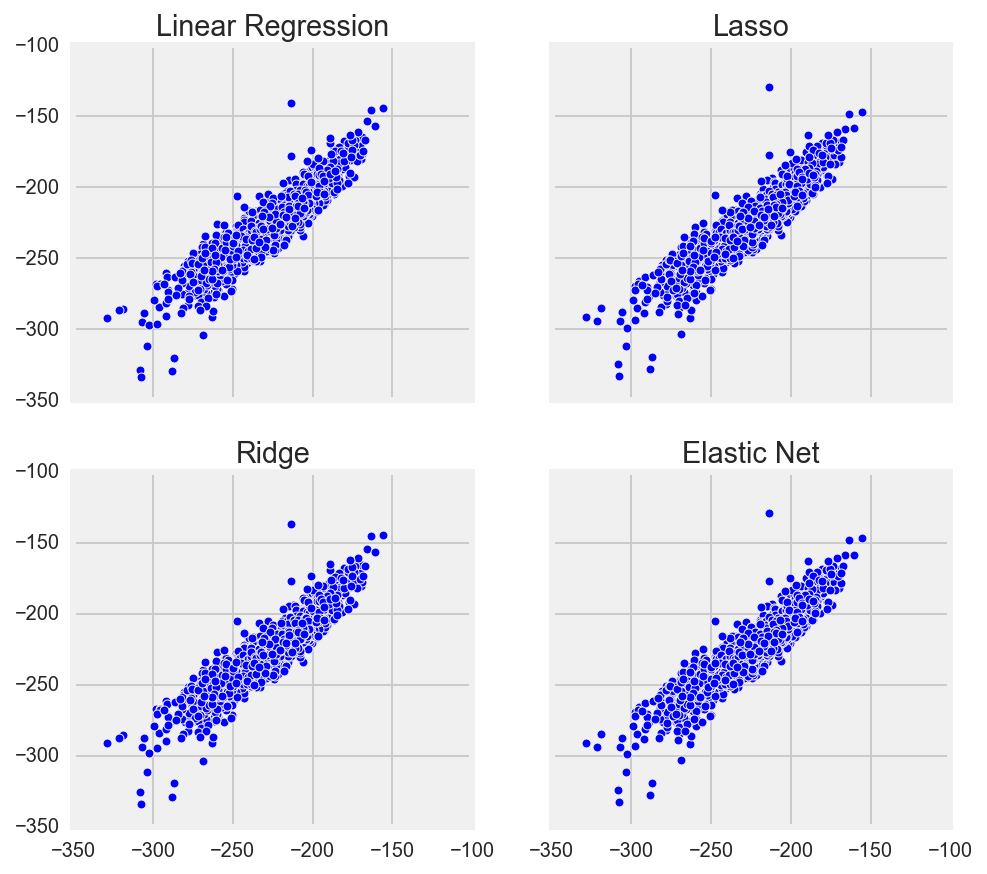


Clutch Rank
R-squared - LinReg 0.549984969364
R-squared - Lasso 0.547412934191
R-squared - Ridge 0.550639738579
R-squared - ElasticNet 0.547412934191


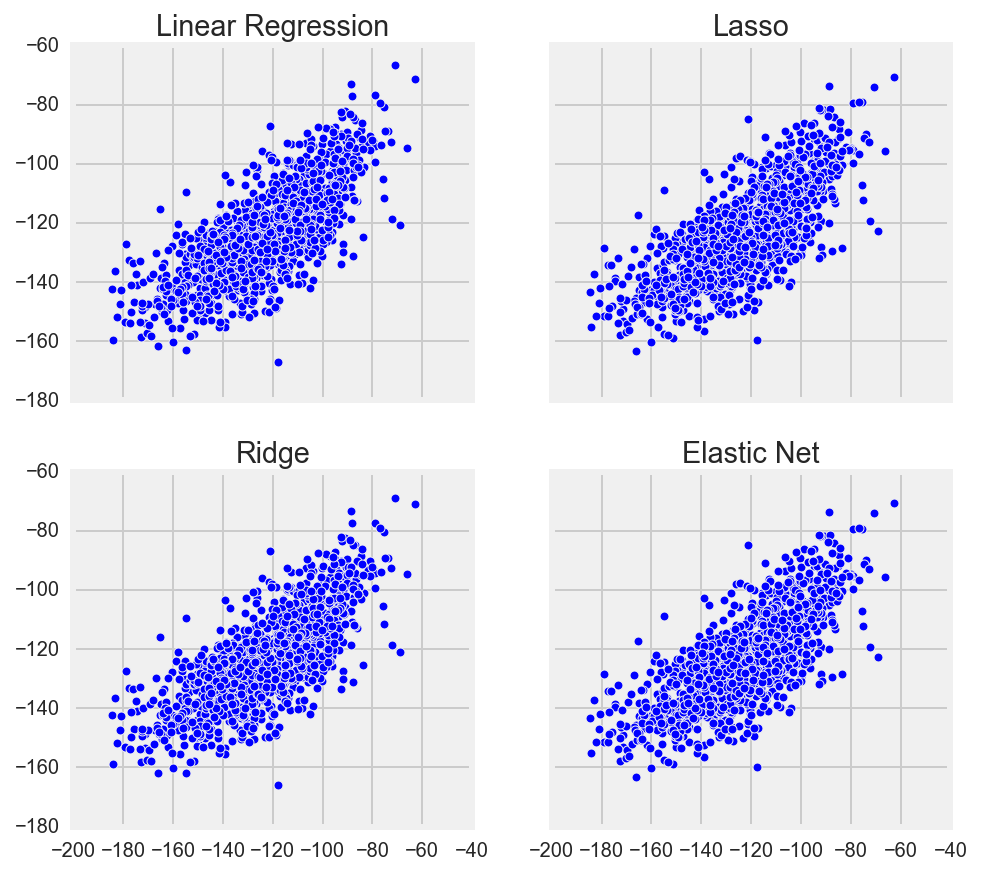


FP Mean
R-squared - LinReg 0.994102827517
R-squared - Lasso 0.993810240148
R-squared - Ridge 0.994321383012
R-squared - ElasticNet 0.993810240148


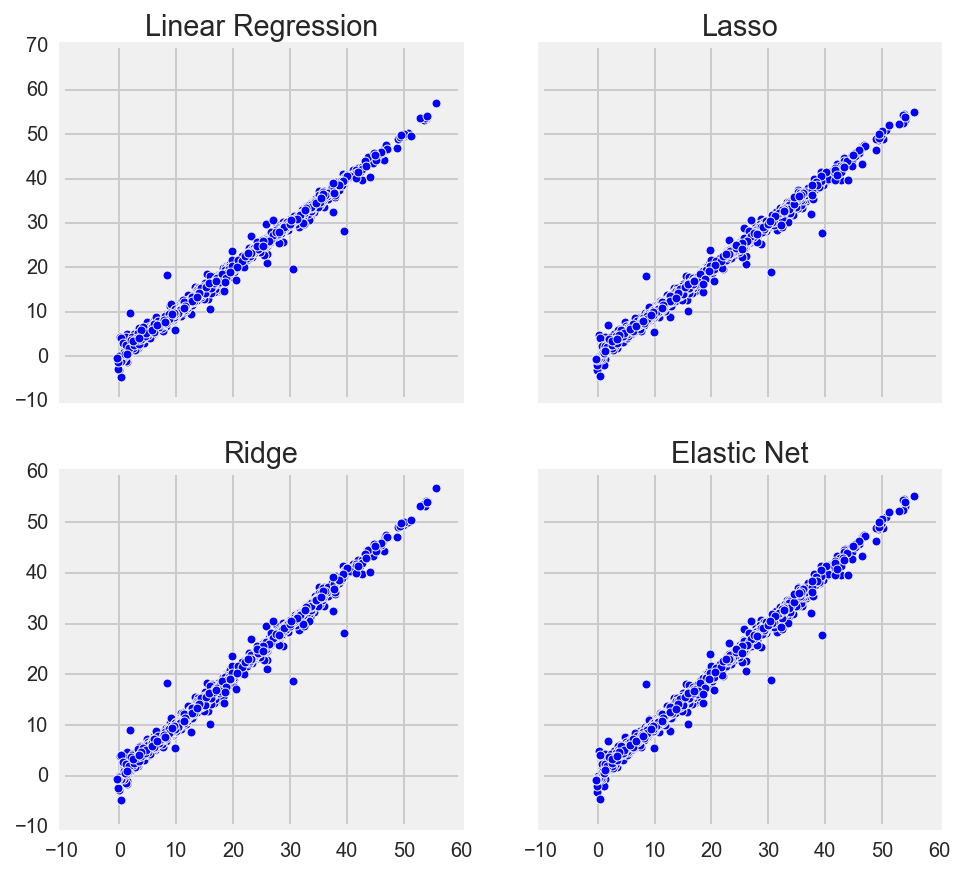


FP STD
R-squared - LinReg 0.776856794273
R-squared - Lasso 0.7800684386
R-squared - Ridge 0.78123809296
R-squared - ElasticNet 0.7800684386


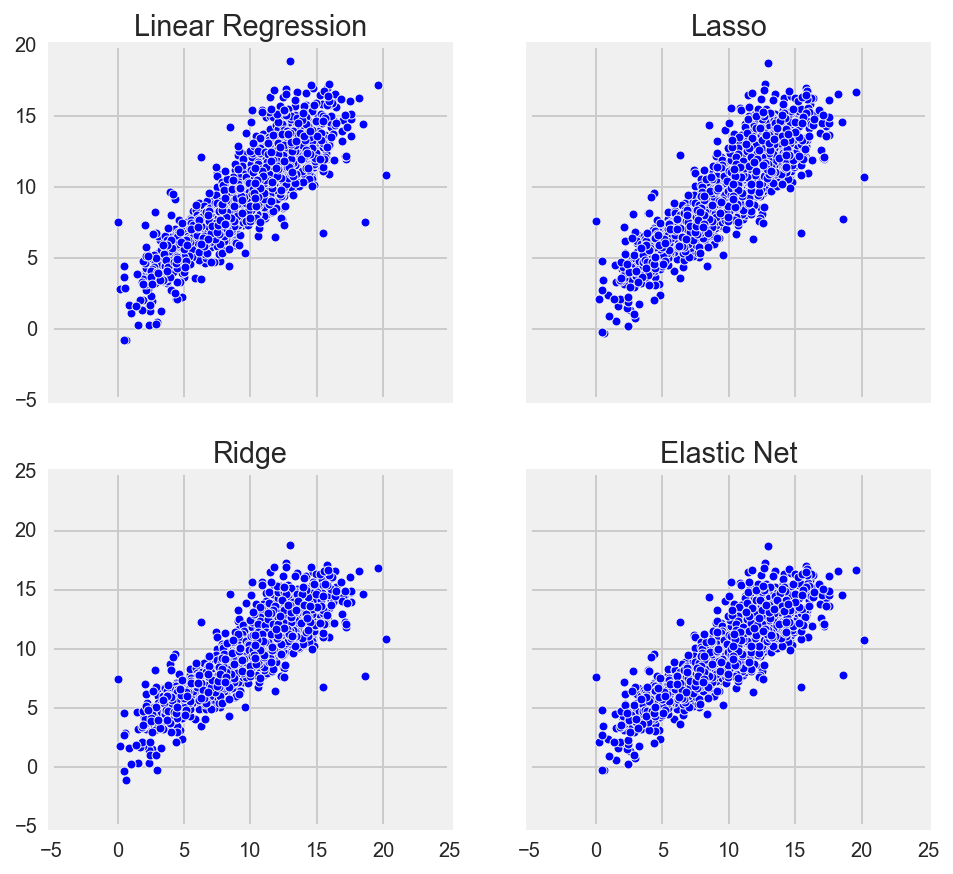


FP Var
R-squared - LinReg 0.727581439271
R-squared - Lasso 0.727540413215
R-squared - Ridge 0.725487444083
R-squared - ElasticNet 0.727540413215


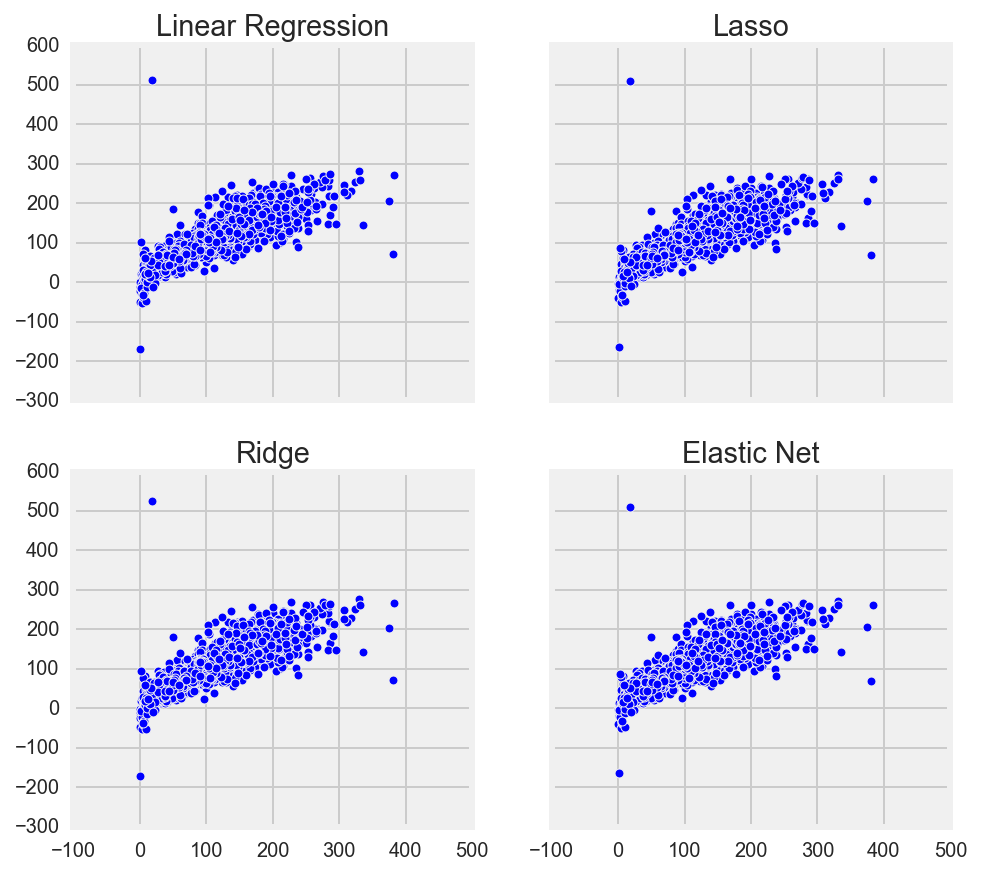

In [132]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(7,7))
print 'Agg Rank'
print 'R-squared - LinReg', r2_score(testY_agg_n, prediction_linreg_agg)
print 'R-squared - Lasso', r2_score(testY_agg_n, prediction_lasso_agg)
print 'R-squared - Ridge', r2_score(testY_agg_n, prediction_ridge_agg)
print 'R-squared - ElasticNet', r2_score(testY_agg_n, prediction_en_agg)
ax1.scatter(testY_agg_n, prediction_linreg_agg)
ax2.scatter(testY_agg_n, prediction_lasso_agg)
ax3.scatter(testY_agg_n, prediction_ridge_agg)
ax4.scatter(testY_agg_n, prediction_en_agg)
ax1.set_title('Linear Regression')
ax2.set_title('Lasso')
ax3.set_title('Ridge')
ax4.set_title('Elastic Net')
plt.show()
print '======================================================================'
print 

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(7,7))
print 'Clutch Rank'
print 'R-squared - LinReg', r2_score(testY_clutch_n, prediction_linreg_clutch)
print 'R-squared - Lasso', r2_score(testY_clutch_n, prediction_lasso_clutch)
print 'R-squared - Ridge', r2_score(testY_clutch_n, prediction_ridge_clutch)
print 'R-squared - ElasticNet', r2_score(testY_clutch_n, prediction_en_clutch)
ax1.scatter(testY_clutch_n, prediction_linreg_clutch)
ax2.scatter(testY_clutch_n, prediction_lasso_clutch)
ax3.scatter(testY_clutch_n, prediction_ridge_clutch)
ax4.scatter(testY_clutch_n, prediction_en_clutch)
ax1.set_title('Linear Regression')
ax2.set_title('Lasso')
ax3.set_title('Ridge')
ax4.set_title('Elastic Net')
plt.show()
print '======================================================================'
print

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(7,7))
print 'FP Mean'
print 'R-squared - LinReg', r2_score(testY_fp_mean_n, prediction_linreg_fp_mean)
print 'R-squared - Lasso', r2_score(testY_fp_mean_n, prediction_lasso_fp_mean)
print 'R-squared - Ridge', r2_score(testY_fp_mean_n, prediction_ridge_fp_mean)
print 'R-squared - ElasticNet', r2_score(testY_fp_mean_n, prediction_en_fp_mean)
ax1.scatter(testY_fp_mean_n, prediction_linreg_fp_mean)
ax2.scatter(testY_fp_mean_n, prediction_lasso_fp_mean)
ax3.scatter(testY_fp_mean_n, prediction_ridge_fp_mean)
ax4.scatter(testY_fp_mean_n, prediction_en_fp_mean)
ax1.set_title('Linear Regression')
ax2.set_title('Lasso')
ax3.set_title('Ridge')
ax4.set_title('Elastic Net')
plt.show()
print '======================================================================'
print

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(7,7))
print 'FP STD'
print 'R-squared - LinReg', r2_score(testY_fp_std_n, prediction_linreg_fp_std)
print 'R-squared - Lasso', r2_score(testY_fp_std_n, prediction_lasso_fp_std)
print 'R-squared - Ridge', r2_score(testY_fp_std_n, prediction_ridge_fp_std)
print 'R-squared - ElasticNet', r2_score(testY_fp_std_n, prediction_en_fp_std)
ax1.scatter(testY_fp_std_n, prediction_linreg_fp_std)
ax2.scatter(testY_fp_std_n, prediction_lasso_fp_std)
ax3.scatter(testY_fp_std_n, prediction_ridge_fp_std)
ax4.scatter(testY_fp_std_n, prediction_en_fp_std)
ax1.set_title('Linear Regression')
ax2.set_title('Lasso')
ax3.set_title('Ridge')
ax4.set_title('Elastic Net')
plt.show()
print '======================================================================'
print

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(7,7))
print 'FP Var'
print 'R-squared - LinReg', r2_score(testY_fp_var_n, prediction_linreg_fp_var)
print 'R-squared - Lasso', r2_score(testY_fp_var_n, prediction_lasso_fp_var)
print 'R-squared - Ridge', r2_score(testY_fp_var_n, prediction_ridge_fp_var)
print 'R-squared - ElasticNet', r2_score(testY_fp_var_n, prediction_en_fp_var)
ax1.scatter(testY_fp_var_n, prediction_linreg_fp_var)
ax2.scatter(testY_fp_var_n, prediction_lasso_fp_var)
ax3.scatter(testY_fp_var_n, prediction_ridge_fp_var)
ax4.scatter(testY_fp_var_n, prediction_en_fp_var)
ax1.set_title('Linear Regression')
ax2.set_title('Lasso')
ax3.set_title('Ridge')
ax4.set_title('Elastic Net')
plt.show()
print '======================================================================'
print

Before running Linear, Logistic, Lasso, Ridge and Elastic Net, I manually took out some features that had 0 correlation with my target variables. Each target variable had different 0 correlations with each feature, so it took a long time to remove obvious redundancies.

However, after I ran my model, I was surprised that each target variable's Linear Regression, Lasso, Ridge and Elastic Net were very similar to each other, and my Elastic Net L1/2 ratio always used full Lasso over Ridge. I was fairly surprised that my fantasy points mean had an R^2 of 0.99+! Although only using the basic 9 categories of FGM/FGA, FTM/FTA, 3PTM, Points, Rebounds, Assists, Steals, Blocks and Turnovers, every single feature was positively linearly correlated. However, there may be still some multicollinearity, but I don't think it's a bad thing. I doubt removing those features will vastly affect my score, so at this point I was ready to move onto Random Forests.

Game Risk
R-squared - Logreg:  0.77599286033
R-squared - Lasso:  0.854689286375
R-squared - Ridge:  0.856587632515
R-squared - ElasticNet:  0.854689286375


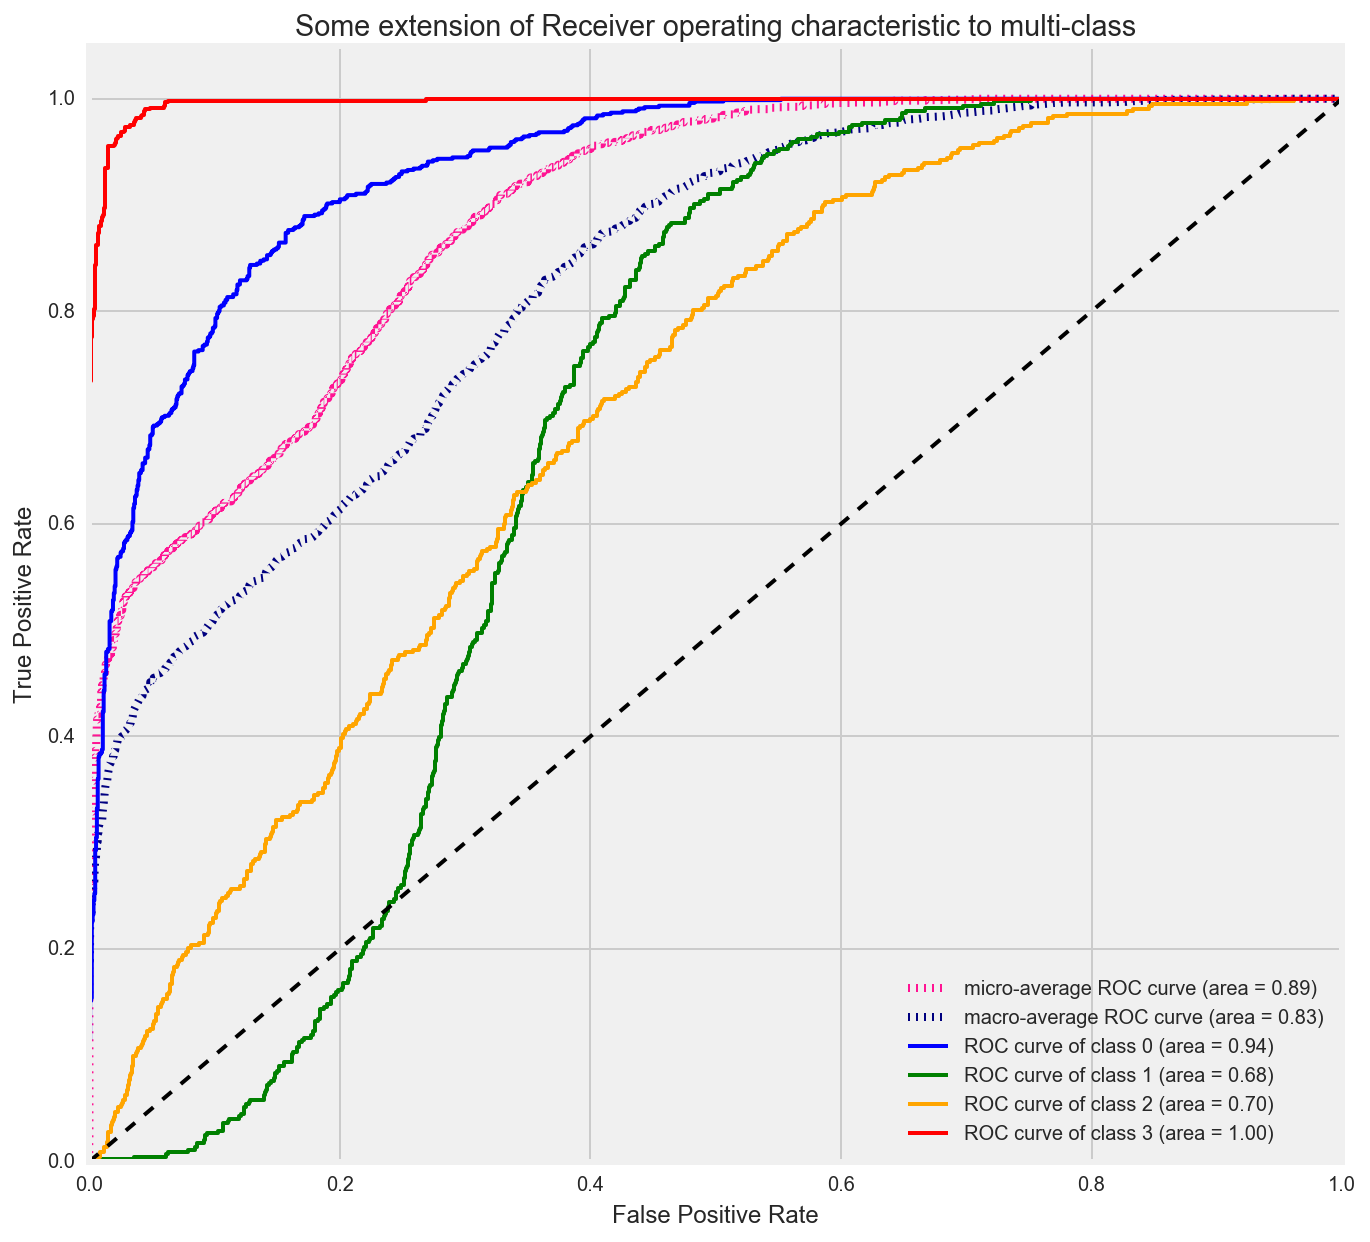

             precision    recall  f1-score   support

    lowrisk       0.34      0.41      0.37       730
    caution       0.22      0.10      0.14       437
  high_risk       0.19      0.22      0.20       457
     danger       0.27      0.28      0.27       617

avg / total       0.27      0.27      0.26      2241



In [134]:
print 'Game Risk'
print 'R-squared - Logreg: ', estimator_logreg_game_risk.score(testX_game_risk_n, testY_game_risk_n)
print 'R-squared - Lasso: ', model_lasso_game_risk.score(testX_game_risk_n, testY_game_risk_n)
print 'R-squared - Ridge: ', model_ridge_game_risk.score(testX_game_risk_n, testY_game_risk_n)
print 'R-squared - ElasticNet: ', model_en_game_risk.score(testX_game_risk_n, testY_game_risk_n)
print '======================================================================'

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(testY_roc[:, i], prediction_ova_df_game_risk[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(testY_roc.ravel(), prediction_ova_df_game_risk.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(10,10))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['blue', 'green', 'orange', 'red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

print classification_report(testY_game_risk * -1, prediction_logreg_game_risk * -1, target_names=["lowrisk", 'caution', 'high_risk', 'danger'])

Games Missed Risk was expected to perform poorly. I wasn't too surprised with the results because of the initial fantasy points mean density graph. There are more players performing lower than average due to the different amount of games a superstar or allstar performed compared to a bench player or a player on the borderline to being cut. Because of that, the previously games missed risk bar graph showed that low risk and danger had the most volume of players, so the precision that they were correctly identified was higher. However, both precision and recall were not great, there were more false negative and false positives than true positives and true negatives. Hence, the low F1-score. This may be interesting to see if it can be tweaked a bit more, such as moving to 3 classes instead of 4, but I wanted to see how my Random Forest performed in comparison to my logistic regression.

# ========================================================
# Random Forest Results
# ========================================================

In [135]:
print 'Agg Rank Best Estimator: ', rf_model_agg.best_estimator_
print 'Clutch Rank Best Estimator: ', rf_model_clutch.best_estimator_
print 'Game Risk Best Estimator: ', rf_model_game_risk.best_estimator_
print 'FP Mean Best Estimator: ', rf_model_fp_mean.best_estimator_
print 'FP Std Best Estimator: ', rf_model_fp_std.best_estimator_
print 'FP Var Best Estimator: ', rf_model_fp_var.best_estimator_
print
print '======================================================'
print
print 'Agg Rank Best Param: ', rf_model_agg.best_params_
print 'Clutch Rank Best Param: ', rf_model_clutch.best_params_
print 'Game Risk Best Param: ', rf_model_game_risk.best_params_
print 'FP Mean Best Param: ', rf_model_fp_mean.best_params_
print 'FP Std Best Param: ', rf_model_fp_std.best_params_
print 'FP Var Best Param: ', rf_model_fp_var.best_params_
print
print '======================================================'
print
print 'Agg Rank MSE train: ', mean_squared_error(trainY_agg, predict_rf_agg_train)
print 'Agg Rank MSE test: ', mean_squared_error(testY_agg, predict_rf_agg_test)
print 'Agg Rank MSE baseline: ', mean_squared_error(y_agg, np.tile(np.mean(y_agg), len(y_agg)))
print 
print 'Clutch Rank MSE train: ', mean_squared_error(trainY_clutch, predict_rf_clutch_train)
print 'Clutch Rank MSE test: ', mean_squared_error(testY_clutch, predict_rf_clutch_test)
print 'Clutch Rank MSE baseline: ', mean_squared_error(y_clutch, np.tile(np.mean(y_clutch), len(y_clutch)))
print
print 'FP Mean MSE train: ', mean_squared_error(trainY_fp_mean, predict_rf_fp_mean_train)
print 'FP Mean MSE test: ', mean_squared_error(testY_fp_mean, predict_rf_fp_mean_test)
print 'FP Mean MSE baseline: ', mean_squared_error(y_fp_mean, np.tile(np.mean(y_fp_mean), len(y_fp_mean)))
print
print 'FP Std MSE train: ', mean_squared_error(trainY_fp_std, predict_rf_fp_std_train)
print 'FP Std MSE test: ', mean_squared_error(testY_fp_std, predict_rf_fp_std_test)
print 'FP Std MSE baseline: ', mean_squared_error(y_fp_std, np.tile(np.mean(y_fp_std), len(y_fp_std)))
print
print 'FP Var MSE train: ', mean_squared_error(trainY_fp_var, predict_rf_fp_var_train)
print 'FP Var MSE test: ', mean_squared_error(testY_fp_var, predict_rf_fp_var_test)
print 'FP Var MSE baseline: ', mean_squared_error(y_fp_var, np.tile(np.mean(y_fp_var), len(y_fp_var)))
print
print 'Game Risk MSE train: ', mean_squared_error(trainY_game_risk, predict_rf_game_risk_train)
print 'Game Risk MSE test: ', mean_squared_error(testY_game_risk, predict_rf_game_risk_test)
print 'Game Risk MSE baseline: ', mean_squared_error(y_game_risk, np.tile(np.mean(y_game_risk), len(y_game_risk)))
print
print '======================================================'
print 
print 'Agg Rank RMSE train: ', np.sqrt(mean_squared_error(trainY_agg, predict_rf_agg_train))
print 'Agg Rank RMSE test: ', np.sqrt(mean_squared_error(testY_agg, predict_rf_agg_test))
print 'Agg Rank RMSE baseline: ', np.sqrt(mean_squared_error(y_agg, np.tile(np.mean(y_agg), len(y_agg))))
print
print 'Clutch Rank RMSE train: ', np.sqrt(mean_squared_error(trainY_clutch, predict_rf_clutch_train))
print 'Clutch Rank RMSE test: ', np.sqrt(mean_squared_error(testY_clutch, predict_rf_clutch_test))
print 'Clutch Rank RMSE baseline: ', np.sqrt(mean_squared_error(y_clutch, np.tile(np.mean(y_clutch), len(y_clutch))))
print
print 'FP Mean RMSE train: ', np.sqrt(mean_squared_error(trainY_fp_mean, predict_rf_fp_mean_train))
print 'FP Mean RMSE test: ', np.sqrt(mean_squared_error(testY_fp_mean, predict_rf_fp_mean_test))
print 'FP Mean RMSE baseline: ', np.sqrt(mean_squared_error(y_fp_mean, np.tile(np.mean(y_fp_mean), len(y_fp_mean))))
print
print 'FP Std RMSE train: ', np.sqrt(mean_squared_error(trainY_fp_std, predict_rf_fp_std_train))
print 'FP Std RMSE test: ', np.sqrt(mean_squared_error(testY_fp_std, predict_rf_fp_std_test))
print 'FP Std RMSE baseline: ', np.sqrt(mean_squared_error(y_fp_std, np.tile(np.mean(y_fp_std), len(y_fp_std))))
print
print 'FP Var RMSE train: ', np.sqrt(mean_squared_error(trainY_fp_var, predict_rf_fp_var_train))
print 'FP Var RMSE test: ', np.sqrt(mean_squared_error(testY_fp_var, predict_rf_fp_var_test))
print 'FP Var RMSE baseline: ', np.sqrt(mean_squared_error(y_fp_var, np.tile(np.mean(y_fp_var), len(y_fp_var))))
print
print 'Game Risk RMSE train: ', np.sqrt(mean_squared_error(trainY_game_risk, predict_rf_game_risk_train))
print 'Game Risk RMSE test: ', np.sqrt(mean_squared_error(testY_game_risk, predict_rf_game_risk_test))
print 'Game Risk RMSE baseline: ', np.sqrt(mean_squared_error(y_game_risk, np.tile(np.mean(y_game_risk), len(y_game_risk))))
print
print '======================================================'
print
print 'Agg Rank R^2 train: ', r2_score(trainY_agg, predict_rf_agg_train)
print 'Agg Rank R^2 test: ', r2_score(testY_agg, predict_rf_agg_test)
print
print 'Clutch Rank R^2 train: ', r2_score(trainY_clutch, predict_rf_clutch_train)
print 'Clutch Rank R^2 test: ', r2_score(testY_clutch, predict_rf_clutch_test)
print
print 'FP Mean R^2 train: ', r2_score(trainY_fp_mean, predict_rf_fp_mean_train)
print 'FP Mean R^2 test: ', r2_score(testY_fp_mean, predict_rf_fp_mean_test)
print
print 'FP Std R^2 train: ', r2_score(trainY_fp_std, predict_rf_fp_std_train)
print 'FP Std R^2 test: ', r2_score(testY_fp_std, predict_rf_fp_std_test)
print
print 'FP Var R^2 train: ', r2_score(trainY_fp_var, predict_rf_fp_var_train)
print 'FP Var R^2 test: ', r2_score(testY_fp_var, predict_rf_fp_var_test)
print
print 'Game Risk R^2 train: ', r2_score(trainY_game_risk, predict_rf_game_risk_train)
print 'Game Risk R^2 test: ', r2_score(testY_game_risk, predict_rf_game_risk_test)
print
print '======================================================'
print
print classification_report(testY_game_risk * -1, predict_rf_game_risk_test * -1, target_names=["lowrisk", 'caution', 'high_risk', 'danger'])

Agg Rank Best Estimator:  RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
Clutch Rank Best Estimator:  RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
Game Risk Best Estimator:  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
       

My Random Forest performed exceptionally well for their Mean Squared Error, Residual Mean Squared Error and R^2. They are all far superior than their average (baseline) and much better than the performance than Linear/Logistic Regression, Lasso, Ridge and Elastic Net. The classification report for precision, recall and f1-score is suspect because it seems like there was overfitting. I may have to tweak the train-test split and also run multiple cross validations to make sure that it is returning the correct results, but a simple check on the predicted datasets for next season should give me a good idea on whether they were accurate or not.

<a href=#table_of_contents>Back to top</a>

# VIII. Conclusion <a id=conclusion></a>

# ========================================================
# Merging My Predicted Ranks and Yahoo, ESPN, CBS ranks
# ========================================================

In [136]:
my_rank_2015 = pd.read_csv('/Users/edwardlee/Desktop/PROJECTS/NBA Fantasy Project/rank_project/comparison_dataset/my_rank_2015.csv')
my_rank_2014 = pd.read_csv('/Users/edwardlee/Desktop/PROJECTS/NBA Fantasy Project/rank_project/comparison_dataset/my_rank_2014.csv')
my_rank_2013 = pd.read_csv('/Users/edwardlee/Desktop/PROJECTS/NBA Fantasy Project/rank_project/comparison_dataset/my_rank_2013.csv')
my_rank_2012 = pd.read_csv('/Users/edwardlee/Desktop/PROJECTS/NBA Fantasy Project/rank_project/comparison_dataset/my_rank_2012.csv')
my_rank_2011 = pd.read_csv('/Users/edwardlee/Desktop/PROJECTS/NBA Fantasy Project/rank_project/comparison_dataset/my_rank_2011.csv')
compare_rank_2015_16 = pd.read_excel('/Users/edwardlee/Desktop/PROJECTS/NBA Fantasy Project/rank_project/comparison_dataset/2015-16_rank_compare.xls')
compare_rank_2014_15 = pd.read_excel('/Users/edwardlee/Desktop/PROJECTS/NBA Fantasy Project/rank_project/comparison_dataset/2014-15_rank_compare.xls')
compare_rank_2013_14 = pd.read_excel('/Users/edwardlee/Desktop/PROJECTS/NBA Fantasy Project/rank_project/comparison_dataset/2013-14_rank_compare.xls')
compare_rank_2012_13 = pd.read_excel('/Users/edwardlee/Desktop/PROJECTS/NBA Fantasy Project/rank_project/comparison_dataset/2012-13_rank_compare.xls')
beat_them_all = pd.read_csv('/Users/edwardlee/Desktop/PROJECTS/NBA Fantasy Project/rank_project/comparison_dataset/2016-17_beat_them.csv')

In [137]:
my_rank_2011.drop('Unnamed: 0', axis=1, inplace=True)
my_rank_2012.drop('Unnamed: 0', axis=1, inplace=True)
my_rank_2013.drop('Unnamed: 0', axis=1, inplace=True)
my_rank_2014.drop('Unnamed: 0', axis=1, inplace=True)
my_rank_2015.drop('Unnamed: 0', axis=1, inplace=True)

In [138]:
def switcharoo(x):
    if x == 0.0:
        return 'Low Risk'
    elif x == 1.0:
        return 'Caution'
    elif x == 2.0:
        return 'High Risk'
    elif x == 3.0:
        return 'Danger'

my_rank_2011['MyRank'] = [x+1 for x in range(my_rank_2011.shape[0])]
my_rank_2011['agg_rank_score'] = my_rank_2011['agg_rank_score'] * -1
my_rank_2011['clutch_rank_score'] = my_rank_2011['clutch_rank_score'] * -1
my_rank_2011['game_risk_score'] = my_rank_2011['game_risk_score'] * -1
my_rank_2011['game_risk_score'] = my_rank_2011['game_risk_score'].apply(switcharoo)

my_rank_2012['MyRank'] = [x+1 for x in range(my_rank_2012.shape[0])]
my_rank_2012['agg_rank_score'] = my_rank_2012['agg_rank_score'] * -1
my_rank_2012['clutch_rank_score'] = my_rank_2012['clutch_rank_score'] * -1
my_rank_2012['game_risk_score'] = my_rank_2012['game_risk_score'] * -1
my_rank_2012['game_risk_score'] = my_rank_2012['game_risk_score'].apply(switcharoo)

my_rank_2013['MyRank'] = [x+1 for x in range(my_rank_2013.shape[0])]
my_rank_2013['agg_rank_score'] = my_rank_2013['agg_rank_score'] * -1
my_rank_2013['clutch_rank_score'] = my_rank_2013['clutch_rank_score'] * -1
my_rank_2013['game_risk_score'] = my_rank_2013['game_risk_score'] * -1
my_rank_2013['game_risk_score'] = my_rank_2013['game_risk_score'].apply(switcharoo)

my_rank_2014['MyRank'] = [x+1 for x in range(my_rank_2014.shape[0])]
my_rank_2014['agg_rank_score'] = my_rank_2014['agg_rank_score'] * -1
my_rank_2014['clutch_rank_score'] = my_rank_2014['clutch_rank_score'] * -1
my_rank_2014['game_risk_score'] = my_rank_2014['game_risk_score'] * -1
my_rank_2014['game_risk_score'] = my_rank_2014['game_risk_score'].apply(switcharoo)

my_rank_2015['MyRank'] = [x+1 for x in range(my_rank_2015.shape[0])]
my_rank_2015['agg_rank_score'] = my_rank_2015['agg_rank_score'] * -1
my_rank_2015['clutch_rank_score'] = my_rank_2015['clutch_rank_score'] * -1
my_rank_2015['game_risk_score'] = my_rank_2015['game_risk_score'] * -1
my_rank_2015['game_risk_score'] = my_rank_2015['game_risk_score'].apply(switcharoo)

In [139]:
compare_rank_2012_13.drop('CBSRank', axis=1, inplace=True)
compare_rank_2013_14.drop('CBSRank', axis=1, inplace=True)
beat_them_all.drop('Unnamed: 0', axis=1, inplace=True)

In [140]:
compare_rank_2012_13.rename(columns={'Name':'PLAYER_NAME', 'Rank':'BBMRank', 'Y!ORank':'YahooRank'}, inplace=True)
compare_rank_2012_13 = compare_rank_2012_13[['PLAYER_NAME', 'BBMRank', 'YahooRank', 'ESPNRank']]

compare_rank_2013_14.rename(columns={'Name':'PLAYER_NAME', 'Rank':'BBMRank', 'Y!ORank':'YahooRank'}, inplace=True)
compare_rank_2013_14 = compare_rank_2013_14[['PLAYER_NAME', 'BBMRank', 'YahooRank', 'ESPNRank']]

compare_rank_2014_15.rename(columns={'Name':'PLAYER_NAME', 'Rank':'BBMRank', 'Y!ORank':'YahooRank'}, inplace=True)
compare_rank_2014_15 = compare_rank_2014_15[['PLAYER_NAME', 'BBMRank', 'CBSRank', 'YahooRank', 'ESPNRank']]

compare_rank_2015_16.rename(columns={'Name':'PLAYER_NAME', 'Rank':'BBMRank', 'Y!ORank':'YahooRank'}, inplace=True)
compare_rank_2015_16 = compare_rank_2015_16[['PLAYER_NAME', 'BBMRank', 'CBSRank', 'YahooRank', 'ESPNRank']]

In [141]:
my_rank_2011 = my_rank_2011.merge(compare_rank_2012_13, on='PLAYER_NAME', how='left')
my_rank_2012 = my_rank_2012.merge(compare_rank_2013_14, on='PLAYER_NAME', how='left')
my_rank_2013 = my_rank_2013.merge(compare_rank_2014_15, on='PLAYER_NAME', how='left')
my_rank_2014 = my_rank_2014.merge(compare_rank_2015_16, on='PLAYER_NAME', how='left')
my_rank_2015 = my_rank_2015.merge(beat_them_all, on='PLAYER_NAME', how='left')

In [142]:
my_rank_2015.head()

,PLAYER_NAME,fp_mean_score,fp_std_score,fp_var_score,clutch_rank_score,agg_rank_score,game_risk_score,MyRank,YahooRank_16_17,CBSRank_16-17,ESPNRank_16-17
0,Stephen Curry,54.288108,15.174506,237.297404,76.494723,178.437784,Low Risk,1,1.0,5.0,4.0
1,Kevin Durant,52.568295,14.071220,165.329878,86.396602,170.888431,Caution,2,2.0,6.0,5.0
2,Russell Westbrook,51.360704,14.222481,200.499952,89.233904,181.517451,Low Risk,3,4.0,1.0,1.0
3,James Harden,49.649851,15.627195,249.503984,89.401687,197.951843,Low Risk,4,3.0,2.0,2.0
4,LeBron James,48.305209,12.511997,155.943314,83.235976,190.898569,Low Risk,5,11.0,3.0,8.0


In [143]:
round1 = []
round2 = []
round3 = []
round4 = []
round5 = []
round6 = []
round7 = []
round8 = []
round9 = []
round10 = []
round11 = []
round12 = []
round13 = []
round14 = []

In [144]:
for rank in my_rank_2015['MyRank']:
    if rank <= 12:
        round1.append(my_rank_2015['PLAYER_NAME'][rank-1])
    elif rank > 12 and rank <= 24:
        round2.append(my_rank_2015['PLAYER_NAME'][rank-1])
    elif rank > 24 and rank <= 36:
        round3.append(my_rank_2015['PLAYER_NAME'][rank-1])
    elif rank > 36 and rank <= 48:
        round4.append(my_rank_2015['PLAYER_NAME'][rank-1])
    elif rank > 48 and rank <= 60:
        round5.append(my_rank_2015['PLAYER_NAME'][rank-1])
    elif rank > 60 and rank <= 72:
        round6.append(my_rank_2015['PLAYER_NAME'][rank-1])
    elif rank > 72 and rank <= 84:
        round7.append(my_rank_2015['PLAYER_NAME'][rank-1])
    elif rank > 84 and rank <= 96:
        round8.append(my_rank_2015['PLAYER_NAME'][rank-1])
    elif rank > 96 and rank <= 108:
        round9.append(my_rank_2015['PLAYER_NAME'][rank-1])
    elif rank > 108 and rank <= 120:
        round10.append(my_rank_2015['PLAYER_NAME'][rank-1])
    elif rank > 120 and rank <= 132:
        round11.append(my_rank_2015['PLAYER_NAME'][rank-1])
    elif rank > 132 and rank <= 144:
        round12.append(my_rank_2015['PLAYER_NAME'][rank-1])
    elif rank > 144 and rank <= 156:
        round13.append(my_rank_2015['PLAYER_NAME'][rank-1])
    else:
        round14.append(my_rank_2015['PLAYER_NAME'][rank-1])

In [145]:
ranked_dictionary = {
    'r1':round1,
    'r2':round2,
    'r3':round3,
    'r4':round4,
    'r5':round5,
    'r6':round6,
    'r7':round7,
    'r8':round8,
    'r9':round9,
    'r10':round10,
    'r11':round11,
    'r12':round12,
    'r13':round13,
}

In [146]:
tmp = pd.DataFrame(ranked_dictionary)

# ========================================================
# Conclusion
# ========================================================

In [147]:
tmp[['r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9', 'r10', 'r11', 'r12', 'r13']]

,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13
0,Stephen Curry,Kyle Lowry,Nikola Vucevic,CJ McCollum,Zach Randolph,Tyreke Evans,Jae Crowder,Kobe Bryant,Tony Parker,George Hill,Emmanuel Mudiay,Matt Barnes,Jose Juan Barea
1,Kevin Durant,Karl-Anthony Towns,Brook Lopez,Kyrie Irving,Nicolas Batum,Dwight Howard,Enes Kanter,Deron Williams,Robin Lopez,Kent Bazemore,Al-Farouq Aminu,Wesley Matthews,Amir Johnson
2,Russell Westbrook,Blake Griffin,LaMarcus Aldridge,Rajon Rondo,Victor Oladipo,Mike Conley,Monta Ellis,Jabari Parker,JJ Redick,Joe Johnson,Taj Gibson,Myles Turner,Jerryd Bayless
3,James Harden,Jimmy Butler,Chris Bosh,Greg Monroe,Marcin Gortat,Jonas Valanciunas,Nerlens Noel,Jordan Clarkson,Rudy Gobert,Zaza Pachulia,Harrison Barnes,Dennis Schroder,Mirza Teletovic
4,LeBron James,Isaiah Thomas,Hassan Whiteside,Reggie Jackson,Andre Drummond,Kristaps Porzingis,Kenneth Faried,Nikola Jokic,Evan Turner,Ian Mahinmi,Robert Covington,Alec Burks,Alex Len
5,DeMarcus Cousins,Pau Gasol,Giannis Antetokounmpo,Dirk Nowitzki,Rudy Gay,Goran Dragic,Gorgui Dieng,Elfrid Payton,Tim Duncan,Omri Casspi,Devin Booker,J.R. Smith,Ersan Ilyasova
6,Chris Paul,John Wall,Gordon Hayward,Derrick Favors,Brandon Knight,Bradley Beal,Darren Collison,Avery Bradley,Kentavious Caldwell-Pope,Mason Plumlee,Arron Afflalo,PJ Tucker,Jordan Hill
7,Paul George,Carmelo Anthony,Klay Thompson,Khris Middleton,Andrew Wiggins,Ryan Anderson,Chandler Parsons,Marcus Morris,Lou Williams,D'Angelo Russell,Gary Harris,Norris Cole,Kelly Olynyk
8,Damian Lillard,Kemba Walker,Al Horford,Danilo Gallinari,DeAndre Jordan,Jarrett Jack,Serge Ibaka,Luol Deng,Trevor Ariza,Jamal Crawford,Jeff Green,Tyson Chandler,Jose Calderon
9,Anthony Davis,Paul Millsap,Kevin Love,Thaddeus Young,Ricky Rubio,Derrick Rose,Julius Randle,Marvin Williams,Eric Gordon,Nikola Mirotic,Patrick Beverley,TJ Warren,Steven Adams


The above dataframe is my predictions for 2016-17 season. There is no way to justify whether or not my predictions are correct or not until the end of the season, but based on experience, there are a couple of hiccups. First off, DeMar DeRozan should never be 1st round and Kobe Bryant and Tim Duncan are retired. But overall just taking a quick glance, it does seem relatively good.

What I find really great is the first 5 rounds are relatively accurate and those groups are players I would definitely draft in standard league. But in later rounds it seems past performances have been weighted a bit too strong and I may need to find a way to find a way to balance it statistically. Another thing is, there are players who have been injured during the offseason and won't be back at the beginning of the season, such as Gordon Hayward and Khris Middleton. But if they weren't injured, they are in good positions. Overall, I am happy that my ranking system isn't ridiculously bad and a few tweaks in the weighting system might create a better ranking system.

# ========================================================
# Next Step
# ========================================================

This project still has a ton of possibilities to work with. Here are a couple of things I would definitely do to try and improve my projects.
1. Figure out some way to tweak the weights to help update the model.
2. Find a better way to combine all the predicted target values together to weight the ranks better.
3. Subset the entire dataframe again to remove all the players who played less than a certain amount of games and rerun all my models
4. Research more possible target dummy variables
5. Maybe do a cluster to see what happens

Overall, I will continue to work on this project, but not day-to-day. I'm interested to wait for the end of the season to see how well my predicted ranks actually did. Depending on how well my model worked, I can tweak my models better.

<a href=#table_of_contents>Back to top</a>